In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np 


df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

# Etude dataset

In [166]:
df.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [167]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [168]:
df.shape

(3376, 46)

In [169]:
df

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

## Missing Datas

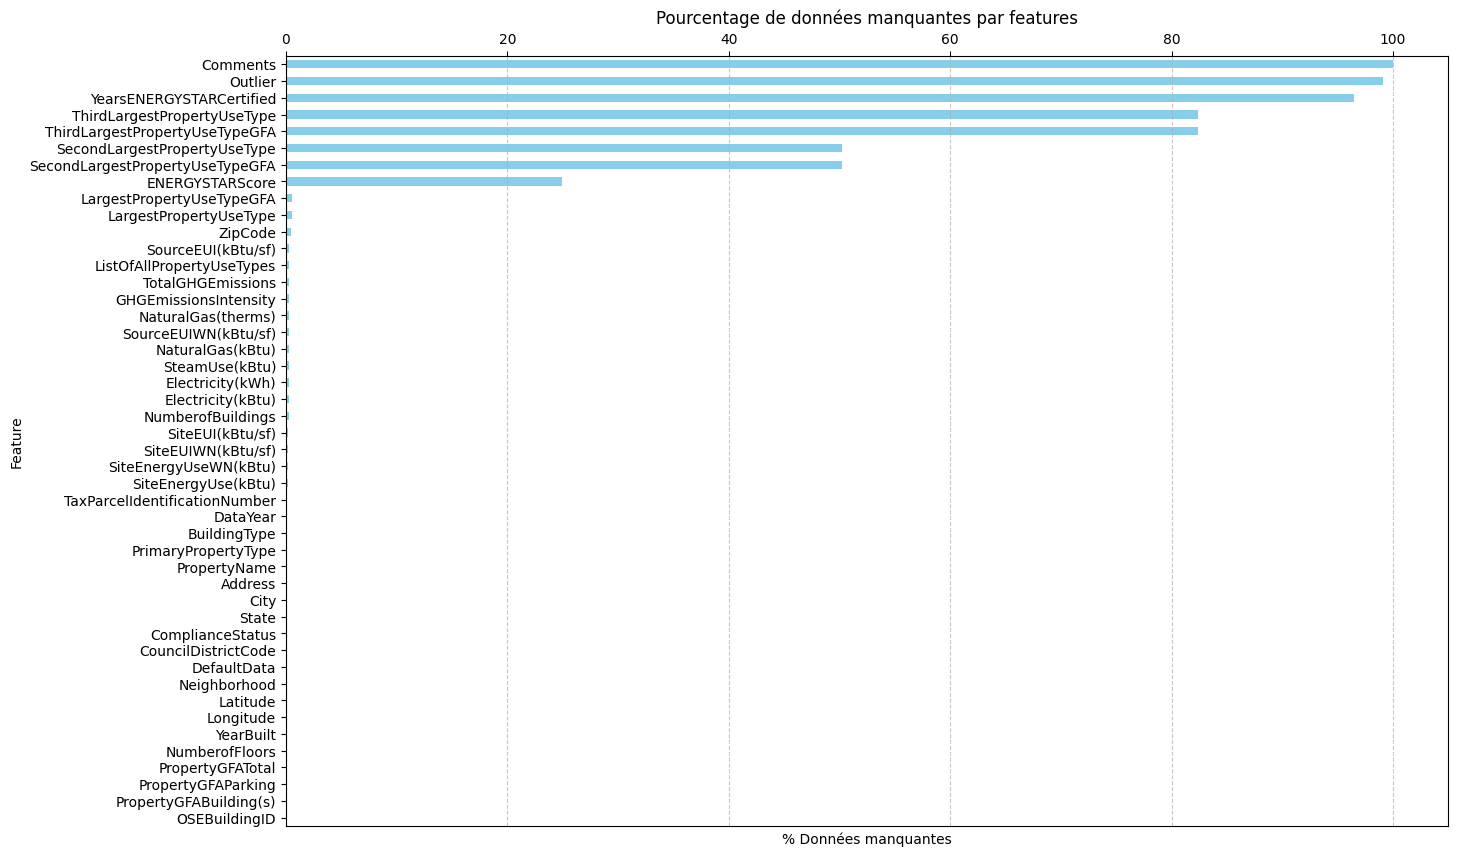

In [170]:
df.isna().sum()

df_missing = df.isna().sum().sort_values()/3376*100

# Créer le graphique à barres verticales
plt.figure(figsize=(15, 10))  # Définir la taille du graphique
ax = df_missing.plot(kind='barh', color='skyblue')  # Tracer l'histogramme vertical
ax.xaxis.set_ticks_position('top')
plt.xlabel('% Données manquantes')  # Libellé de l'axe x
plt.ylabel('Feature')  # Libellé de l'axe y
plt.title("Pourcentage de données manquantes par features")  # Titre du graphique
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Ajouter une grille
plt.show()  # Afficher le graphique


## Types de propriétés

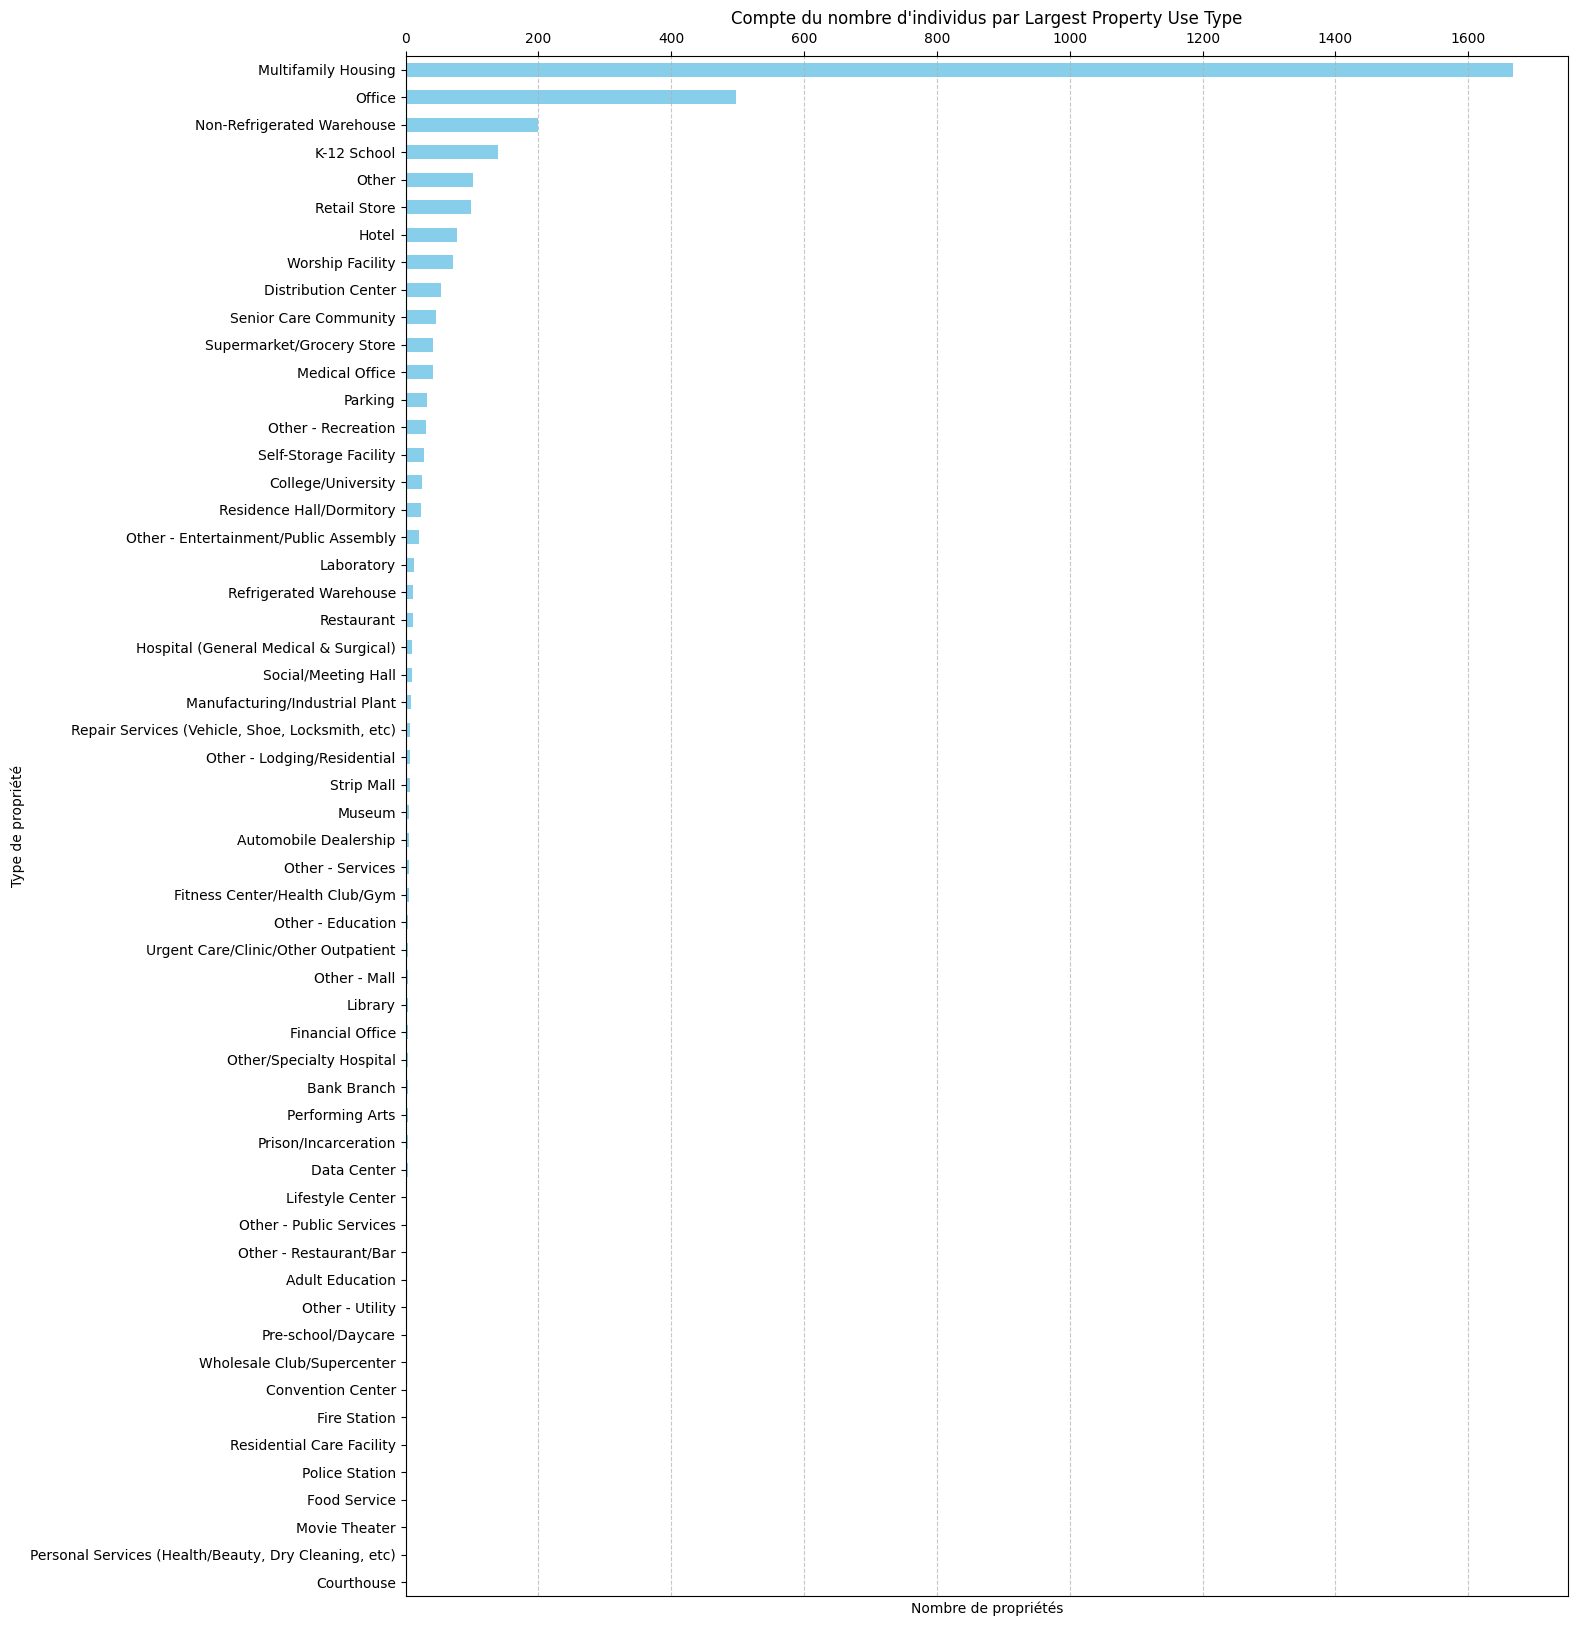

In [171]:
df_counts = df['LargestPropertyUseType'].value_counts()

# Créer le graphique à barres verticales
plt.figure(figsize=(15, 20))  # Définir la taille du graphique
ax = df_counts.plot(kind='barh', color='skyblue')  # Tracer l'histogramme vertical
ax.xaxis.set_ticks_position('top')
plt.xlabel('Nombre de propriétés')  # Libellé de l'axe x
plt.ylabel('Type de propriété')  # Libellé de l'axe y
ax.invert_yaxis()  # Inverser l'axe y
plt.title("Compte du nombre d'individus par Largest Property Use Type")  # Titre du graphique
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Ajouter une grille
plt.show()  # Afficher le graphique


In [172]:
df[df['LargestPropertyUseType']== 'College/University']

OSEBuildingID  DataYear          BuildingType PrimaryPropertyType  \
24               30      2016        NonResidential          University   
104             170      2016        NonResidential          University   
105             172      2016                Campus          University   
114             182      2016        NonResidential          University   
128             211      2016                Campus          University   
580             777      2016        NonResidential          University   
631             851      2016        NonResidential          University   
768           19833      2016        NonResidential          University   
770           19836      2016        NonResidential          University   
894           20166      2016        NonResidential          University   
1494          22062      2016                Campus          University   
2157          24624      2016        NonResidential          University   
2324          25250      2016        NonResidential          University   
2325          25251      2016                Campus          University   
2773          26902      2016  Multifamily LR (1-4)          University   
2789          26956      2016        NonResidential          University   
3110          33527      2016        NonResidential          University   
3111          33548      2016        NonResidential          University   
3252          49909      2016                Campus          University   
3260          49925      2016        NonResidential          University   
3261          49926      2016        NonResidential          University   
3274          49967      2016                Campus          University   
3275          49968      2016        NonResidential          University   
3277          49972      2016        NonResidential          University   
3359          50101      2016     Nonresidential WA          University   

                                          PropertyName  \
24                                  Main Campus Center   
104                            SCCC FINE ARTS BUILDING   
105                                   SSCC MAIN CAMPUS   
114                                   Otto Miller Hall   
128                                   NSCC MAIN CAMPUS   
580                  Hospital Central Services Laundry   
631                      SCCC SEATTLE VOCATIONAL INST.   
768                                Centennial Building   
770                                             Notion   
894                                              Beebe   
1494                                     Entire Campus   
2157                  Bastyr Center for Natural Health   
2324  Student Union Building / Royal Brougham Pavilion   
2325                           5th Avenue Master Meter   
2773                                NW Alpha Chi Omega   
2789                                        Kerry Hall   
3110                            SCCC WOOD CONSTRUCTION   
3111                             SCCC SCIENCE AND MATH   
3252                   SSCC DUWAMISH GEORGETOWN CAMPUS   
3260           SCCC MITCHELL ACTIVITY CENTER/BOOKSTORE   
3261                         SCCC MAIN BROADWAY/EDISON   
3274         University of Washington - Seattle Campus   
3275                                         Aerospace   
3277       Computer Science and Electrical Engineering   
3359                                      Burke Museum   

                        Address     City State  ZipCode  \
24              1000 Lenora St.  Seattle    WA  98121.0   
104               801 E PINE ST  Seattle    WA  98122.0   
105            6000 16th Ave SW  Seattle    WA  98106.0   
114             3469 3rd Ave. W  Seattle    WA  98119.0   
128          9600 COLLEGE WAY N  Seattle    WA  98103.0   
580                800 13th Ave  Seattle    WA  98122.0   
631           2120 S JACKSON ST  Seattle    WA  98144.0   
768           2000 Terry Avenue  Seattle    WA  98121.0   
770            

## Liste des Usages des propriétés


In [173]:
# Création d'un dictionnaire pour stocker les comptages
word_counts = {}

# Parcours de chaque valeur de la colonne 'ListOfAllPropertyUseTypes'
for value in df['ListOfAllPropertyUseTypes'].dropna():
    # Séparation de la chaîne en mots en utilisant la virgule comme séparateur
    words = value.split(', ')
    # Parcours de chaque mot dans la liste de mots
    for word in words:
        # Mise à jour du compteur de mots
        word_counts[word] = word_counts.get(word, 0) + 1

# Affichage des comptages de mots
print("Nombre d'occurrences de chaque mot dans la liste List Of all Property Use Types:")
for word, count in word_counts.items():
    print(f"{word}: {count}")



Nombre d'occurrences de chaque mot dans la liste List Of all Property Use Types:
Hotel: 82
Parking: 1087
Restaurant: 157
Swimming Pool: 50
Police Station: 1
Other - Entertainment/Public Assembly: 37
Multifamily Housing: 1707
Data Center: 45
Library: 7
Fitness Center/Health Club/Gym: 32
Office: 861
Other: 250
Other - Lodging/Residential: 13
Social/Meeting Hall: 24
Courthouse: 2
K-12 School: 147
College/University: 27
Automobile Dealership: 7
Retail Store: 404
Self-Storage Facility: 41
Energy/Power Station: 1
Laboratory: 24
Manufacturing/Industrial Plant: 12
Non-Refrigerated Warehouse: 261
Refrigerated Warehouse: 17
Other - Education: 12
Vocational School: 2
Other - Mall: 5
Personal Services (Health/Beauty: 17
Dry Cleaning: 17
etc): 27
Senior Care Community: 48
Medical Office: 76
Distribution Center: 65
Hospital (General Medical & Surgical): 12
Museum: 7
Repair Services (Vehicle: 10
Shoe: 10
Locksmith: 10
Food Service: 26
Residence Hall/Dormitory: 28
Other - Services: 22
Other/Specialty 

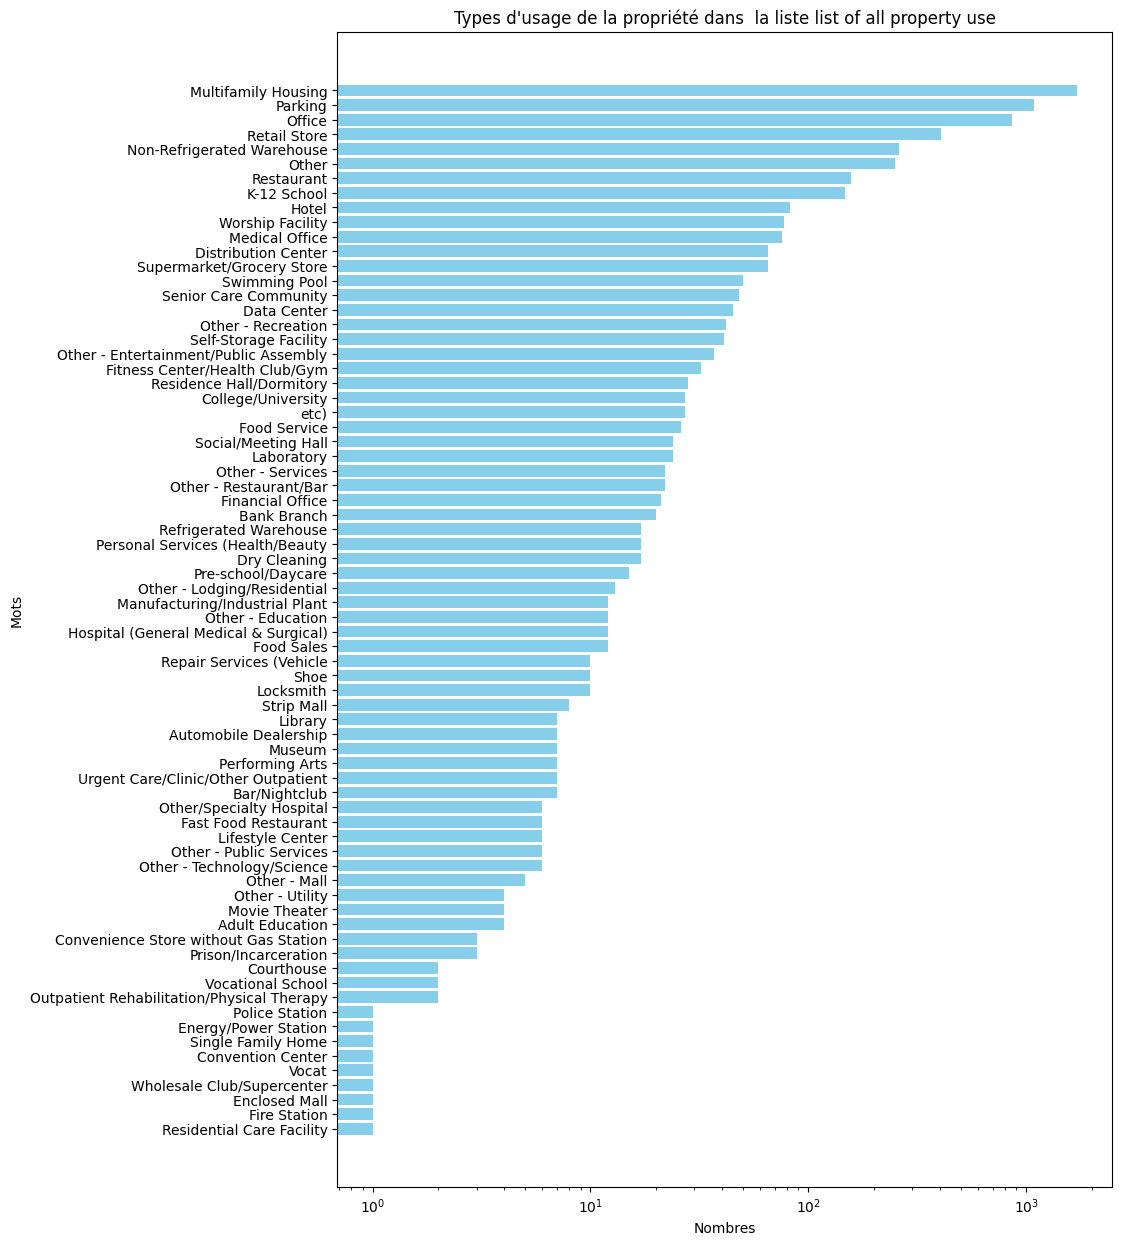

In [174]:
# Tri des mots par valeur dans l'ordre décroissant
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extraire les mots et leurs nombres associés
mots = [item[0] for item in sorted_word_counts]
nombres = [item[1] for item in sorted_word_counts]

# Créer le graphe vertical
plt.figure(figsize=(10, 15))  # Définir la taille de la figure selon vos besoins
plt.barh(mots, nombres, color='skyblue')  # Tracer le graphe horizontal


# Utiliser une échelle logarithmique sur l'axe des x
plt.xscale('log')

# Ajouter des titres et des étiquettes d'axes
plt.xlabel('Nombres')
plt.ylabel('Mots')
plt.title("Types d'usage de la propriété dans  la liste list of all property use")

# Afficher le graphe
plt.gca().invert_yaxis()  # Inverser l'axe y pour placer les plus grandes valeurs en haut
plt.show()


## Etude des modalités de chaque features

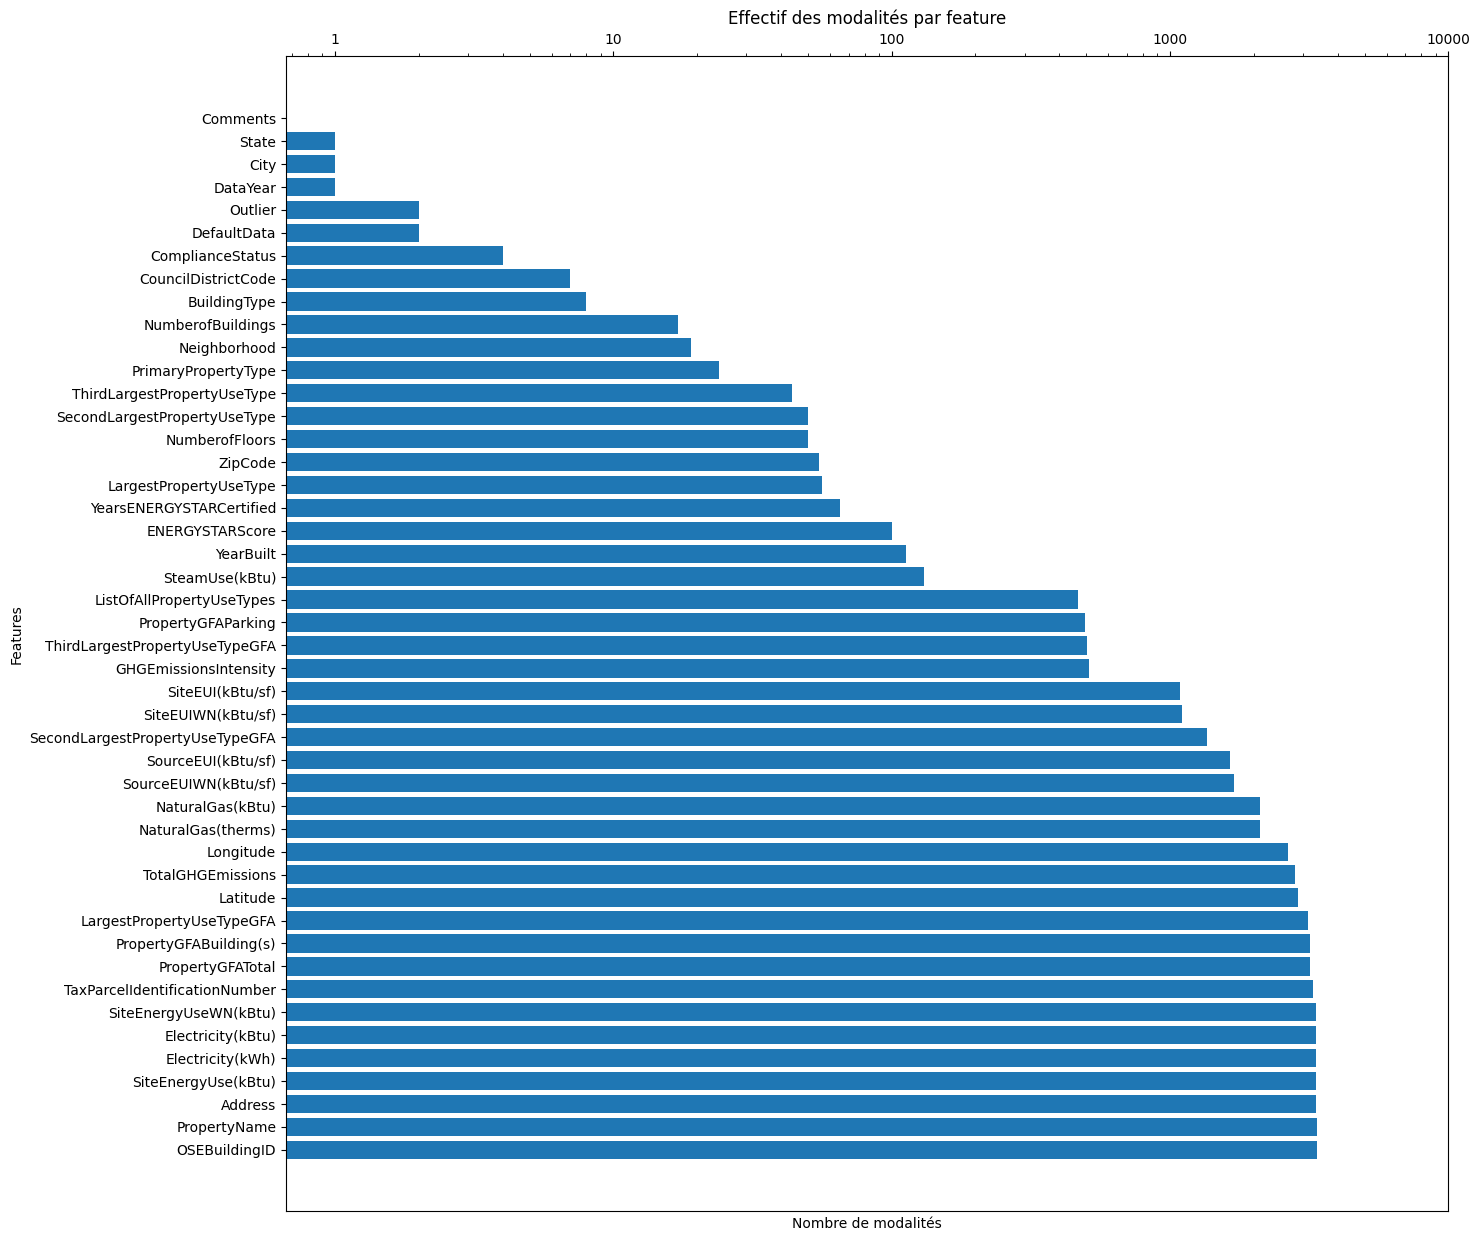

In [175]:

feat_dic = {}

for feature in df.columns:
    feat_dic[feature] = len(df[feature].value_counts())

# Trier les clés et les valeurs du dictionnaire par valeurs (nombre de valeurs par feature)
sorted_items = sorted(feat_dic.items(), key=lambda x: x[1], reverse=True)

# Récupérer les clés et les valeurs triées
cles = [item[0] for item in sorted_items]
valeurs = [item[1] for item in sorted_items]

# Création du graphe vertical
plt.figure(figsize=(15, 15))  # Taille du graphe
plt.barh(cles, valeurs)

# Ajout de titres et libellés
plt.xlabel('Nombre de modalités')
plt.ylabel('Features')
plt.title('Effectif des modalités par feature')

# Utilisation de l'échelle logarithmique sur l'axe des abscisses
plt.xscale('log')

# Déplacer la graduation de l'axe des abscisses sur le haut
plt.gca().xaxis.tick_top()

# Ajuster les étiquettes des graduations
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])

# Affichage du graphe
plt.show()

## Etude des modalités des features en possédant moins de 40

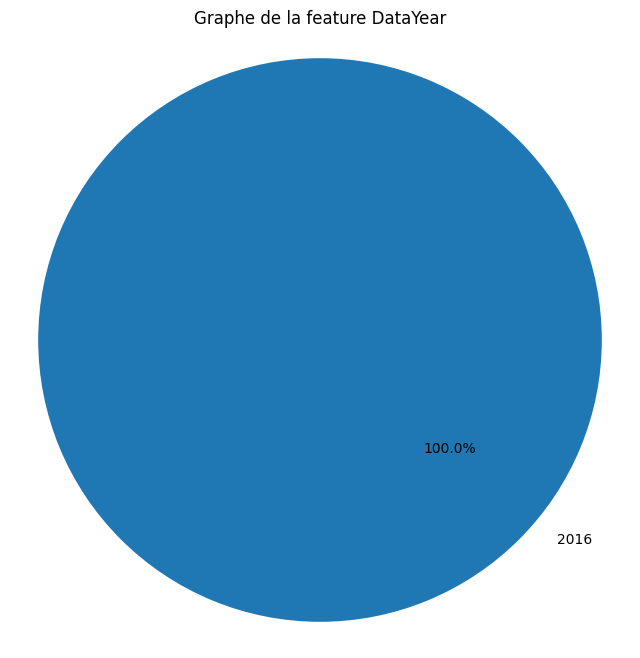

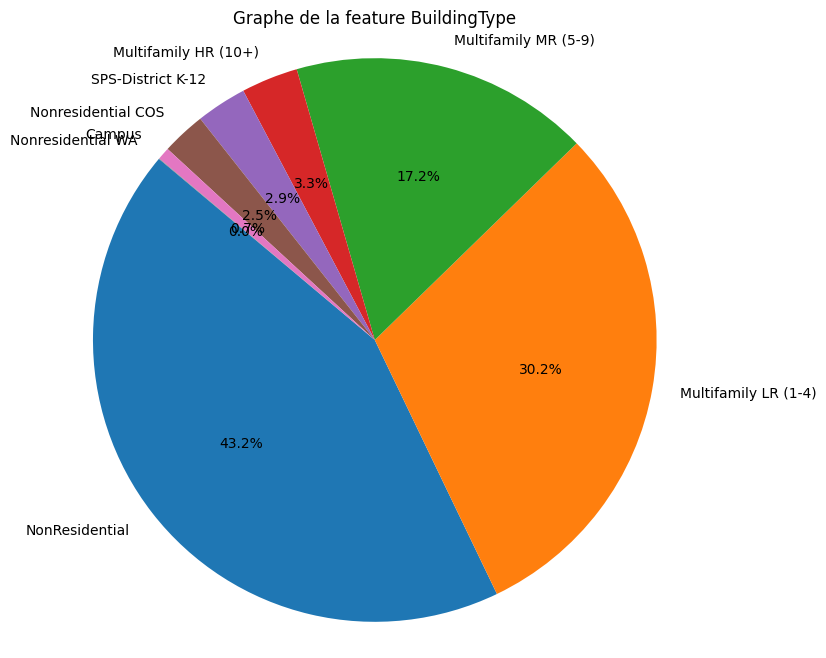

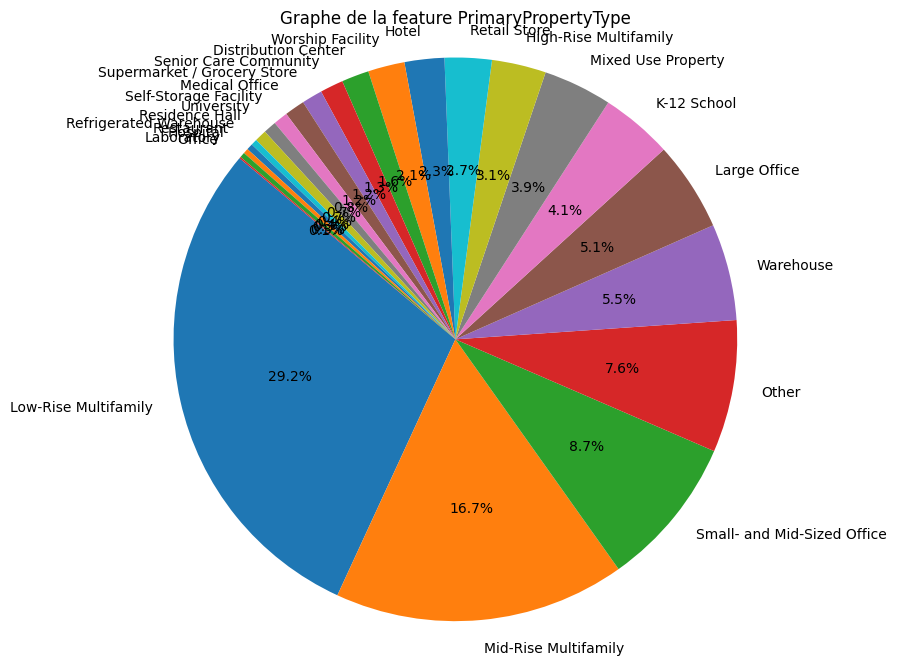

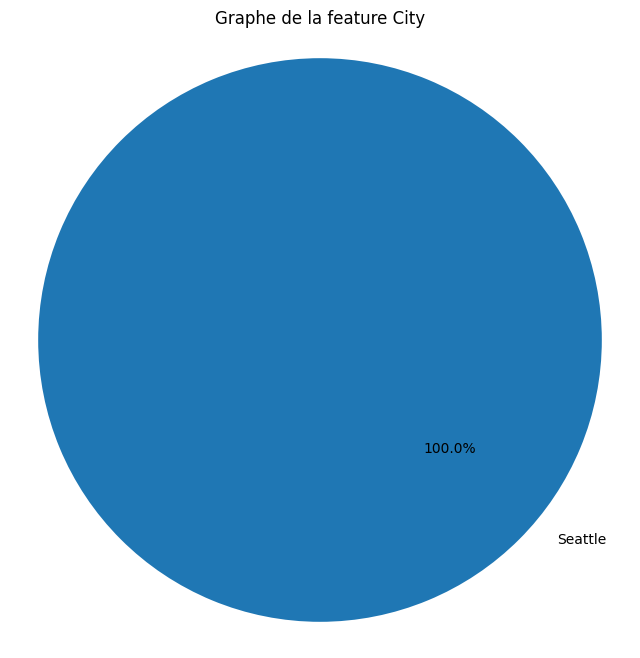

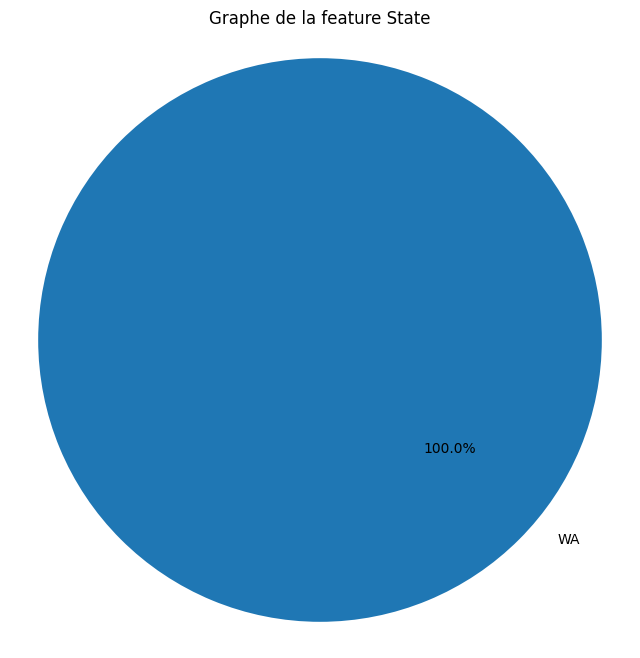

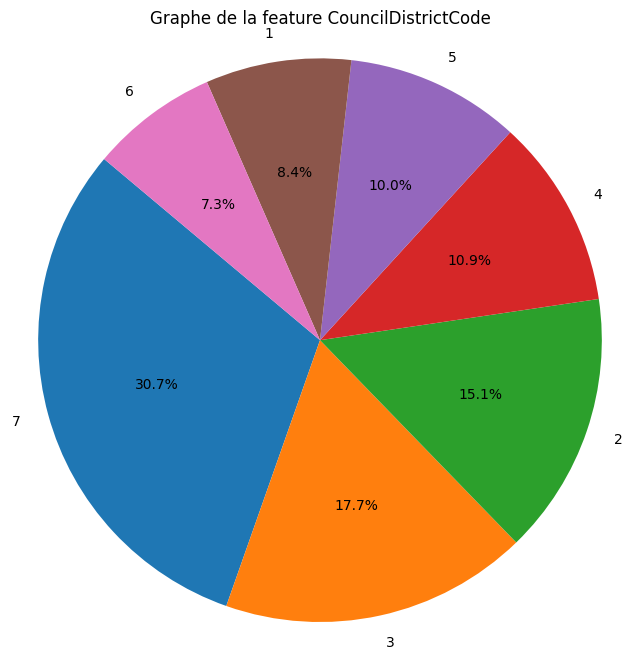

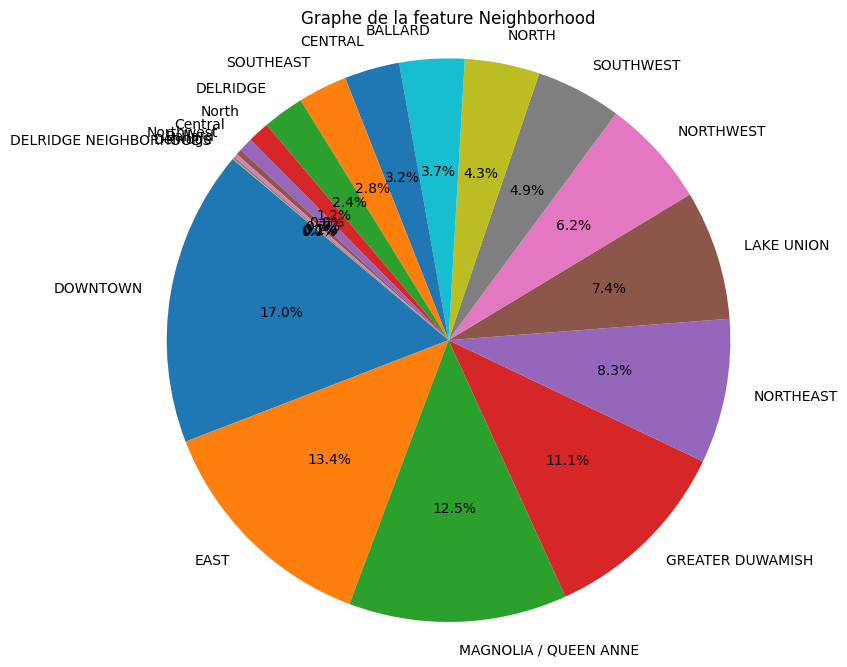

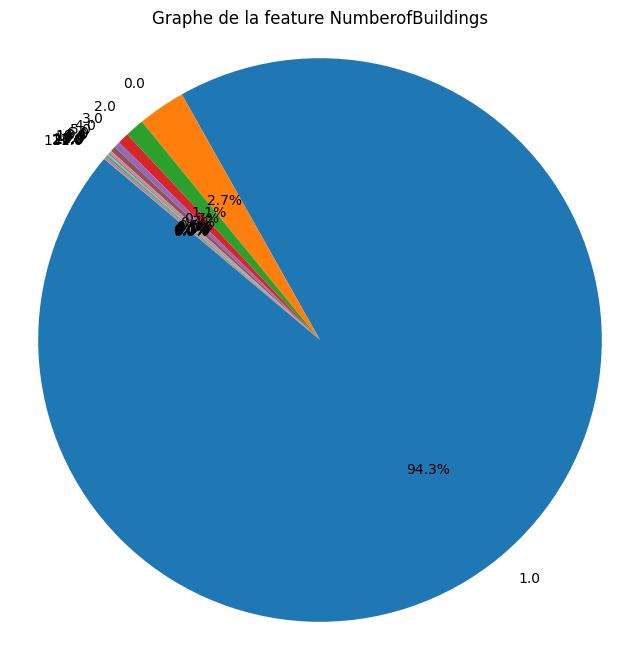

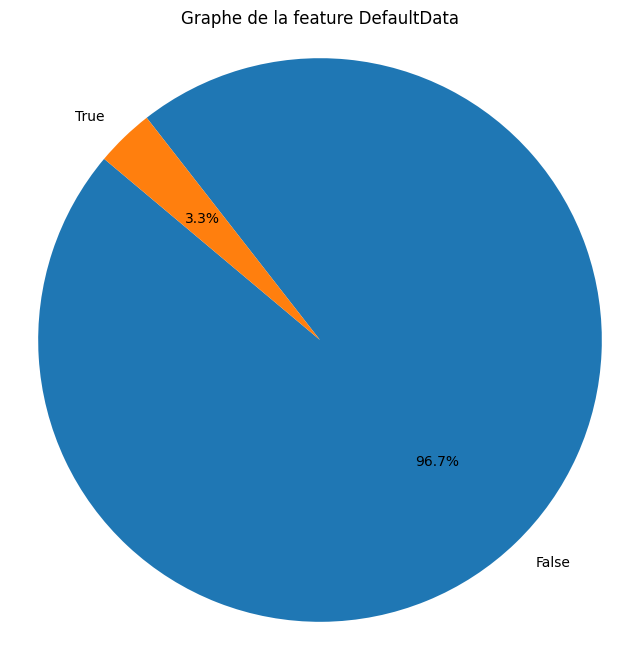

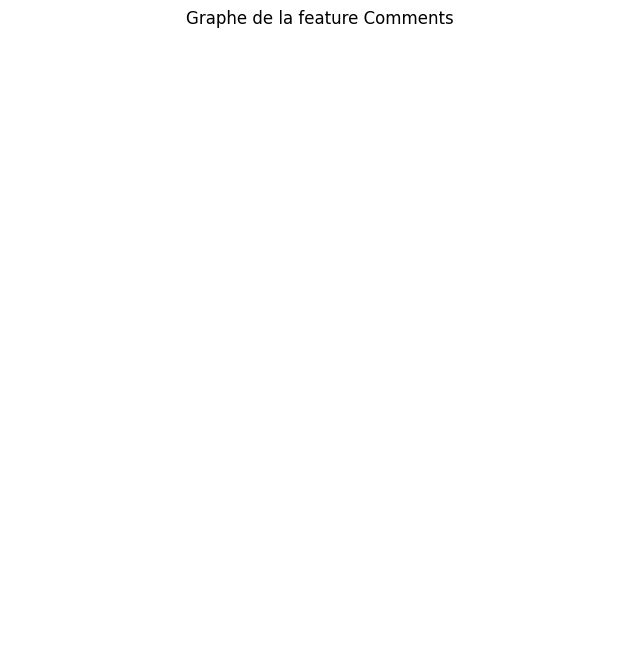

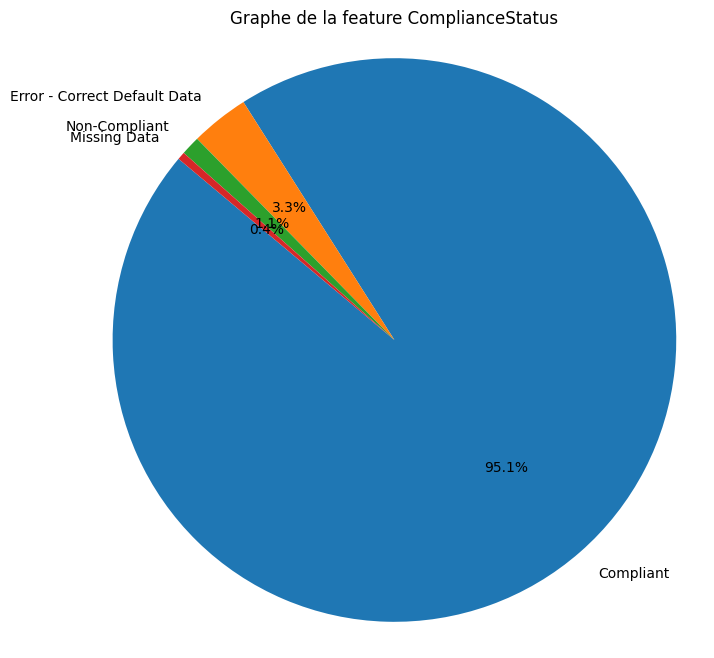

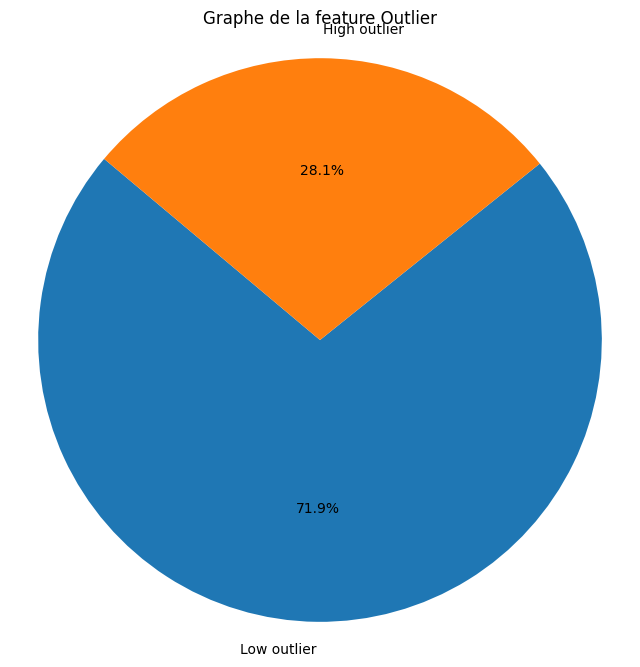

In [176]:
for feature in df.columns:
    # Données
    data_for_camembert = df[feature].value_counts()

    if len(data_for_camembert)<40:
        # Création du diagramme circulaire
        plt.figure(figsize=(8, 8))
        plt.pie(data_for_camembert, labels=data_for_camembert.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Le cercle est dessiné comme un cercle
    
        # Ajout d'un titre
        plt.title(f'Graphe de la feature {feature}')
    
        # Affichage du diagramme
        plt.show()


In [177]:
df['Comments'].value_counts()

Series([], Name: count, dtype: int64)

La feature Comments ne contient que des valeurs NaN

In [178]:
df['State'].value_counts()

State
WA    3376
Name: count, dtype: int64

La feature State ne contient que la valeur WA (Etat de Washington) pour tous les individus

In [179]:
df['City'].value_counts()

City
Seattle    3376
Name: count, dtype: int64

La feature City ne contient que la valeur Seattle pour tous les individus

In [180]:
df['DataYear'].value_counts()

DataYear
2016    3376
Name: count, dtype: int64

La feature DataYear ne contient que la valeur 2016 pour tous les individus

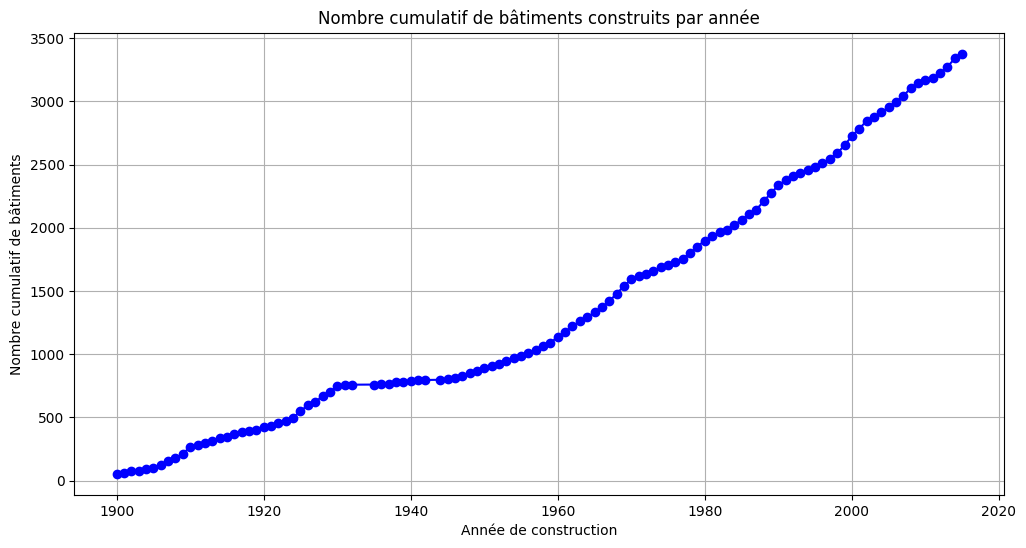

In [181]:
import matplotlib.pyplot as plt

# Obtenir les données de nombre de bâtiments par année
year_counts = df['YearBuilt'].value_counts().sort_index()

# Obtenir les valeurs cumulatives
cumulative_counts = year_counts.cumsum()

# Création du graphique cumulatif
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, color='blue', marker='o', linestyle='-')

# Ajout de titres et libellés
plt.xlabel('Année de construction')
plt.ylabel('Nombre cumulatif de bâtiments')
plt.title('Nombre cumulatif de bâtiments construits par année')

# Affichage du graphique
plt.grid(True)
plt.show()



On voit bien ici un aplatissement de la courbe dans les années 30/40, sûrement consécutif à la crise de 1929, retard comblé plus tard

Je propose de supprimer les colonnes suivantes : 

 - Comments
 - State
 - City
 - DataYear

En effet, ces colonnes contiennent tous des valeurs non significatives pour notre problème


## suppression des colonnes Comments, State, City, DataYear

In [182]:
df.drop(['Comments', 'State', 'City', 'DataYear'], axis=1, inplace=True)

In [183]:
df['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [184]:
df['Outlier'].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

## Etude ListOfAllPropertyUseTypes et LargestPropertyUseType/Secondlargest/thirdLargest

In [185]:
df['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Multifamily Housing                                     1667
Office                                                   498
Non-Refrigerated Warehouse                               199
K-12 School                                              139
Other                                                    102
Retail Store                                              99
Hotel                                                     77
Worship Facility                                          71
Distribution Center                                       54
Senior Care Community                                     46
Supermarket/Grocery Store                                 41
Medical Office                                            41
Parking                                                   32
Other - Recreation                                        31
Self-Storage Facility                                     28
College/University                                        25
R

In [186]:
for info in df['ListOfAllPropertyUseTypes'].value_counts().index:
    print(info)


Multifamily Housing
Multifamily Housing, Parking
Office
K-12 School
Office, Parking
Non-Refrigerated Warehouse
Non-Refrigerated Warehouse, Office
Other
Retail Store
Multifamily Housing, Retail Store
Multifamily Housing, Parking, Retail Store
Worship Facility
Hotel
Office, Retail Store
Multifamily Housing, Office, Parking
Multifamily Housing, Office
Distribution Center
Self-Storage Facility
College/University
Office, Other
Senior Care Community
Medical Office
Supermarket/Grocery Store
Office, Other, Parking
Parking, Senior Care Community
Distribution Center, Office
Residence Hall/Dormitory
Parking, Supermarket/Grocery Store
Multifamily Housing, Parking, Swimming Pool
Office, Parking, Retail Store
Non-Refrigerated Warehouse, Office, Retail Store
Hotel, Parking
Medical Office, Parking
Office, Restaurant
Other - Recreation
Other, Parking
Parking, Worship Facility
Other - Entertainment/Public Assembly
Multifamily Housing, Parking, Restaurant
Other, Retail Store
Non-Refrigerated Warehouse, O

In [187]:
filtre = df['ListOfAllPropertyUseTypes']=='Multifamily Housing, Office, Parking'
colonnes_usages = ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA']
df[filtre][colonnes_usages]

ListOfAllPropertyUseTypes LargestPropertyUseType  \
650   Multifamily Housing, Office, Parking    Multifamily Housing   
662   Multifamily Housing, Office, Parking    Multifamily Housing   
764   Multifamily Housing, Office, Parking    Multifamily Housing   
765   Multifamily Housing, Office, Parking    Multifamily Housing   
816   Multifamily Housing, Office, Parking    Multifamily Housing   
981   Multifamily Housing, Office, Parking    Multifamily Housing   
1001  Multifamily Housing, Office, Parking    Multifamily Housing   
1014  Multifamily Housing, Office, Parking    Multifamily Housing   
1026  Multifamily Housing, Office, Parking    Multifamily Housing   
1032  Multifamily Housing, Office, Parking    Multifamily Housing   
1091  Multifamily Housing, Office, Parking    Multifamily Housing   
1138  Multifamily Housing, Office, Parking    Multifamily Housing   
1216  Multifamily Housing, Office, Parking    Multifamily Housing   
1348  Multifamily Housing, Office, Parking    Multifamily Housing   
1406  Multifamily Housing, Office, Parking    Multifamily Housing   
1411  Multifamily Housing, Office, Parking    Multifamily Housing   
1536  Multifamily Housing, Office, Parking    Multifamily Housing   
1626  Multifamily Housing, Office, Parking    Multifamily Housing   
1673  Multifamily Housing, Office, Parking    Multifamily Housing   
1769  Multifamily Housing, Office, Parking    Multifamily Housing   
1947  Multifamily Housing, Office, Parking                Parking   
2132  Multifamily Housing, Office, Parking    Multifamily Housing   
2262  Multifamily Housing, Office, Parking    Multifamily Housing   
2269  Multifamily Housing, Office, Parking    Multifamily Housing   
2329  Multifamily Housing, Office, Parking    Multifamily Housing   
2334  Multifamily Housing, Office, Parking    Multifamily Housing   
2466  Multifamily Housing, Office, Parking    Multifamily Housing   
2487  Multifamily Housing, Office, Parking    Multifamily Housing   
2578  Multifamily Housing, Office, Parking    Multifamily Housing   
2586  Multifamily Housing, Office, Parking    Multifamily Housing   
2735  Multifamily Housing, Office, Parking    Multifamily Housing   
2865  Multifamily Housing, Office, Parking    Multifamily Housing   
2907  Multifamily Housing, Office, Parking    Multifamily Housing   
2990  Multifamily Housing, Office, Parking    Multifamily Housing   
2991  Multifamily Housing, Office, Parking    Multifamily Housing   
3016  Multifamily Housing, Office, Parking    Multifamily Housing   
3018  Multifamily Housing, Office, Parking    Multifamily Housing   
3039  Multifamily Housing, Office, Parking    Multifamily Housing   
3099  Multifamily Housing, Office, Parking    Multifamily Housing   
3163  Multifamily Housing, Office, Parking                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
650                     20148.0                      Parking   
662                     11980.0                       Office   
764                     33396.0                      Parking   
765                     70013.0                      Parking   
816                     29948.0                      Parking   
981                     32063.0                      Parking   
1001                   150092.0                      Parking   
1014                    15418.0                      Parking   
1026                    21169.0                      Parking   
1032                    38682.0                      Parking   
1091                    31017.0                      Parking   
1138                    73266.0                      Parking   
1216                    20087.0                      Parking   
1348                    18353.0                      Parking   
1406                    22350.0                       Office   
1411                    52211.0                      Parking   
1536                    24572.0                      Parking   
1626                    39141.0    

On voit que la liste des usages dans la colonne ListOfAllPropertyUseTypes n'est pas dans l'ordre des LargestPropertyType, SecondLargest et ThirdLargest

In [188]:
filtre = df['ListOfAllPropertyUseTypes']=='Multifamily Housing'
colonnes_usages = ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA']
df[filtre][colonnes_usages]

ListOfAllPropertyUseTypes LargestPropertyUseType  \
9          Multifamily Housing    Multifamily Housing   
173        Multifamily Housing    Multifamily Housing   
188        Multifamily Housing    Multifamily Housing   
189        Multifamily Housing    Multifamily Housing   
642        Multifamily Housing    Multifamily Housing   
...                        ...                    ...   
3330       Multifamily Housing    Multifamily Housing   
3331       Multifamily Housing    Multifamily Housing   
3336       Multifamily Housing    Multifamily Housing   
3353       Multifamily Housing    Multifamily Housing   
3358       Multifamily Housing    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
9                       56132.0                          NaN   
173                     50350.0                          NaN   
188                     56617.0                          NaN   
189                     43673.0                          NaN   
642                     31334.0                          NaN   
...                         ...                          ...   
3330                    31748.0                          NaN   
3331                   128460.0                          NaN   
3336                    91128.0                 Retail Store   
3353                    71241.0                          NaN   
3358                    17666.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
9                                 NaN                         NaN   
173                               NaN                         NaN   
188                               NaN                         NaN   
189                               NaN                         NaN   
642                               NaN                         NaN   
...                               ...                         ...   
3330                              NaN                         NaN   
3331                              NaN                         NaN   
3336                           6340.0                         NaN   
3353                              NaN                         NaN   
3358                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  
9                                NaN  
173                              NaN  
188                              NaN  
189                              NaN  
642                              NaN  
...                              ...  
3330                             NaN  
3331                             NaN  
3336                             NaN  
3353                             NaN  
3358                             NaN  

[866 rows x 7 columns]

In [189]:
df['DefaultData'].value_counts()

DefaultData
False    3263
True      113
Name: count, dtype: int64

In [190]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsInte

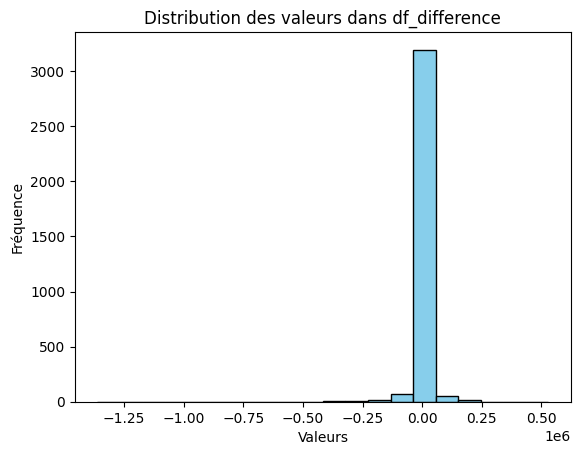

In [191]:
df[['PropertyGFATotal','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']]
df_somme_3_principaux_usages = df[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].sum(axis=1)
df_difference = df['PropertyGFATotal']-df_somme_3_principaux_usages

# Visualisation de la distribution des valeurs dans df_difference
plt.hist(df_difference, bins=20, color='skyblue', edgecolor='black')
# plt.yscale('log')  # Utilisation de l'échelle logarithmique en ordonnée
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs dans df_difference')
plt.show()

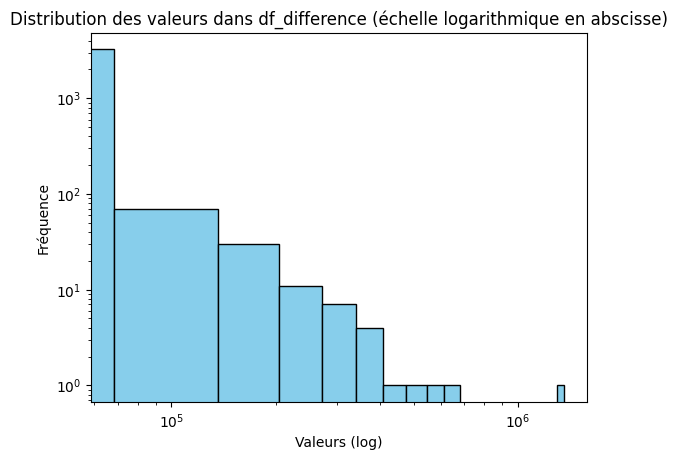

In [192]:
# Calcul de df_somme_3_principaux_usages
df_somme_3_principaux_usages = df[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].sum(axis=1)
# Calcul de df_difference
df_difference = df['PropertyGFATotal'] - df_somme_3_principaux_usages
df_difference = (df_difference**2)**0.5
# Visualisation de la distribution des valeurs dans df_difference
plt.hist(df_difference, bins=20, color='skyblue', edgecolor='black')
plt.xscale('log')  # Utilisation de l'échelle logarithmique en abscisse
plt.yscale('log')  # Utilisation de l'échelle logarithmique en ordonnée
plt.xlabel('Valeurs (log)')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs dans df_difference (échelle logarithmique en abscisse)')
plt.show()

In [193]:
(df_difference==0).value_counts()


False    1781
True     1595
Name: count, dtype: int64

## Doublons

In [194]:
df[df.duplicated(subset=['PropertyName'])]

OSEBuildingID          BuildingType          PrimaryPropertyType  \
1324          21526  Multifamily LR (1-4)         Low-Rise Multifamily   
1462          21893        NonResidential                    Warehouse   
1556          22418  Multifamily LR (1-4)         Low-Rise Multifamily   
1566          22486        NonResidential  Small- and Mid-Sized Office   
1574          22521  Multifamily LR (1-4)         Low-Rise Multifamily   
1644          22956  Multifamily LR (1-4)        Senior Care Community   
1800          23451  Multifamily MR (5-9)         Mid-Rise Multifamily   
1965          23963        NonResidential                    Warehouse   
1968          23971        NonResidential       Refrigerated Warehouse   
2081          24391  Multifamily LR (1-4)         Low-Rise Multifamily   
2367          25418  Multifamily LR (1-4)         Low-Rise Multifamily   
2609          26240  Multifamily LR (1-4)         Low-Rise Multifamily   
2966          27681  Multifamily LR (1-4)         Low-Rise Multifamily   
3266          49944  Multifamily MR (5-9)           Mixed Use Property   

                    PropertyName                 Address  ZipCode  \
1324                    Lakeview    1555 Lakeview Blvd E  98102.0   
1462                  South Park         9125 10th Ave S  98108.0   
1556                Central Park      1819 NW Central Pl  98107.0   
1566              Canal Building         3600 15th Ave W  98119.0   
1574     Garden Court Apartments          119 19th Ave E  98112.0   
1644             Northgate Plaza        11030 5th Ave NE  98125.0   
1800                    Fairview   1000 Queen Anne Ave N  98109.0   
1965            Bayview Building      923 S. Bayview St.  98134.0   
1968                 Airport Way  2415 Airport Way South  98134.0   
2081  Jefferson Court Apartments   10301 Greenwood Ave N  98133.0   
2367                    Parkside          620 19th Ave E  98112.0   
2609             Northgate Plaza         9416 1st Ave NE  98115.0   
2966        Crestview Apartments   2701 West Manor Place  98199.0   
3266               Pine Building       1535 First Avenue  98101.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1324                    2025049128                    3   
1462                    2433700015                    1   
1556                    2767703835                    6   
1566                    2770603315                    7   
1574                    2784100055                    3   
1644                    2926049055                    5   
1800                    3879900295                    7   
1965                    7666202991                    2   
1968                    7666203180                    2   
2081                    3442000069                    6   
2367                    5191100005                    3   
2609                    6173900000                    5   
2966                    5036300260                    7   
3266                    5160500000                    7   

               Neighborhood  Latitude  ...  SteamUse(kBtu)  Electricity(kWh)  \
1324                   EAST  47.63364  ...             0.0      6.518230e+04   
1462       GREATER DUWAMISH  47.52130  ...             0.0      4.786946e+05   
1556                BALLARD  47.66662  ...             0.0      1.805774e+05   
1566  MAGNOLIA / QUEEN ANNE  47.65252  ...             0.0      1.951076e+05   
1574                Central  47.61927  ...             0.0      2.467236e+05   
1644                  North  47.70973  ...             0.0      8.946502e+05   
1800  MAGNOLIA / QUEEN ANNE  47.62828  ...             0.0      1.912163e+05   
1965       GREATER DUWAMISH  47.58082  ...             0.0      1.221822e+05   
1968       GREATER DUWAMISH  47.58118  ...             0.0      1.192644e+06   
2081              NORTHWEST  47.70384  ...             0.0      4.103323e+05   
2367                Central  47.62493  ...             0.0      1.306986e+05   
2609         

In [195]:
dup = df[df.duplicated(subset=['PropertyName'])]['PropertyName']
liste = []
for dupl in dup:
    liste.append(df[df['PropertyName']==dupl])

for dd in liste:
    print(dd[['PropertyName', 'Address']])

     PropertyName               Address
89       Lakeview       1208 NE 64th st
1324     Lakeview  1555 Lakeview Blvd E
     PropertyName          Address
162    South Park   1420 S Trenton
1462   South Park  9125 10th Ave S
      PropertyName             Address
1010  Central Park      5614 7th Ave S
1556  Central Park  1819 NW Central Pl
        PropertyName          Address
1158  Canal Building    712 N 34th St
1566  Canal Building  3600 15th Ave W
                 PropertyName                    Address
905   Garden Court Apartments  6334 Rainier Avenue South
1574  Garden Court Apartments             119 19th Ave E
         PropertyName           Address
323   Northgate Plaza   9709 3rd Ave NE
1644  Northgate Plaza  11030 5th Ave NE
2609  Northgate Plaza   9416 1st Ave NE
     PropertyName                Address
1272     Fairview    1000 Fairview Ave N
1800     Fairview  1000 Queen Anne Ave N
          PropertyName              Address
1338  Bayview Building  129 1st Avenue West
19

Il y a peu de doublons sur le nom de la propriété et ceux ci ne sont pas vraiment des doublons puisque les adresses sont différentes

In [196]:
df['DefaultData']

0       False
1       False
2       False
3       False
4       False
        ...  
3371     True
3372    False
3373    False
3374    False
3375    False
Name: DefaultData, Length: 3376, dtype: bool

In [197]:
df['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64

## Relation linéaires variables energie

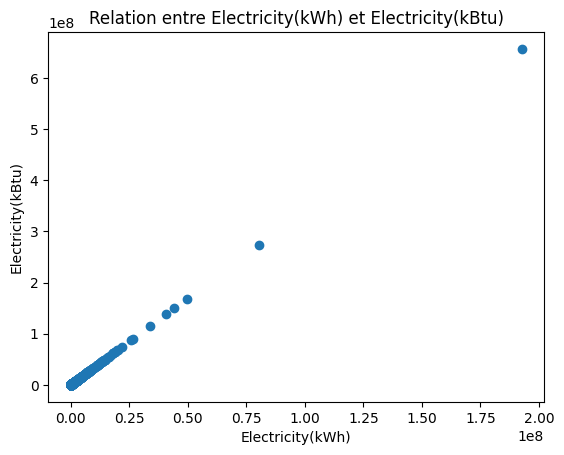

In [198]:
# Extraction des données des colonnes 'Electricity(kWh)' et 'Electricity(kBtu)'
electricity_kwh = df['Electricity(kWh)']
electricity_kbtu = df['Electricity(kBtu)']

# Création du graphe
plt.figure()

# Tracer le graphe
plt.scatter(electricity_kwh, electricity_kbtu)

# Ajout des titres et des étiquettes des axes
plt.xlabel('Electricity(kWh)')
plt.ylabel('Electricity(kBtu)')
plt.title('Relation entre Electricity(kWh) et Electricity(kBtu)')

# Affichage du graphe
plt.show()


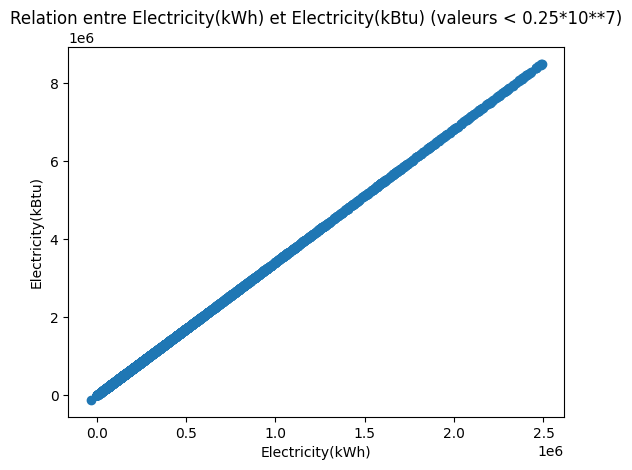

In [199]:
# Filtrer les valeurs supérieures à 0.25 dans la colonne 'Electricity(kWh)'
filtered_df = df[df['Electricity(kWh)'] < 0.25*10**7]

# Extraction des données des colonnes 'Electricity(kWh)' et 'Electricity(kBtu)'
electricity_kwh = filtered_df['Electricity(kWh)']
electricity_kbtu = filtered_df['Electricity(kBtu)']

# Création du graphe
plt.figure()

# Tracer le graphe
plt.scatter(electricity_kwh, electricity_kbtu)

# Ajout des titres et des étiquettes des axes
plt.xlabel('Electricity(kWh)')
plt.ylabel('Electricity(kBtu)')
plt.title('Relation entre Electricity(kWh) et Electricity(kBtu) (valeurs < 0.25*10**7)')

# Affichage du graphe
plt.show()


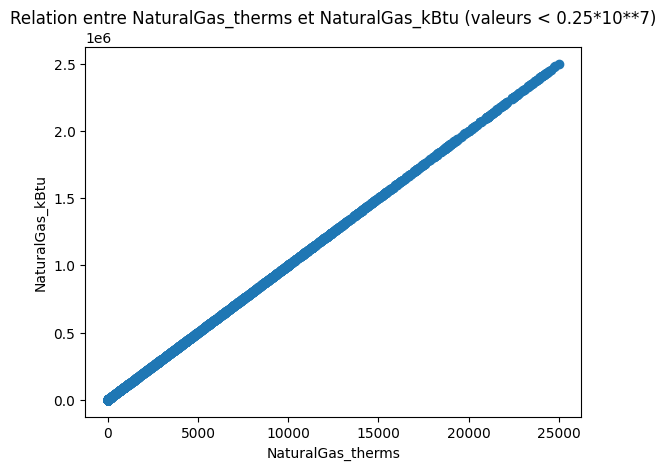

In [200]:
# Filtrer les valeurs supérieures à 0.25 dans la colonne 'Electricity(kWh)'
filtered_df = df[df['NaturalGas(therms)'] < 0.25*10**5]

# Extraction des données des colonnes 'Electricity(kWh)' et 'Electricity(kBtu)'
NaturalGas_therms = filtered_df['NaturalGas(therms)']
NaturalGas_kBtu = filtered_df['NaturalGas(kBtu)']

# Création du graphe
plt.figure()

# Tracer le graphe
plt.scatter(NaturalGas_therms, NaturalGas_kBtu)

# Ajout des titres et des étiquettes des axes
plt.xlabel('NaturalGas_therms')
plt.ylabel('NaturalGas_kBtu')
plt.title('Relation entre NaturalGas_therms et NaturalGas_kBtu (valeurs < 0.25*10**7)')

# Affichage du graphe
plt.show()


In [201]:
df[df['ComplianceStatus']=='Missing Data']

OSEBuildingID          BuildingType PrimaryPropertyType  \
28               34     SPS-District K-12         K-12 School   
31               37     SPS-District K-12         K-12 School   
62               87     SPS-District K-12         K-12 School   
81              118     SPS-District K-12         K-12 School   
85              122     SPS-District K-12         K-12 School   
95              140     SPS-District K-12         K-12 School   
133             217     SPS-District K-12         K-12 School   
139             227     SPS-District K-12         K-12 School   
152             242     SPS-District K-12         K-12 School   
614             820     SPS-District K-12         K-12 School   
630             850     SPS-District K-12         K-12 School   
746           19776        NonResidential               Other   
760           19801  Multifamily LR (1-4)               Other   
1894          23722     SPS-District K-12         K-12 School   
3166          49703     SPS-District K-12         K-12 School   

                        PropertyName               Address  ZipCode  \
28                    Meany Building  301/300 21st Ave. E.  98112.0   
31               John Hay Elementary      201 Garfield St.  98109.0   
62          Arbor Heights Elementary   3701 S.W. 104th St.  98146.0   
81                    Pathfinder K-8   1901 SW Genesee St.  98106.0   
85              John Muir Elementary    3301 S. Horton St.  98144.0   
95               B.F. Day Elementary   3921 Linden Ave. N.  98103.0   
133                   Whitman Middle    9201 15th Ave. NW.  98117.0   
139                Washington Middle       2101 S. Jackson  98144.0   
152          Olympic View Elementary     504 N.E. 95th St.  98115.0   
614        Bailey Gatzert Elementary    1301 E. Yesler Way  98122.0   
630                Leschi Elementary         135 32nd Ave.  98122.0   
746   Welcome Home Society - PriceCo    13537 Aurora Ave N  98133.0   
760               APEX BELLTOWN COOP        2225 First Ave  98121.0   
1894          North Beach Elementary    9018 24th Ave N.W.  98117.0   
3166            Catharine Blaine K-8     2550 34th Ave. W.  98199.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
28                      0688000090                    3   
31                      0809000005                    7   
62                      2518400005                    1   
81                      1324039116                    1   
85                      1524049002                    2   
95                      1931301145                    6   
133                     3526039131                    6   
139                     3646100540                    3   
152                     5100404840                    5   
614                     0007600137                    3   
630                     3416600240                    3   
746                     0164000020                    5   
760                     0246300000                    7   
1894                    3526039024                    6   
3166                    2225039016                    7   

               Neighborhood  Latitude  ...  SteamUse(kBtu)  Electricity(kWh)  \
28                  Central  47.62266  ...             0.0            0.0000   
31    MAGNOLIA / QUEEN ANNE  47.63290  ...             0.0       438691.6875   
62                SOUTHWEST  47.50970  ...             0.0       176088.0938   
81                 DELRIDGE  47.56360  ...             0.0       497706.8125   
85                SOUTHEAST  47.57324  ...             0.0       687906.8750   
95               LAKE UNION  47.65464  ...             0.0       616730.8125   
133                 BALLARD  47.69675  ...             0.0            0.0000   
139                 CENTRAL  47.59796  ...             0.0            0.0000   
152                   NORTH  47.69823  ...             0.0            0.0000   
614                 CENTRAL  47.60120  ...             0.0       573642.5000   
630

In [202]:
df['Outlier'].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

## Relation linéaires entre énergies différentes unités

In [203]:
df[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']].describe()

SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)
count         3.371000e+03           3.370000e+03
mean          5.403667e+06           5.276726e+06
std           2.161063e+07           1.593879e+07
min           0.000000e+00           0.000000e+00
25%           9.251286e+05           9.701822e+05
50%           1.803753e+06           1.904452e+06
75%           4.222455e+06           4.381429e+06
max           8.739237e+08           4.716139e+08

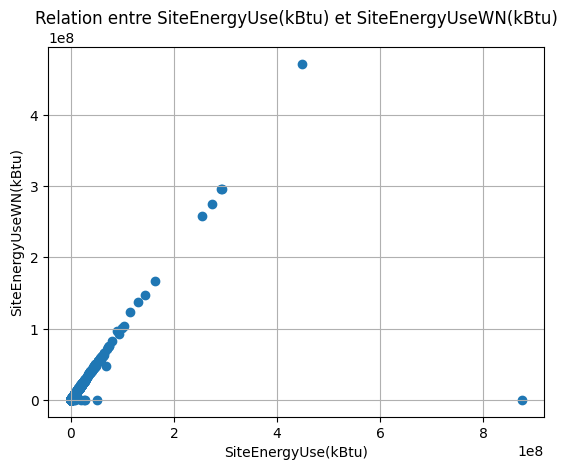

In [204]:
df[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]
# Tracer le scatter plot
plt.scatter(df['SiteEnergyUse(kBtu)'], df['SiteEnergyUseWN(kBtu)'])

# Ajouter des titres et des étiquettes d'axes
plt.title('Relation entre SiteEnergyUse(kBtu) et SiteEnergyUseWN(kBtu)')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('SiteEnergyUseWN(kBtu)')

# Afficher le graphique
plt.grid(True)
plt.show()



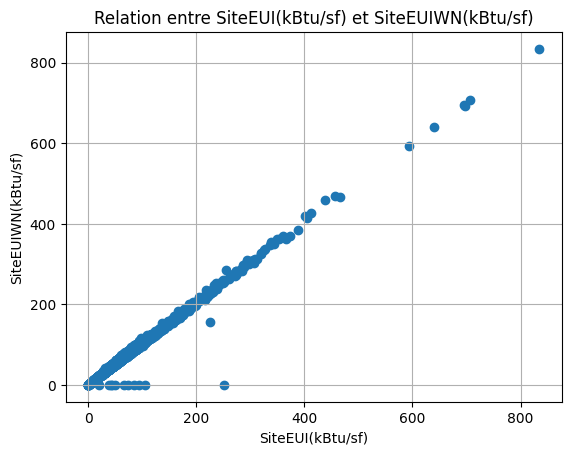

In [205]:

# Tracer le scatter plot
plt.scatter(df['SiteEUI(kBtu/sf)'], df['SiteEUIWN(kBtu/sf)'])

# Ajouter des titres et des étiquettes d'axes
plt.title('Relation entre SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf)')
plt.xlabel('SiteEUI(kBtu/sf)')
plt.ylabel('SiteEUIWN(kBtu/sf)')

# Afficher le graphique
plt.grid(True)
plt.show()



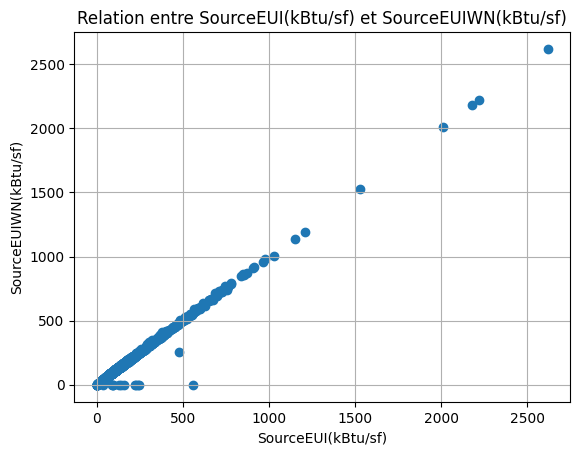

In [206]:
# Tracer le scatter plot
plt.scatter(df['SourceEUI(kBtu/sf)'], df['SourceEUIWN(kBtu/sf)'])

# Ajouter des titres et des étiquettes d'axes
plt.title('Relation entre SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf)')
plt.xlabel('SourceEUI(kBtu/sf)')
plt.ylabel('SourceEUIWN(kBtu/sf)')

# Afficher le graphique
plt.grid(True)
plt.show()

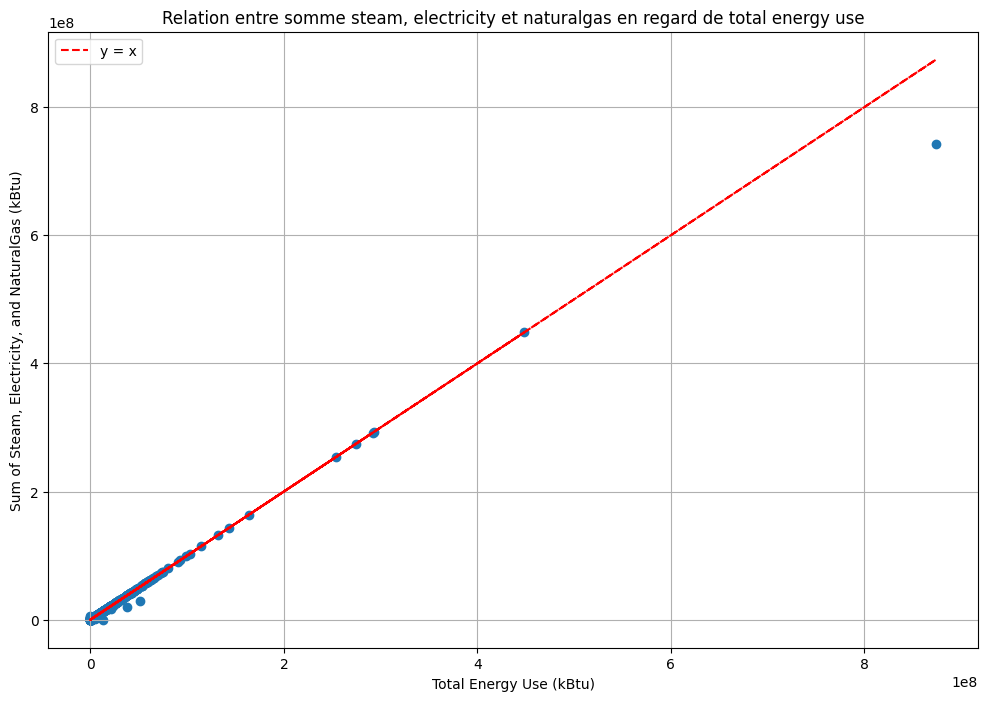

In [207]:
# Calcul des sommes d'énergie
somme_energy = df['SteamUse(kBtu)'] + df['Electricity(kBtu)'] + df['NaturalGas(kBtu)']
total_energy = df['SiteEnergyUse(kBtu)']

# Tracer le scatter plot
plt.figure(figsize=(12, 8))  # Définir la taille de la figure
plt.scatter(total_energy, somme_energy)

# Ajouter la droite d'équation y = x
plt.plot(total_energy, total_energy, color='red', linestyle='--', label='y = x')

# Ajouter des titres et des étiquettes d'axes
plt.title('Relation entre somme steam, electricity et naturalgas en regard de total energy use')
plt.xlabel('Total Energy Use (kBtu)')
plt.ylabel('Sum of Steam, Electricity, and NaturalGas (kBtu)')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


In [208]:
df

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
3371          50222  Nonresidential COS              Office   
3372          50223  Nonresidential COS               Other   
3373          50224  Nonresidential COS               Other   
3374          50225  Nonresidential COS  Mixed Use Property   
3375          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
3371                    1624049080                    2   
3372                    3558300000                    2   
3373                    1794501150                    7   
3374                    7883603155                    1   
3375                    7857002030                    2   

               Neighborhood  Latitude  ...  SteamUse(kBtu)  Electricity(kWh)  \
0                  DOWNTOWN  47.61220  ...      2003882.00      1.156514e+06   
1                  DOWNTOWN  47.61317  ...            0.00      9.504252e+05   
2                  DOWNTOWN  47.61393  ...     21566554.00      1.451544e+07   
3                  DOWNTOWN  47.61412  ...      2214446.25      8.115253e+05   
4                  DOWNTOWN  47.61375  ...            0.00      1.573449e+06   
...                     ...       ...  ...             ...               ...   
3371       GREATER DUWAMISH  47.56722  ...            0.00      1.536550e+05   
3372               DOWNTOWN  47.59625  ...            0.00      1.162210e+05   
3373  MAGNOLIA / QUEEN ANNE  47.63644  ...            0.00      5.252517e+05   
3374       GREATER DUWAMISH  47.52832  ...            0.00      1.022480e+05   
3375       GREATER DUWAMISH  47.53939  ...            0.00      1.267744e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0          3.946027e+06        12764.529300      1.276453e+06        False   
1          3.242851e+06        51450.816410      5.145082e+06        False   
2          4.952666e+07        14938.000000      1.493800e+06        False   
3          2.768924e+06        18112.130860      1.811213e+06        False   
4          5.368607e+06        88039.984380      8.803998e+06        False   
...                 ...                 ...               ...          ...   
3371       5.242709e+05         3254.750244      3.254750e+05         True   
3372       3.965461e+05         5537.299805      5.537300e+05        False   
3373       1

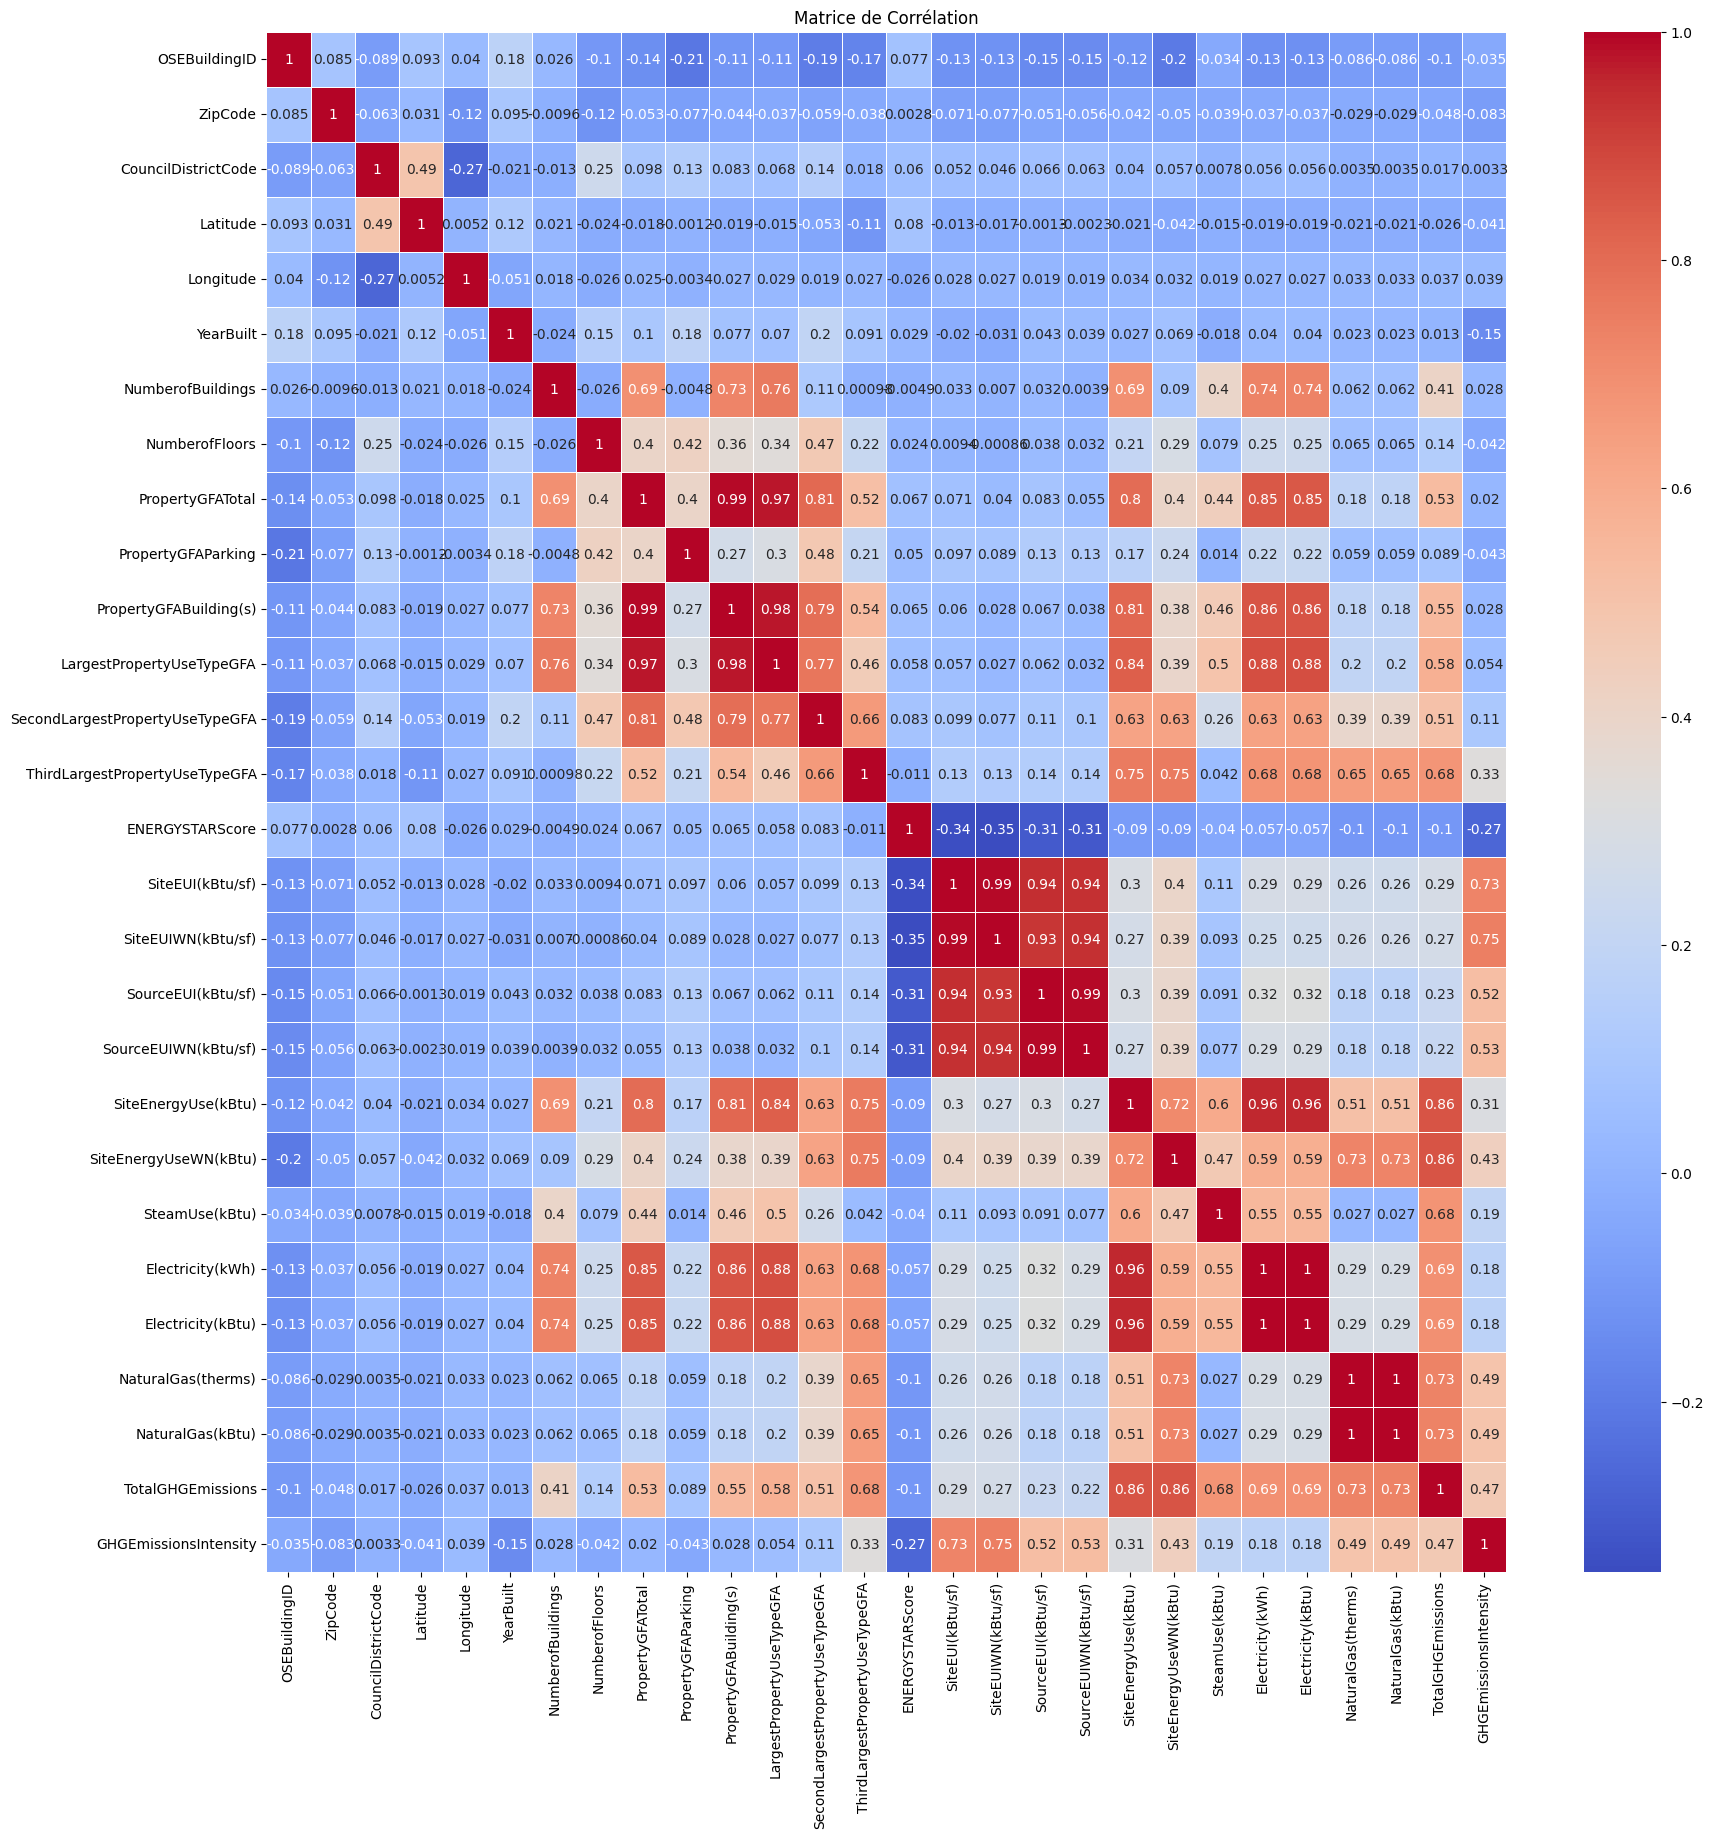

In [209]:

# Sélectionner seulement les colonnes quantitatives pour le calcul de la corrélation
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculer la matrice de corrélation pour les variables quantitatives
correlation_matrix = df[numeric_columns].corr()

# Définir la taille de la figure
plt.figure(figsize=(20, 20))

# Visualiser la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


In [210]:
a = 0
for type, effectif in df['ListOfAllPropertyUseTypes'].value_counts().items():
    if 'Multifamily Housing' in type:
        a+=1
        print(a, type, effectif)

1 Multifamily Housing 866
2 Multifamily Housing, Parking 464
3 Multifamily Housing, Retail Store 52
4 Multifamily Housing, Parking, Retail Store 51
5 Multifamily Housing, Office, Parking 40
6 Multifamily Housing, Office 26
7 Multifamily Housing, Parking, Swimming Pool 16
8 Multifamily Housing, Parking, Restaurant 8
9 Multifamily Housing, Office, Parking, Retail Store 7
10 Multifamily Housing, Office, Other, Parking 7
11 Multifamily Housing, Other 7
12 Multifamily Housing, Swimming Pool 7
13 Multifamily Housing, Office, Other 5
14 Multifamily Housing, Restaurant 5
15 Multifamily Housing, Office, Restaurant 5
16 Multifamily Housing, Restaurant, Retail Store 5
17 Multifamily Housing, Office, Retail Store 4
18 Lifestyle Center, Multifamily Housing, Office, Parking 3
19 Multifamily Housing, Parking, Supermarket/Grocery Store 3
20 Multifamily Housing, Parking, Restaurant, Retail Store 3
21 Medical Office, Multifamily Housing, Parking 3
22 Multifamily Housing, Office, Parking, Restaurant 2
23

## Tri des features

In [211]:
features_qualitatives_usages = ['PrimaryPropertyType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'BuildingType', 'Neighborhood']
features_quantitatives_usages = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt', 'CouncilDistrictCode']
features_qualitatives_inutiles = ['PropertyName', 'Address']
features_quantitatives_inutiles = ['OSEBuildingID', 'ZipCode', 'Latitude', 'Longitude'] 
## features_quantitatives_inutiles = ['OSEBuildingID', 'ZipCode', 'Latitude', 'Longitude', 'TaxParcelIdentificationNumber']
features_energy_usage = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
features_energy_star_score = ['ENERGYSTARScore', 'YearsENERGYSTARCertified']
features_GHG = ['GHGEmissionsIntensity', 'TotalGHGEmissions']
features_data_quality = ['DefaultData', 'ComplianceStatus', 'Outlier']
features_qualitatives = [features_qualitatives_usages, features_qualitatives_inutiles, features_data_quality]
features_quantitatives = [features_quantitatives_usages, features_quantitatives_inutiles, features_energy_usage, features_energy_star_score, features_GHG]
features = features_qualitatives + features_quantitatives
nb_features = 0
for feat in features:
    print(f'La feature {feat} contient {len(feat)} features différentes \n')
    nb_features += len(feat)

print(f'Il y a  {nb_features} features assignées')

La feature ['PrimaryPropertyType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'BuildingType', 'Neighborhood'] contient 7 features différentes 

La feature ['PropertyName', 'Address'] contient 2 features différentes 

La feature ['DefaultData', 'ComplianceStatus', 'Outlier'] contient 3 features différentes 

La feature ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt', 'CouncilDistrictCode'] contient 10 features différentes 

La feature ['OSEBuildingID', 'ZipCode', 'Latitude', 'Longitude'] contient 4 features différentes 

La feature ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 

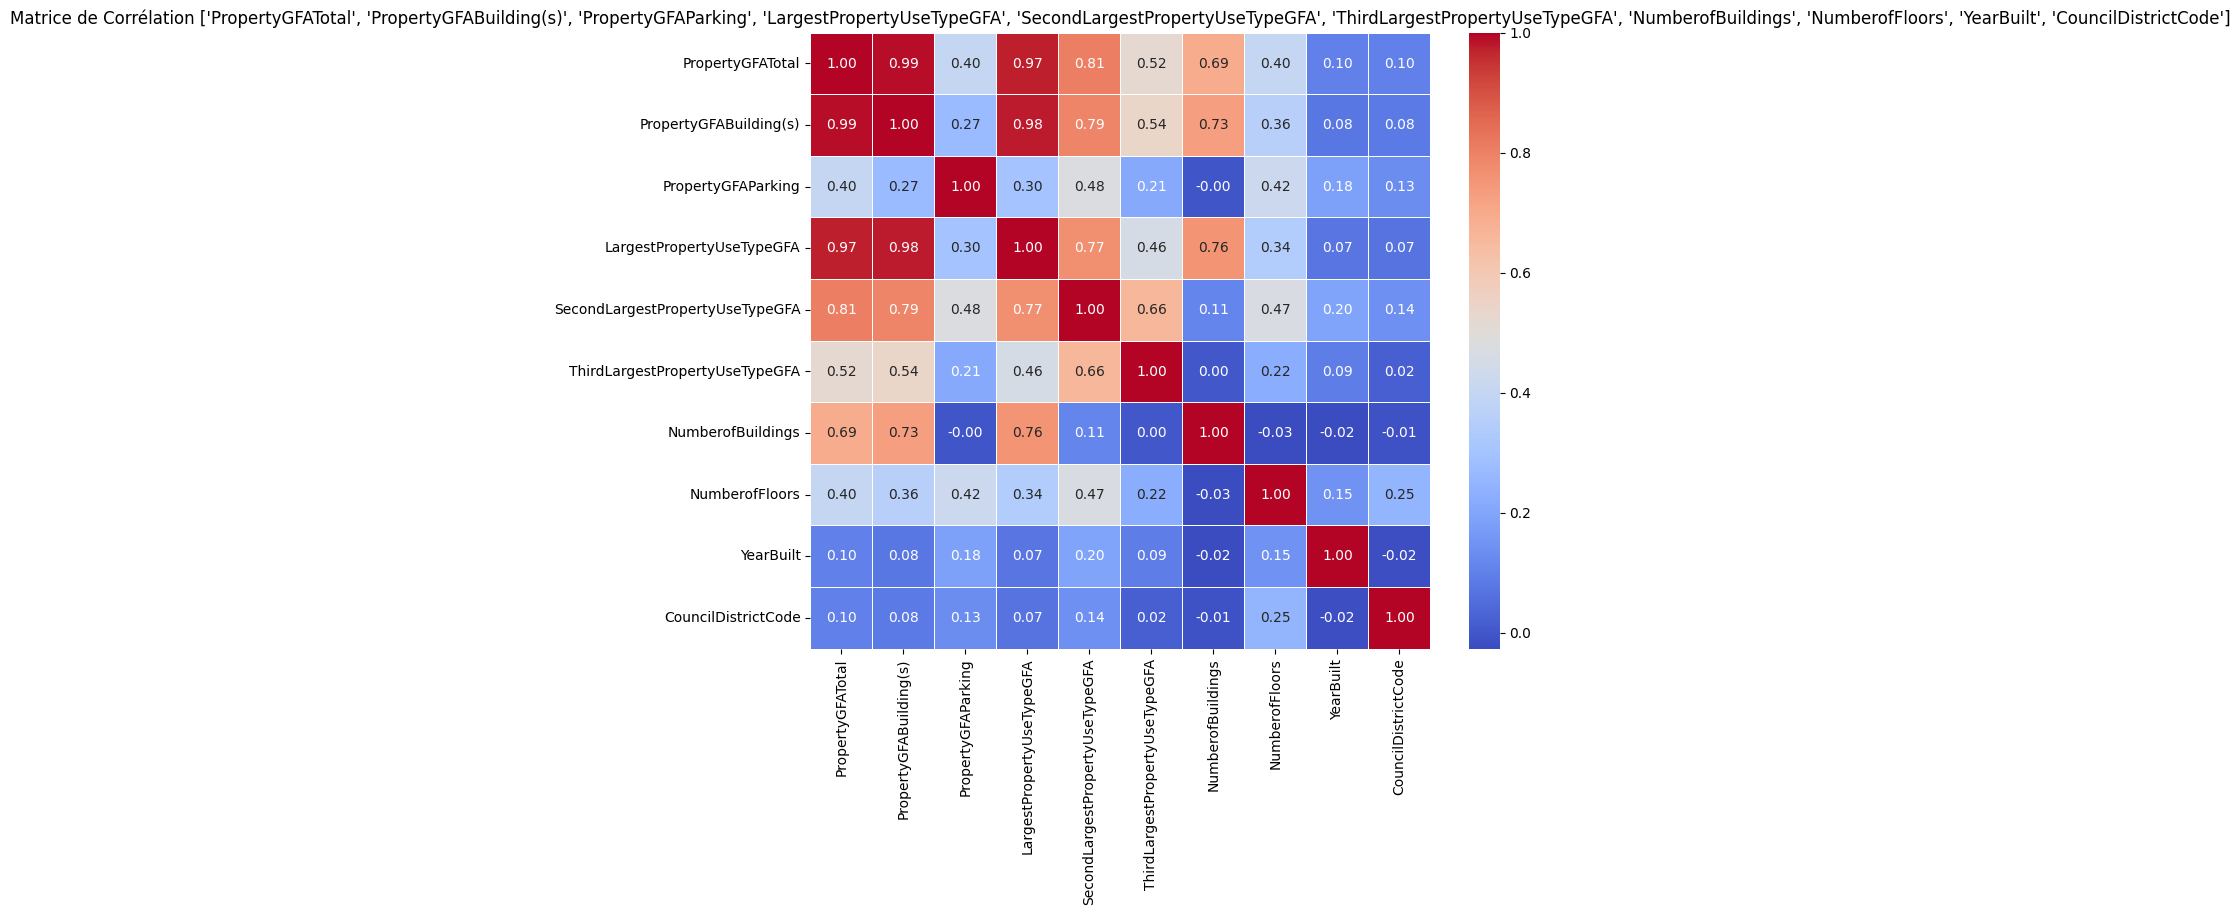

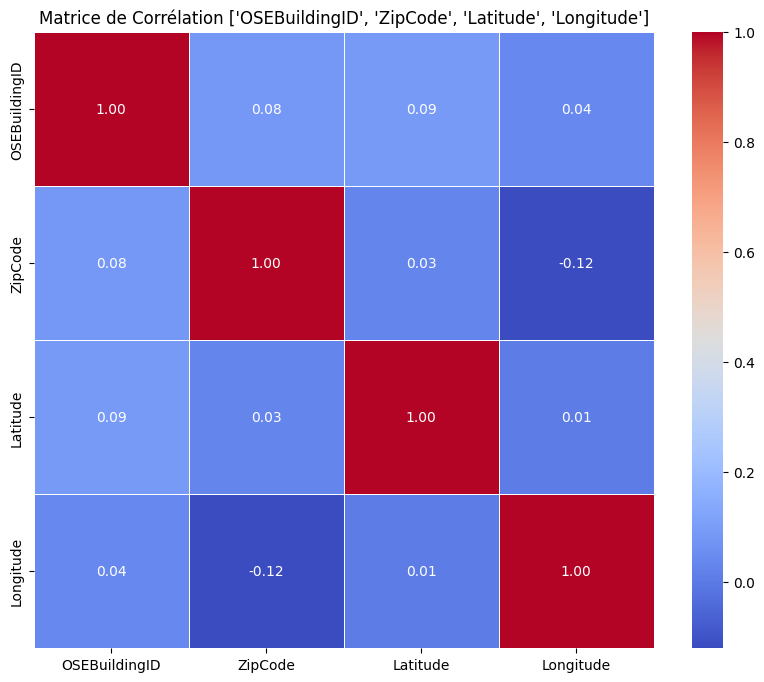

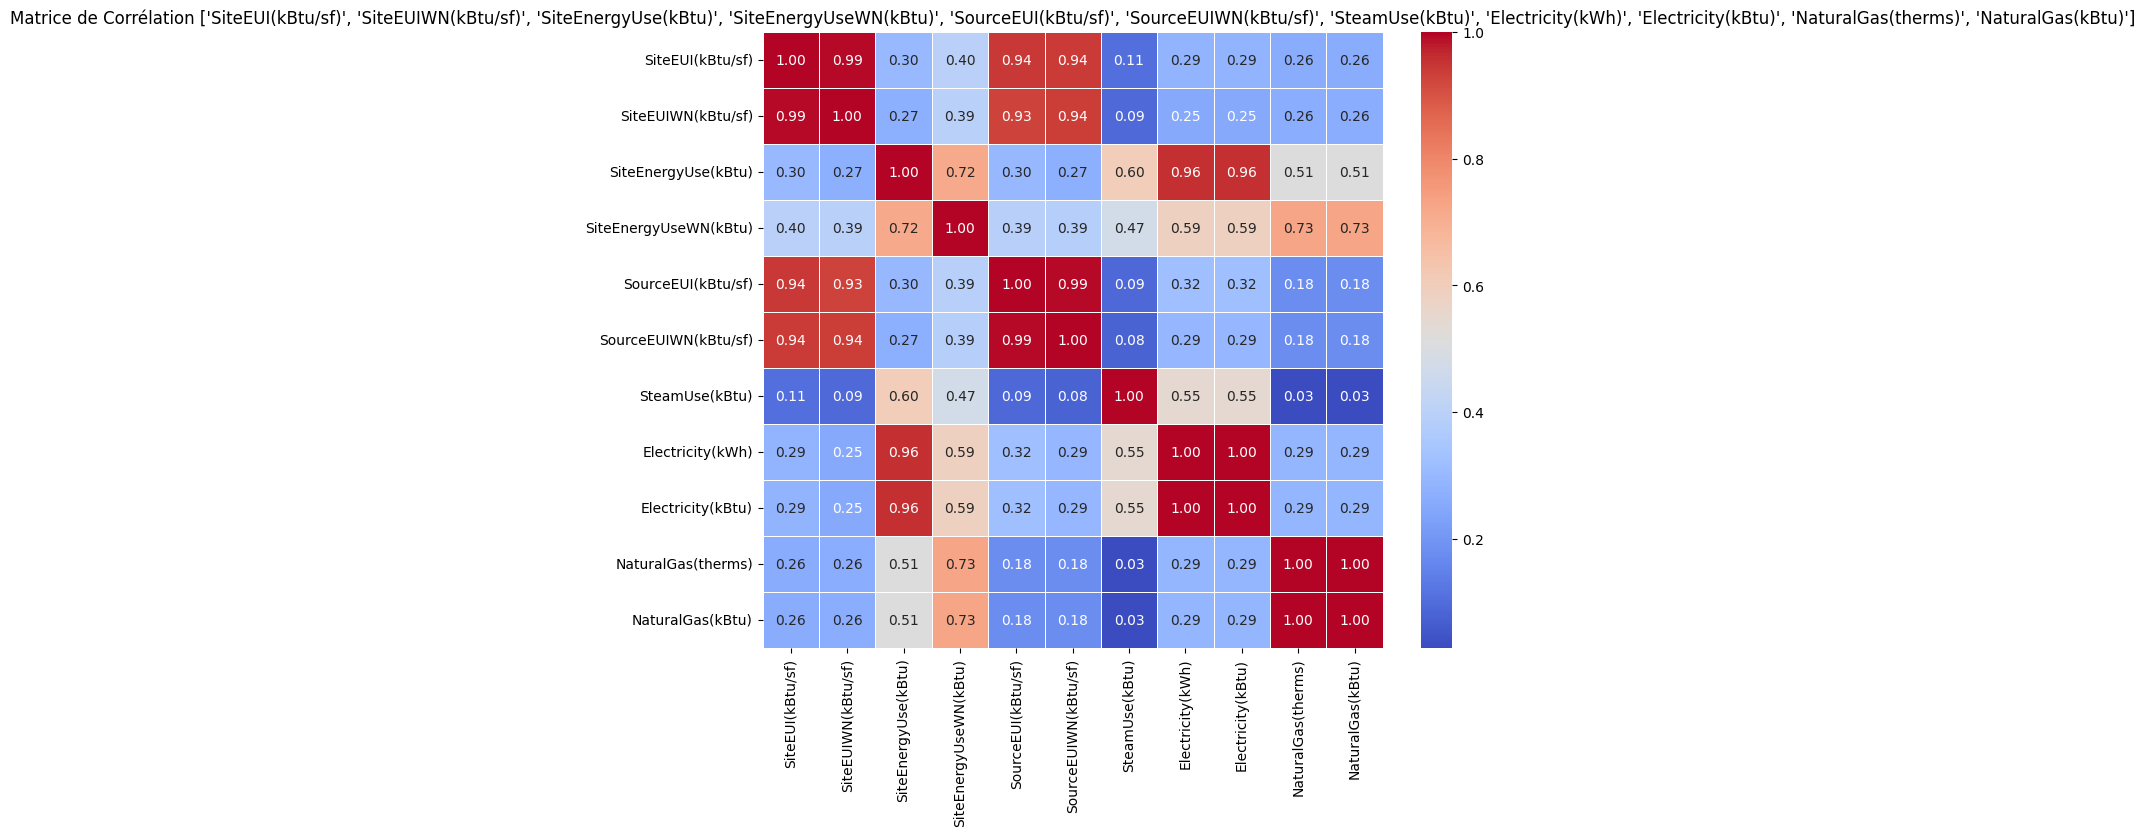

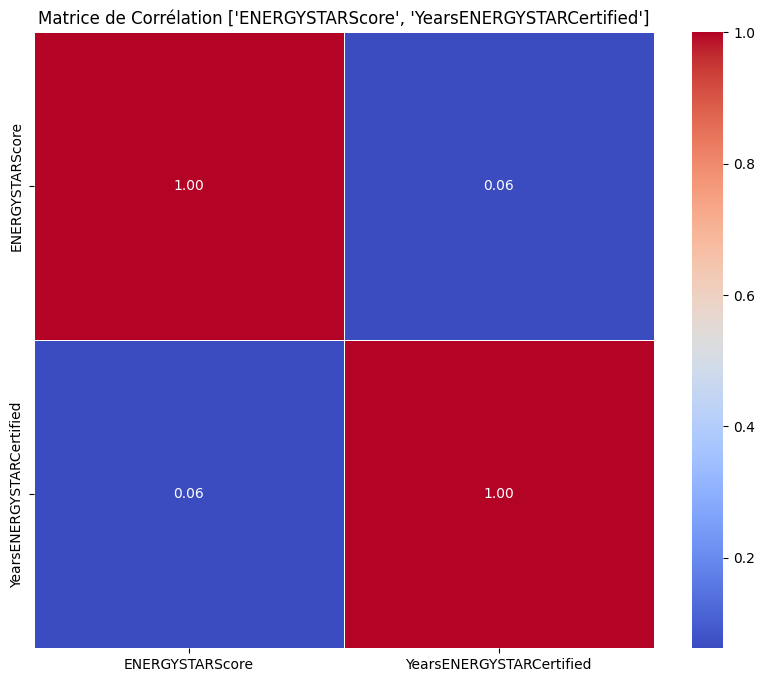

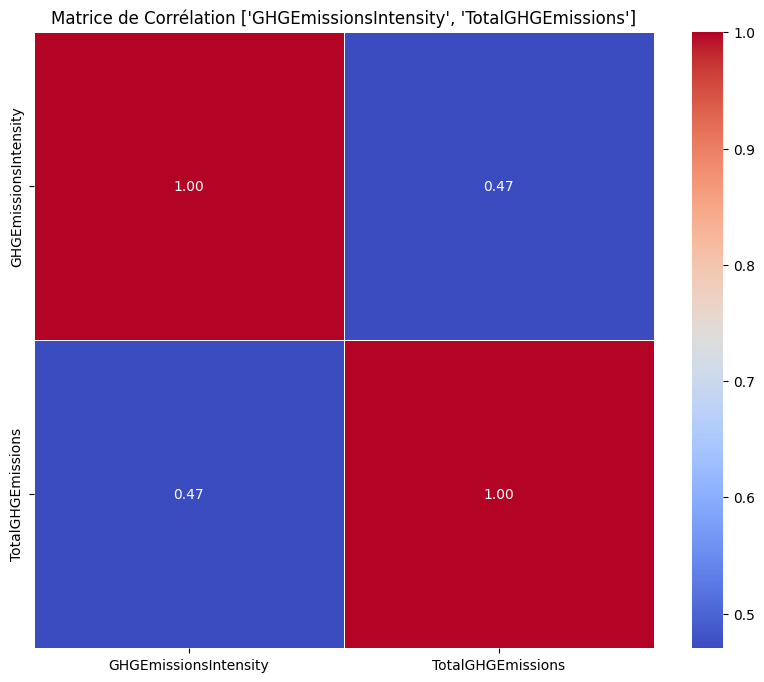

In [212]:
for feat in features_quantitatives:
    matrice_correlation = df[feat].corr()
    # Créer une heatmap avec Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Matrice de Corrélation {feat}')
    plt.show()

In [213]:
df['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64

## Analyse de l'impact de ComplianceStatus

### Analyse des variables liées

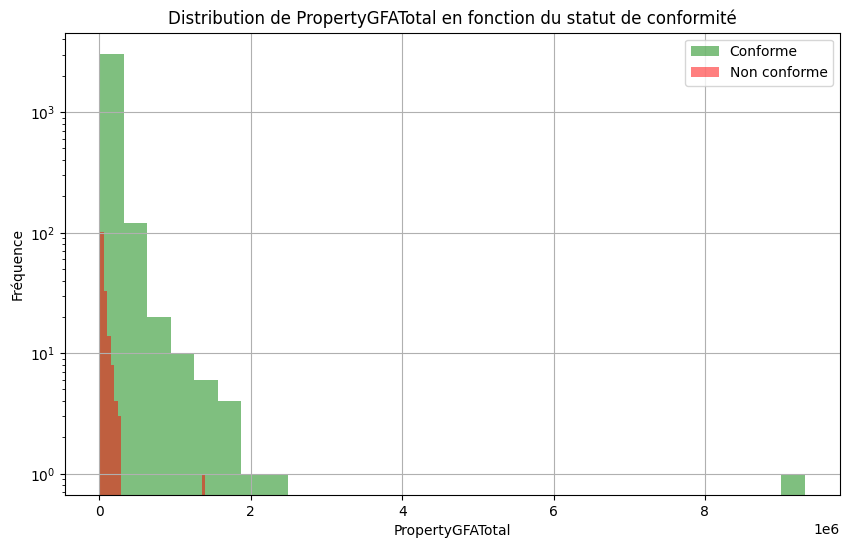

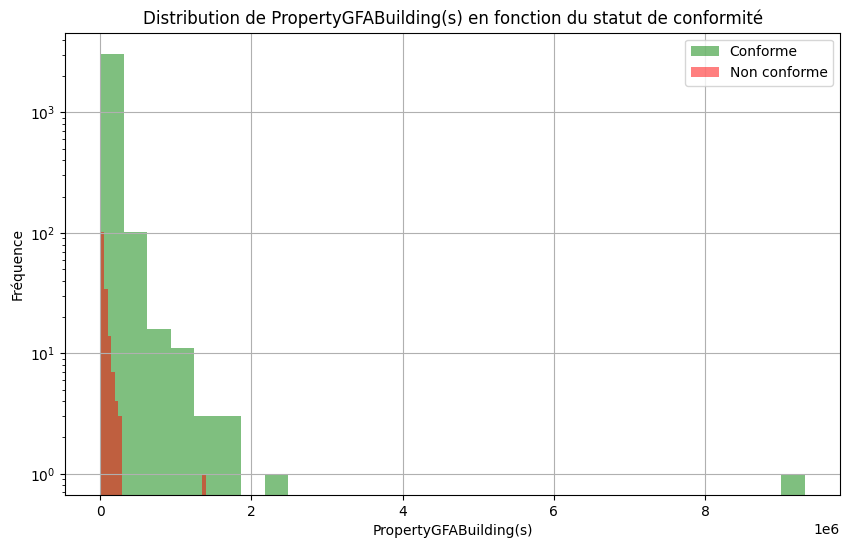

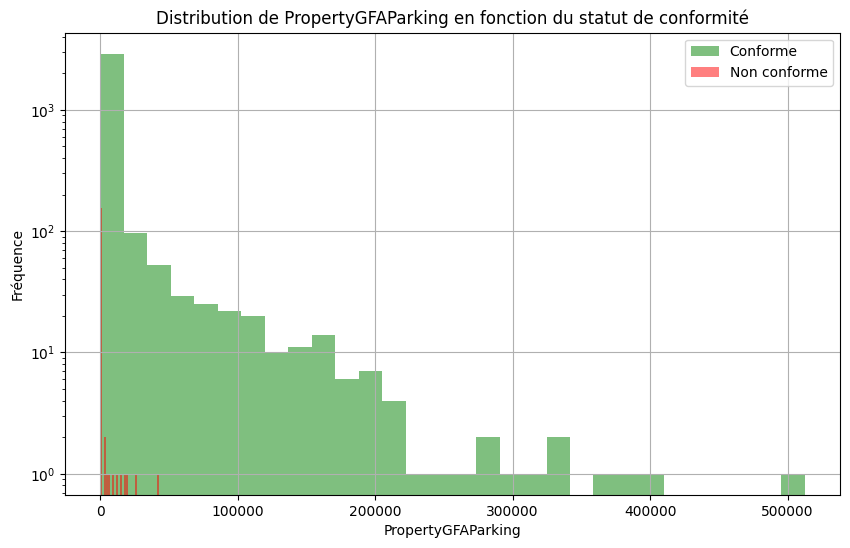

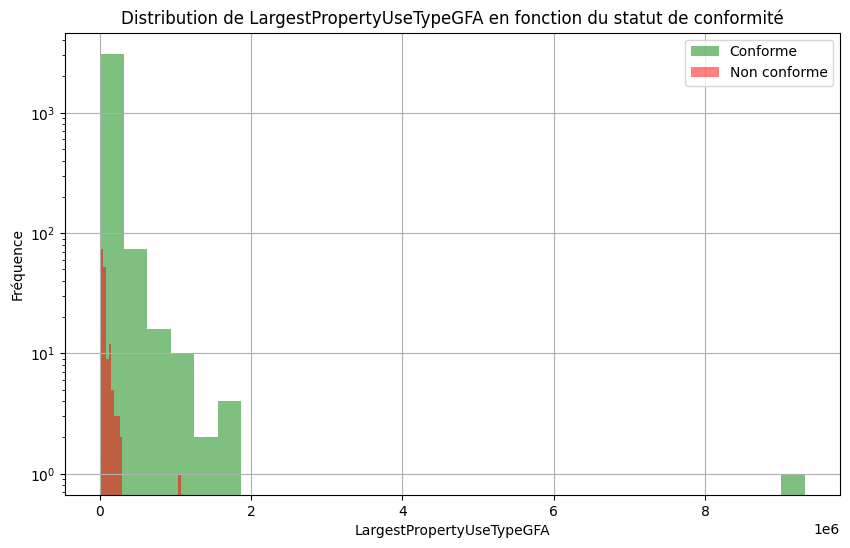

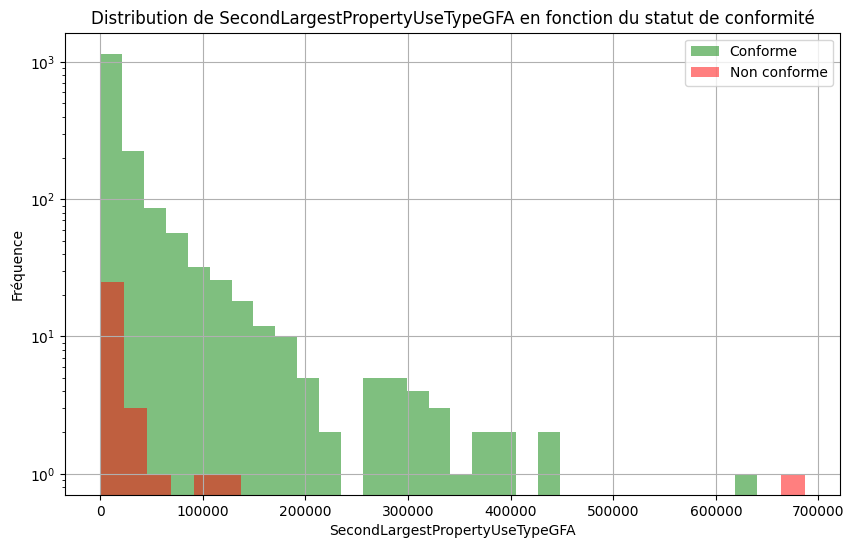

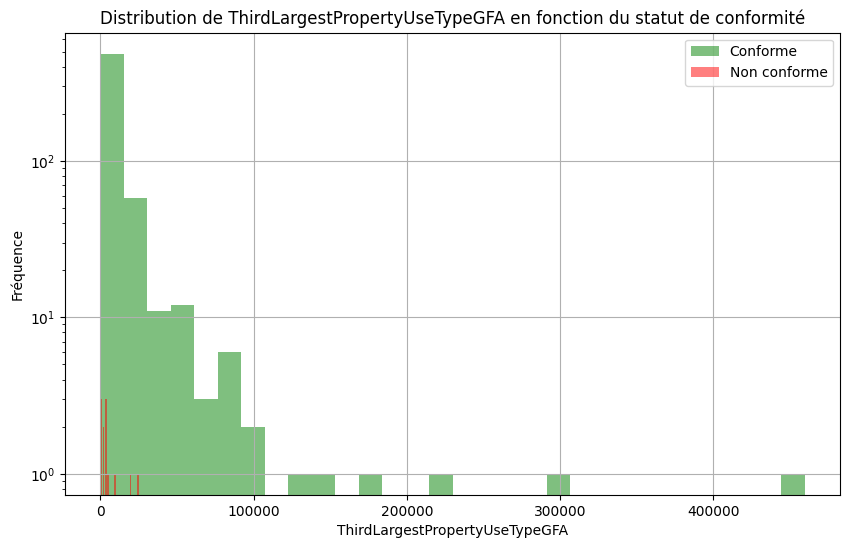

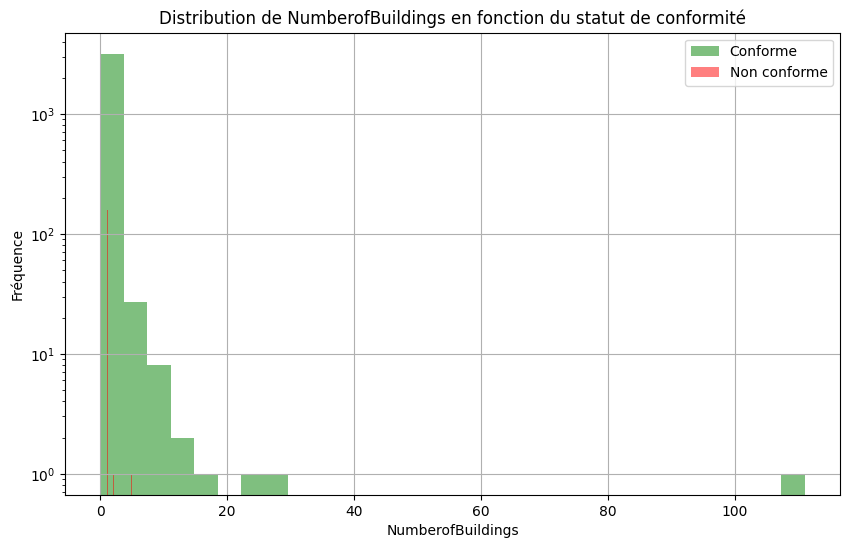

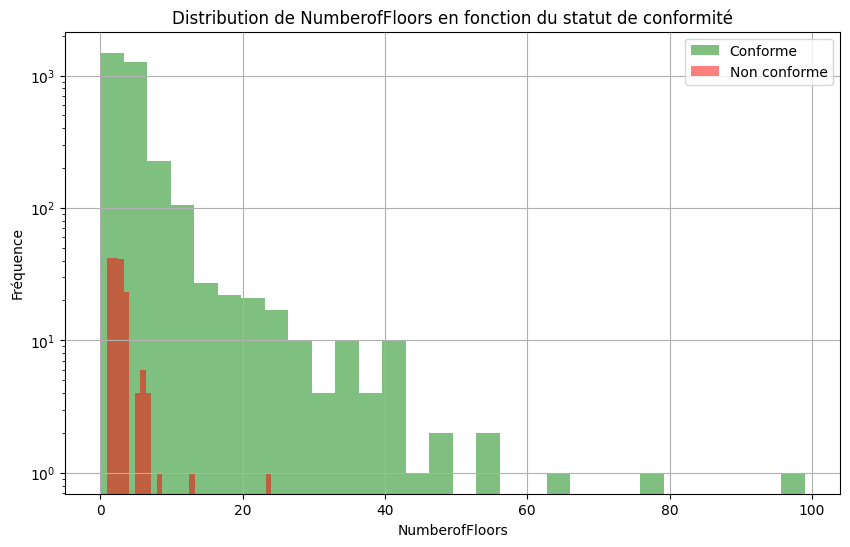

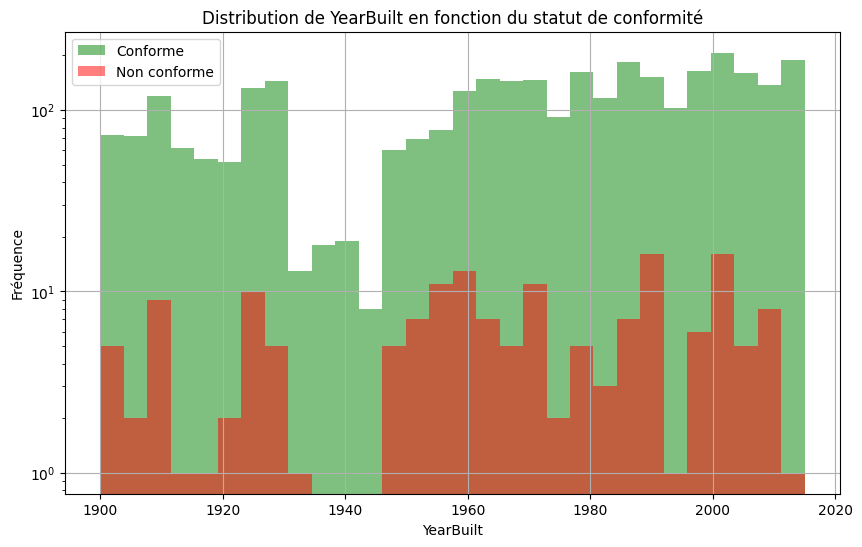

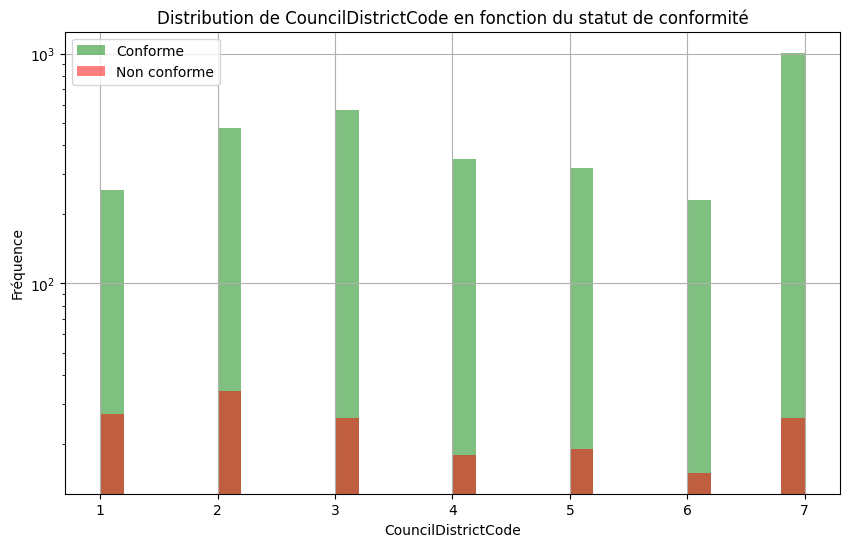

In [214]:
# Sélectionner les variables à analyser
variables = features_quantitatives_usages 

# Comparaison des distributions pour chaque variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Distribution pour les données conformes
    plt.hist(df[df['ComplianceStatus'] == 'Compliant'][variable], bins=30, color='green', alpha=0.5, label='Conforme')
    
    # Distribution pour les données non conformes
    plt.hist(df[df['ComplianceStatus'] != 'Compliant'][variable], bins=30, color='red', alpha=0.5, label='Non conforme')
    
    plt.title(f'Distribution de {variable} en fonction du statut de conformité')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()



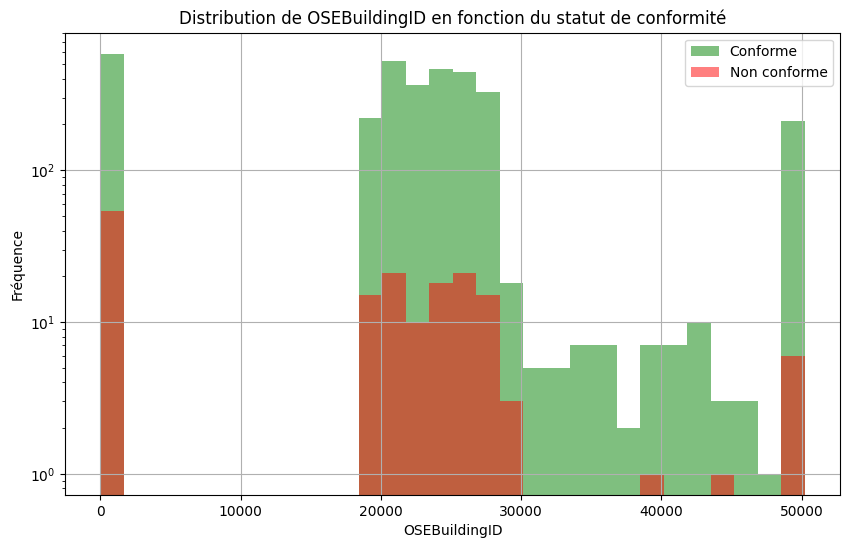

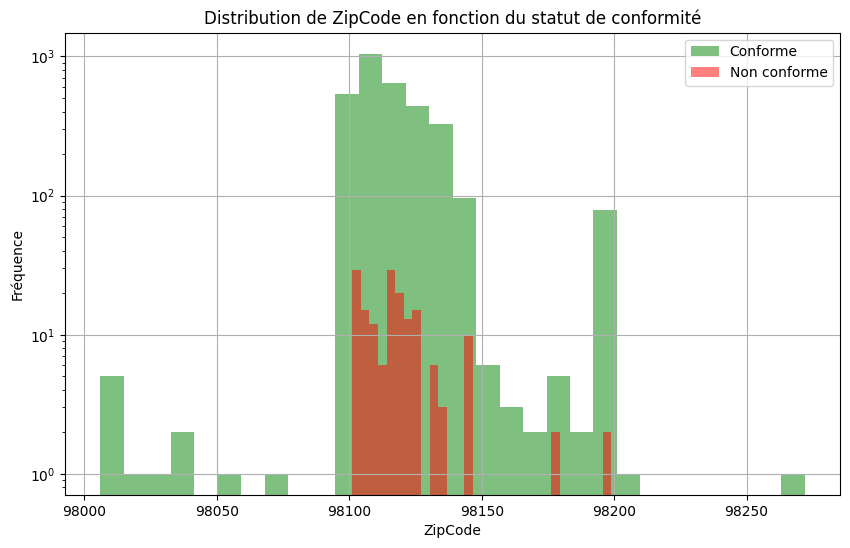

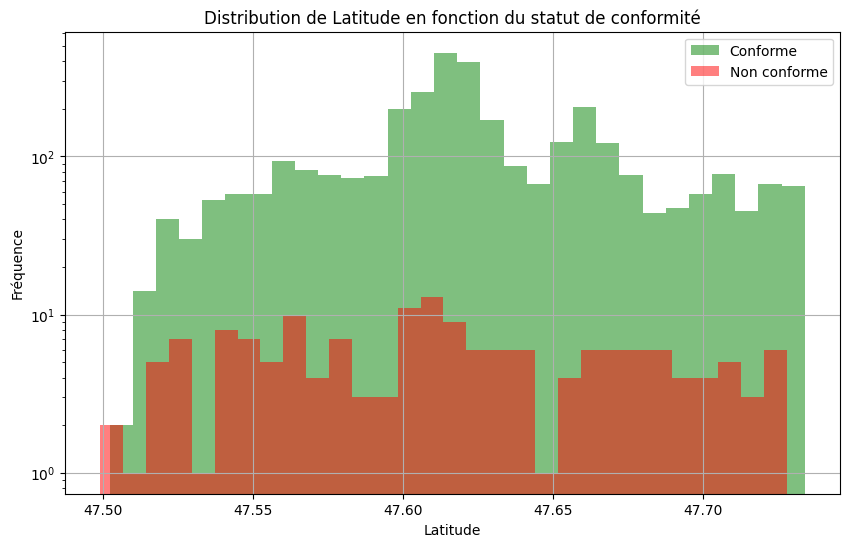

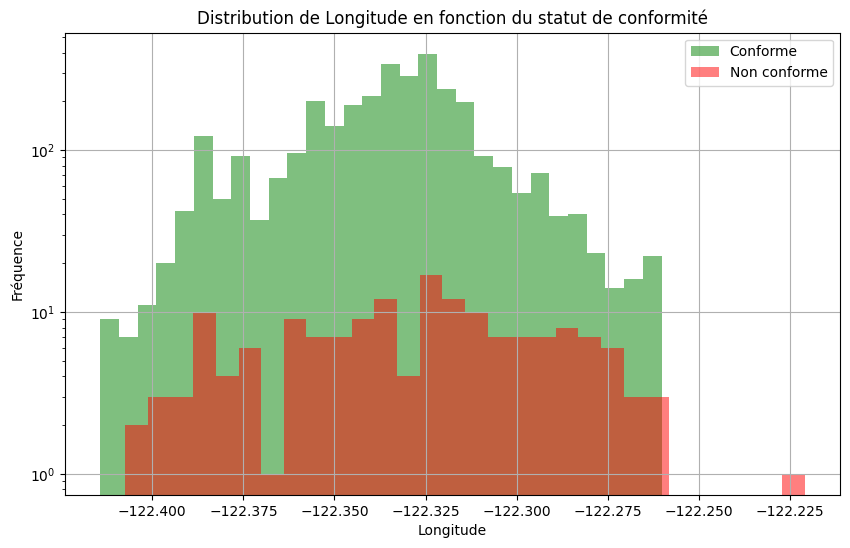

In [215]:
# Sélectionner les variables à analyser
variables = features_quantitatives_inutiles  

# Comparaison des distributions pour chaque variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Distribution pour les données conformes
    plt.hist(df[df['ComplianceStatus'] == 'Compliant'][variable], bins=30, color='green', alpha=0.5, label='Conforme')
    
    # Distribution pour les données non conformes
    plt.hist(df[df['ComplianceStatus'] != 'Compliant'][variable], bins=30, color='red', alpha=0.5, label='Non conforme')
    
    plt.title(f'Distribution de {variable} en fonction du statut de conformité')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()



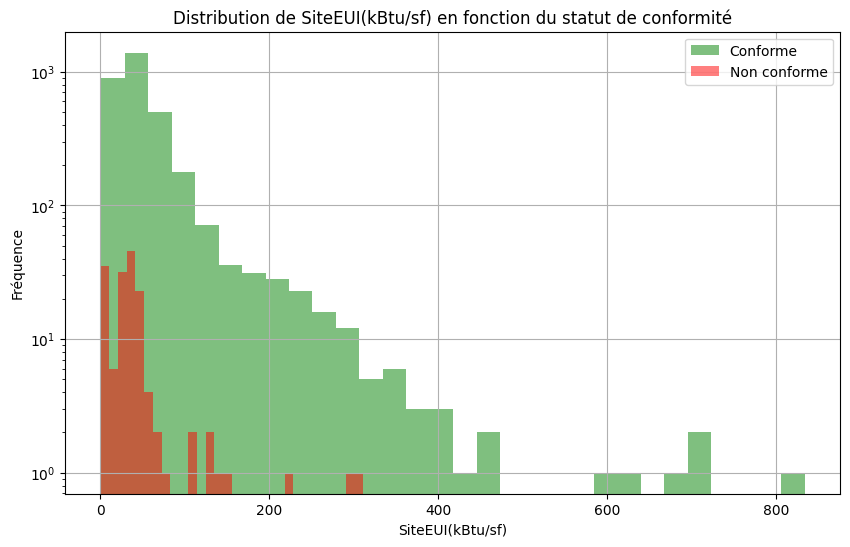

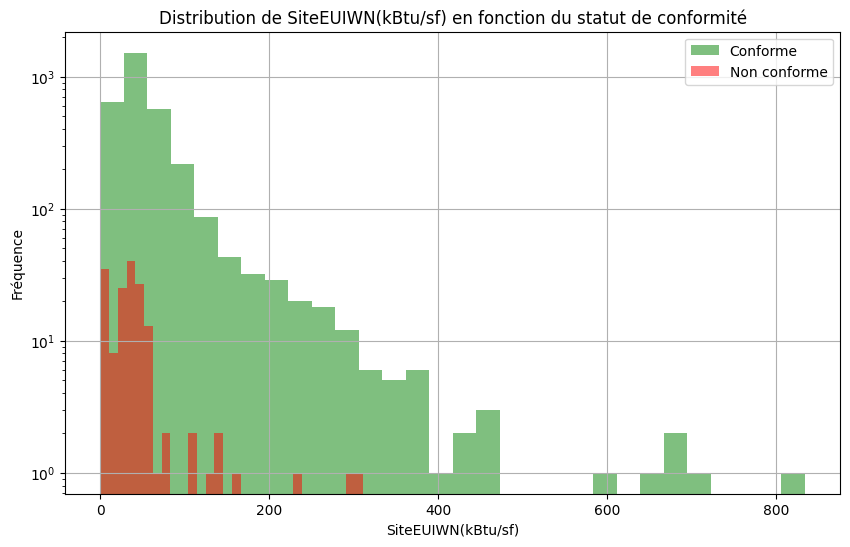

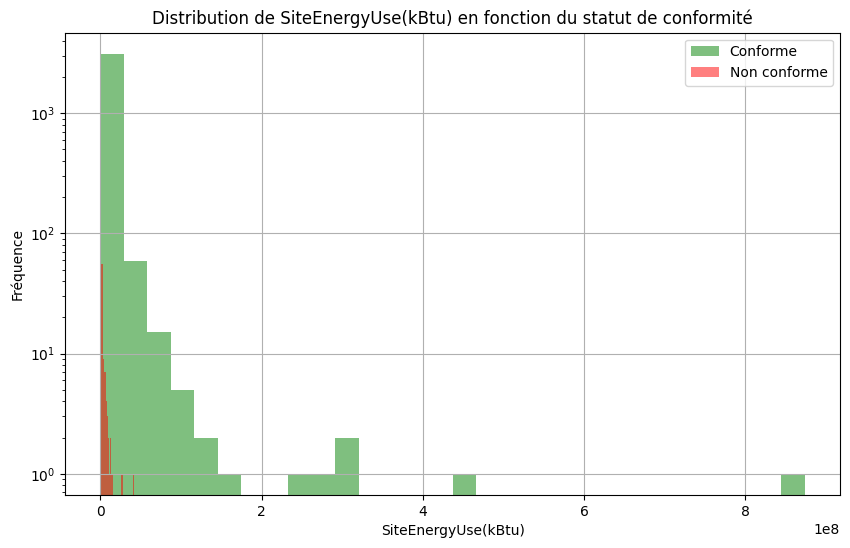

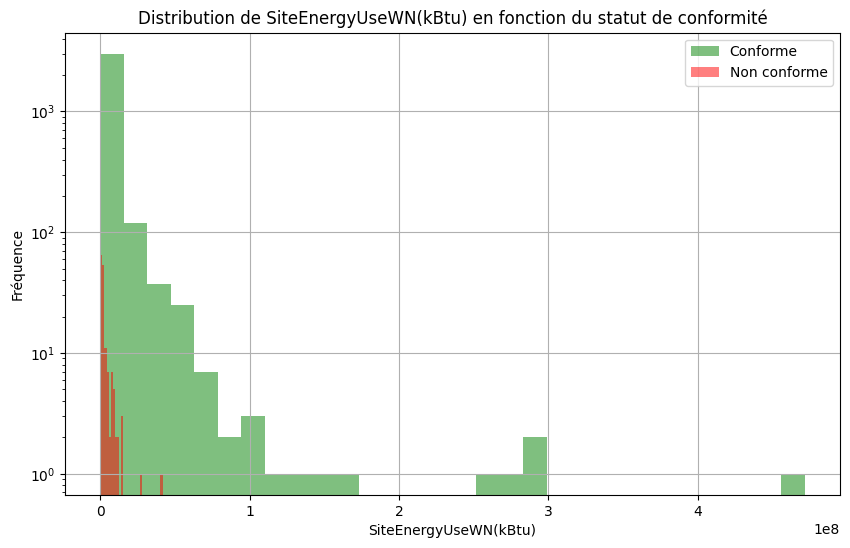

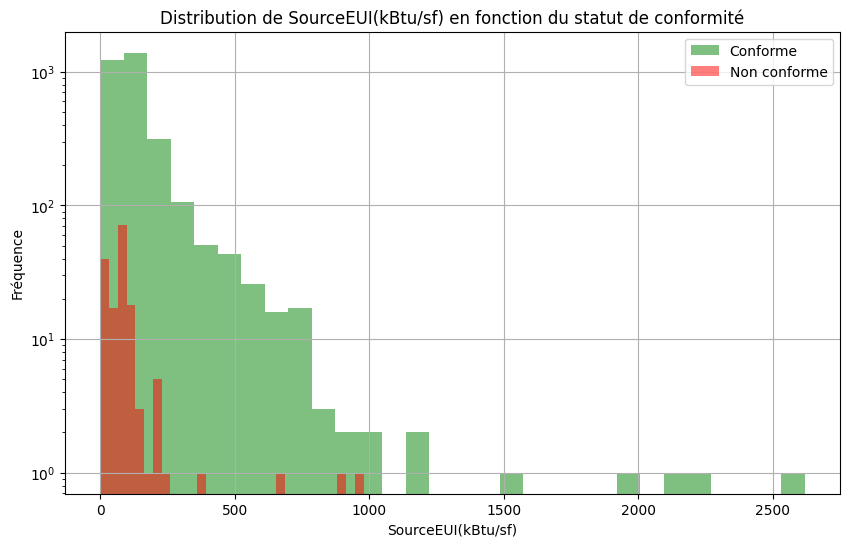

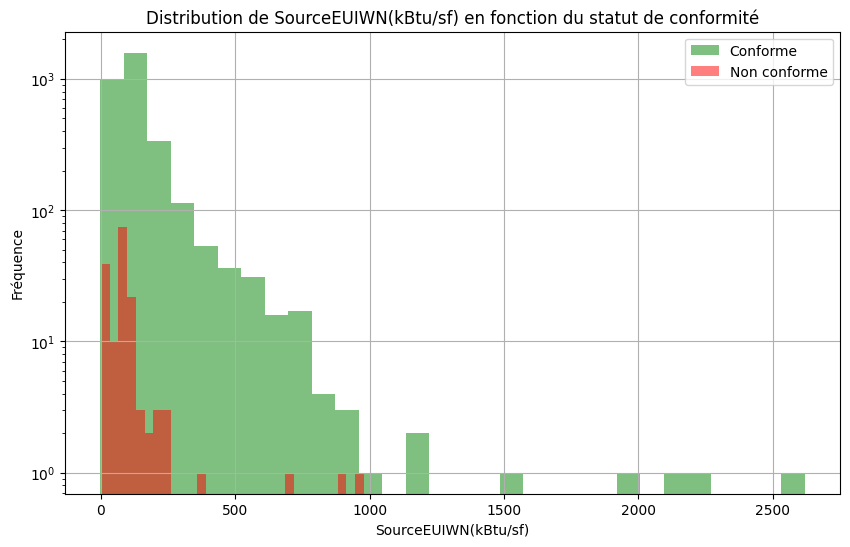

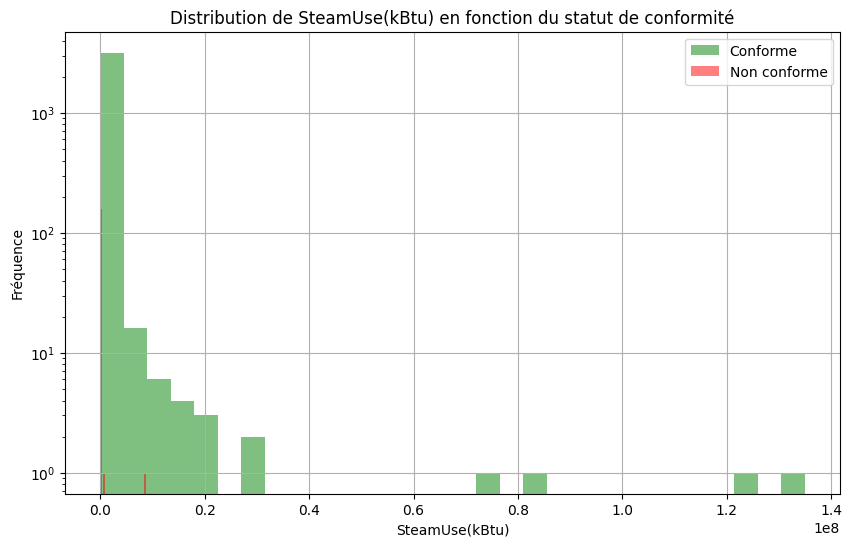

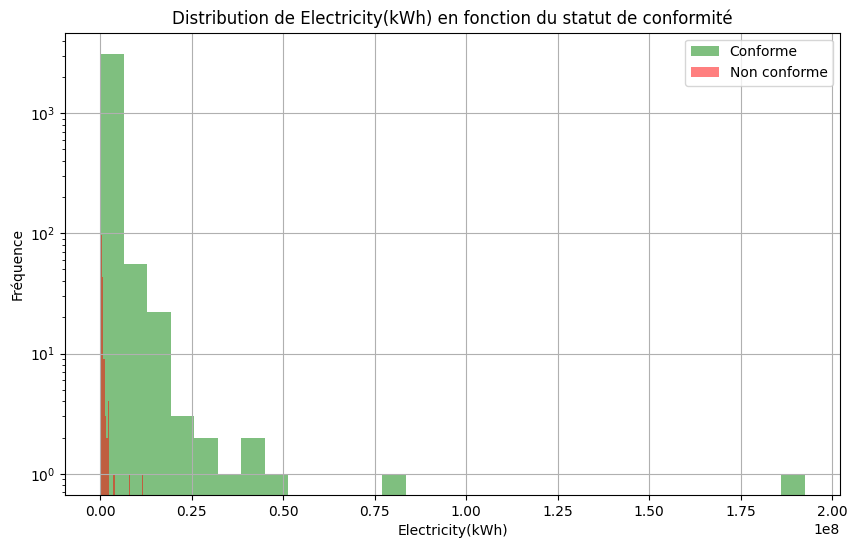

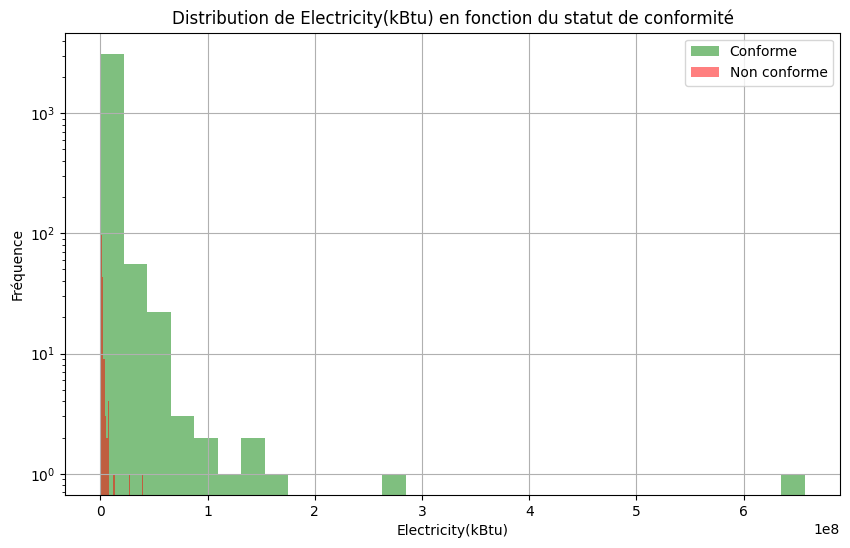

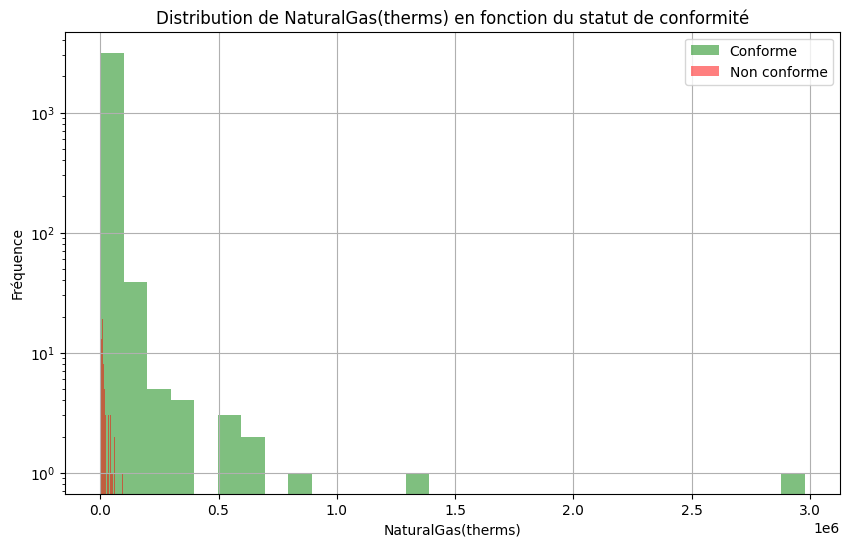

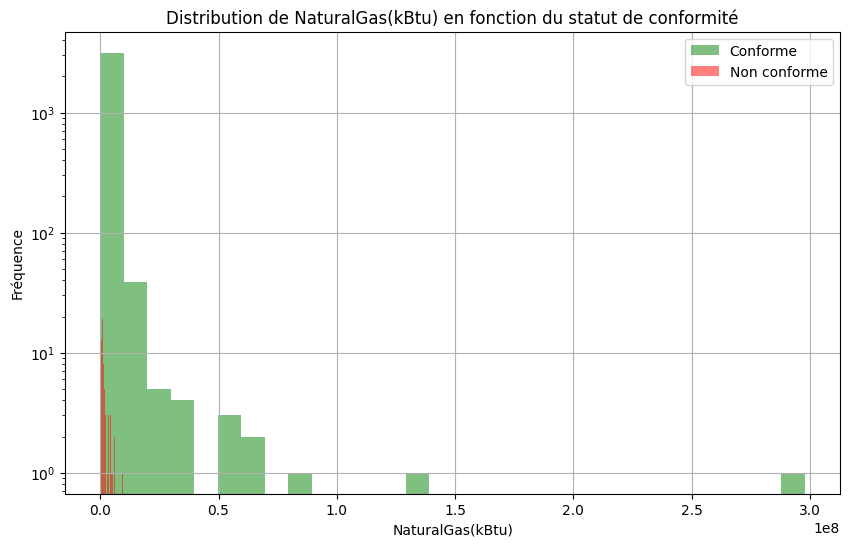

In [216]:
# Sélectionner les variables à analyser
variables = features_energy_usage  

# Comparaison des distributions pour chaque variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Distribution pour les données conformes
    plt.hist(df[df['ComplianceStatus'] == 'Compliant'][variable], bins=30, color='green', alpha=0.5, label='Conforme')
    
    # Distribution pour les données non conformes
    plt.hist(df[df['ComplianceStatus'] != 'Compliant'][variable], bins=30, color='red', alpha=0.5, label='Non conforme')
    
    plt.title(f'Distribution de {variable} en fonction du statut de conformité')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()



### Analyse de la conformité au fil du temps

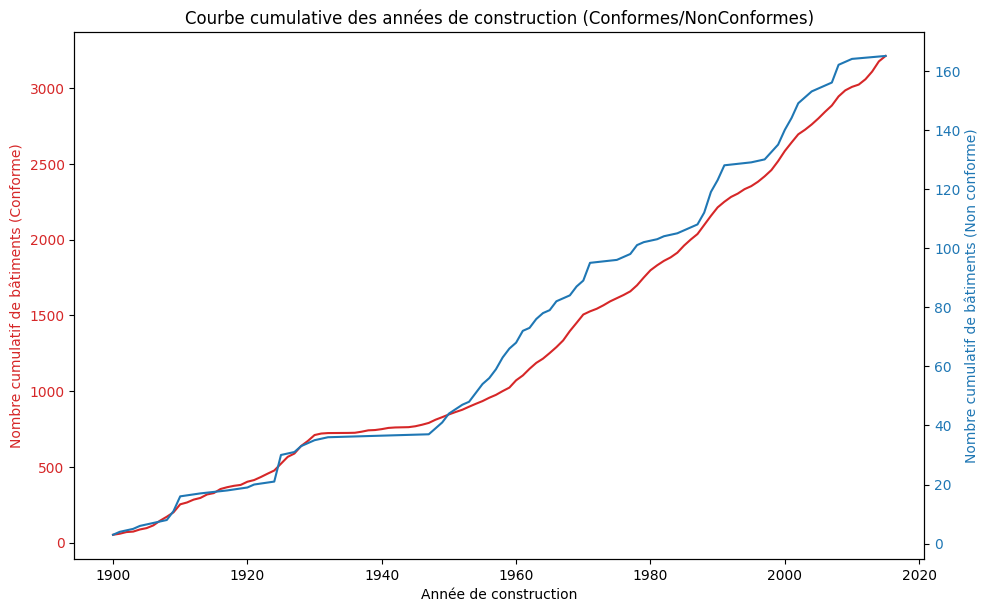

In [217]:

# Sélectionner les données pour les bâtiments conformes et non conformes
df_compliant = df[df['ComplianceStatus'] == 'Compliant']
df_non_compliant = df[df['ComplianceStatus'] != 'Compliant']

# Calculer les occurrences cumulatives pour les bâtiments conformes et non conformes
cumulative_compliant = df_compliant['YearBuilt'].value_counts().sort_index().cumsum()
cumulative_non_compliant = df_non_compliant['YearBuilt'].value_counts().sort_index().cumsum()

# Tracer la courbe cumulative des années de construction avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer la courbe pour les bâtiments conformes sur l'axe y1
color = 'tab:red'
ax1.set_xlabel('Année de construction')
ax1.set_ylabel('Nombre cumulatif de bâtiments (Conforme)', color=color)
ax1.plot(cumulative_compliant.index, cumulative_compliant.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Créer un deuxième axe y pour les bâtiments non conformes
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Nombre cumulatif de bâtiments (Non conforme)', color=color)
ax2.plot(cumulative_non_compliant.index, cumulative_non_compliant.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Courbe cumulative des années de construction (Conformes/NonConformes)')
plt.show()

## Analyse de l'impact de Outlier

In [218]:
df['Outlier'].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

Il y a très peu d'individus marqués comme Outlier.

In [219]:
df[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity']]

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0              12             88434   
1          1996                1.0              11            103566   
2          1969                1.0              41            956110   
3          1926                1.0              10             61320   
4          1980                1.0              18            175580   
...         ...                ...             ...               ...   
3371       1990                1.0               1             12294   
3372       2004                1.0               1             16000   
3373       1974                1.0               1             13157   
3374       1989                1.0               1             14101   
3375       1938                1.0               1             18258   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                      0                   88434                    88434.0   
1                  15064                   88502                    83880.0   
2                 196718                  759392                   756493.0   
3                      0                   61320                    61320.0   
4                  62000                  113580                   123445.0   
...                  ...                     ...                        ...   
3371                   0                   12294                    12294.0   
3372                   0                   16000                    16000.0   
3373                   0                   13157                     7583.0   
3374                   0                   14101                     6601.0   
3375                   0                   18258                     8271.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                                 NaN                             NaN   
1                             15064.0                          4622.0   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                             68009.0                             0.0   
...                               ...                             ...   
3371                              NaN                             NaN   
3372                              NaN                             NaN   
3373                           5574.0                             0.0   
3374                           6501.0                           484.0   
3375                           8000.0                          1108.0   

     YearsENERGYSTARCertified  ...  SiteEnergyUse(kBtu)  \
0                         NaN  ...         7.226362e+06   
1                         NaN  ...         8.387933e+06   
2                         NaN  ...         7.258702e+07   
3                         NaN  ...         6.794584e+06   
4                         NaN  ...         1.417261e+07   
...                       ...  ...                  ...   
3371                      NaN  ...         8.497457e+05   
3372                      NaN  ...         9.502762e+05   
3373                      NaN  ...         5.765898e+06   
3374                      NaN  ...         7.194712e+05   
3375                      NaN  ...         1.152896e+06   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
0              7.456910e+06      2003882.00      1.156514e+06   
1              8.664479e+06            0.00      9.504252e+05   
2              7.393711e+07     21566554.00      1.451544e+07   
3              6.946800e+06      2214446.25      8.115253e+05   
4              1.465650e+07            0.00      1.573449e+06   
...                     ...             ...               ...   
3371           9.430032e+05            0.00      1.536550e+05   
3372           1.053706e+06            0.00      1.162210e+05   
3373           6.0537

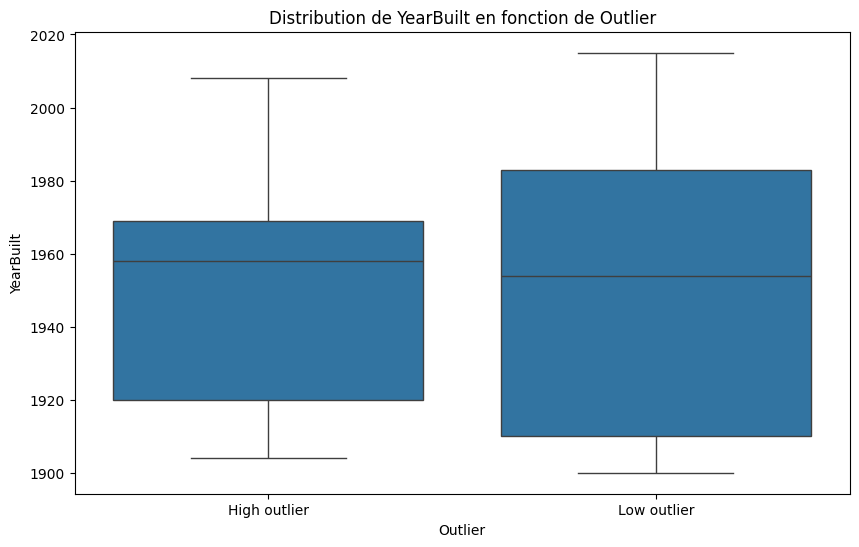

In [220]:
# Visualisation de la distribution de YearBuilt en fonction de Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlier', y='YearBuilt', data=df)
plt.xlabel('Outlier')
plt.ylabel('YearBuilt')
plt.title('Distribution de YearBuilt en fonction de Outlier')
plt.show()


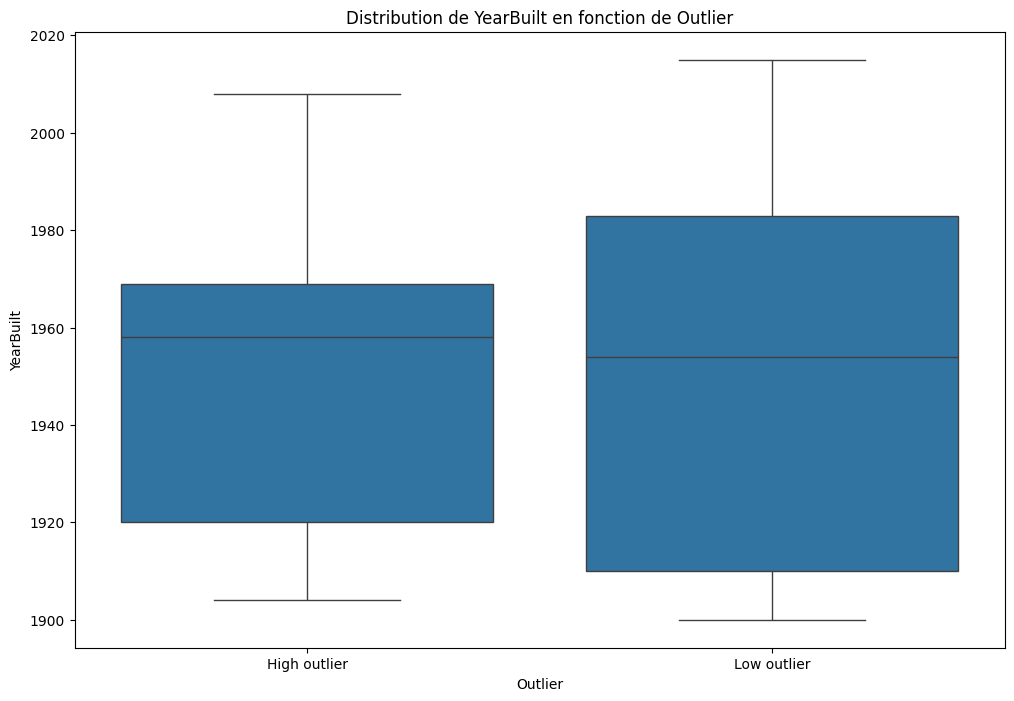

In [221]:

# Supprimer les lignes avec des valeurs NaN dans la fonctionnalité 'Outlier'
df_cleaned = df.dropna(subset=['Outlier'])

# Créer trois boxplots pour chaque modalité de 'Outlier'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlier', y='YearBuilt', data=df_cleaned)
plt.xlabel('Outlier')
plt.ylabel('YearBuilt')
plt.title('Distribution de YearBuilt en fonction de Outlier')
plt.show()



<Figure size 1200x800 with 0 Axes>

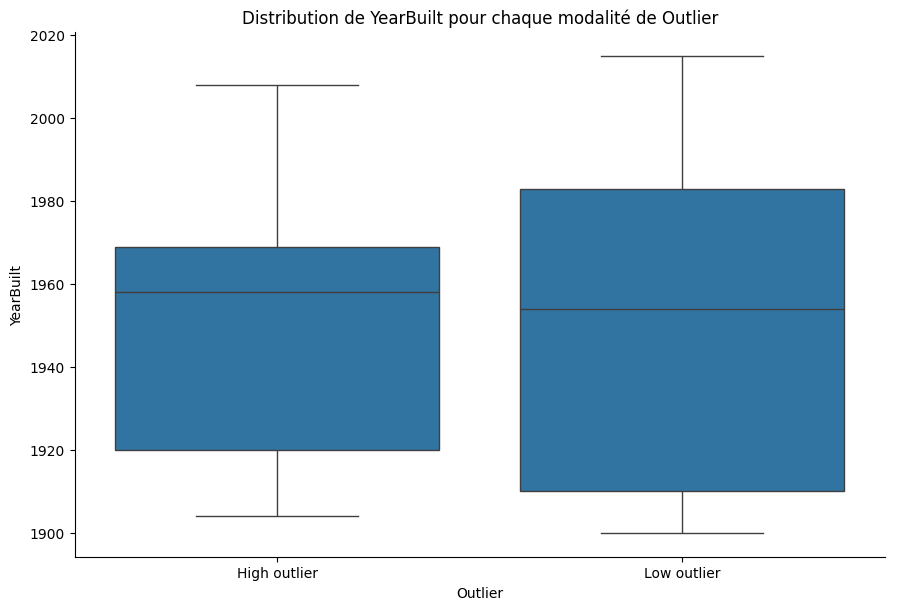

In [222]:

# Créer les trois boxplots pour chaque modalité de 'Outlier'
plt.figure(figsize=(12, 8))
sns.catplot(x='Outlier', y='YearBuilt', kind='box', data=df, height=6, aspect=1.5)
plt.xlabel('Outlier')
plt.ylabel('YearBuilt')
plt.title('Distribution de YearBuilt pour chaque modalité de Outlier')
plt.show()



# Preparation du dataframe pour ML

In [223]:
df

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
3371          50222  Nonresidential COS              Office   
3372          50223  Nonresidential COS               Other   
3373          50224  Nonresidential COS               Other   
3374          50225  Nonresidential COS  Mixed Use Property   
3375          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
3371                    1624049080                    2   
3372                    3558300000                    2   
3373                    1794501150                    7   
3374                    7883603155                    1   
3375                    7857002030                    2   

               Neighborhood  Latitude  ...  SteamUse(kBtu)  Electricity(kWh)  \
0                  DOWNTOWN  47.61220  ...      2003882.00      1.156514e+06   
1                  DOWNTOWN  47.61317  ...            0.00      9.504252e+05   
2                  DOWNTOWN  47.61393  ...     21566554.00      1.451544e+07   
3                  DOWNTOWN  47.61412  ...      2214446.25      8.115253e+05   
4                  DOWNTOWN  47.61375  ...            0.00      1.573449e+06   
...                     ...       ...  ...             ...               ...   
3371       GREATER DUWAMISH  47.56722  ...            0.00      1.536550e+05   
3372               DOWNTOWN  47.59625  ...            0.00      1.162210e+05   
3373  MAGNOLIA / QUEEN ANNE  47.63644  ...            0.00      5.252517e+05   
3374       GREATER DUWAMISH  47.52832  ...            0.00      1.022480e+05   
3375       GREATER DUWAMISH  47.53939  ...            0.00      1.267744e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0          3.946027e+06        12764.529300      1.276453e+06        False   
1          3.242851e+06        51450.816410      5.145082e+06        False   
2          4.952666e+07        14938.000000      1.493800e+06        False   
3          2.768924e+06        18112.130860      1.811213e+06        False   
4          5.368607e+06        88039.984380      8.803998e+06        False   
...                 ...                 ...               ...          ...   
3371       5.242709e+05         3254.750244      3.254750e+05         True   
3372       3.965461e+05         5537.299805      5.537300e+05        False   
3373       1

In [224]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsInte

In [225]:

# Filtrer les valeurs non nulles de la colonne
colonnes_non_nulles = df['ListOfAllPropertyUseTypes'].dropna()

# Fonction pour compter le nombre de mots dans une chaîne de caractères
def compter_mots(chaine):
    return len(chaine.split(','))

# Appliquer la fonction à chaque élément de la colonne non nulle et créer une série pandas
serie_nb_mots = colonnes_non_nulles.apply(compter_mots)

# Afficher la série pandas
print(serie_nb_mots)


0       1
1       3
2       1
3       1
4       3
       ..
3371    1
3372    1
3373    3
3374    5
3375    5
Name: ListOfAllPropertyUseTypes, Length: 3367, dtype: int64


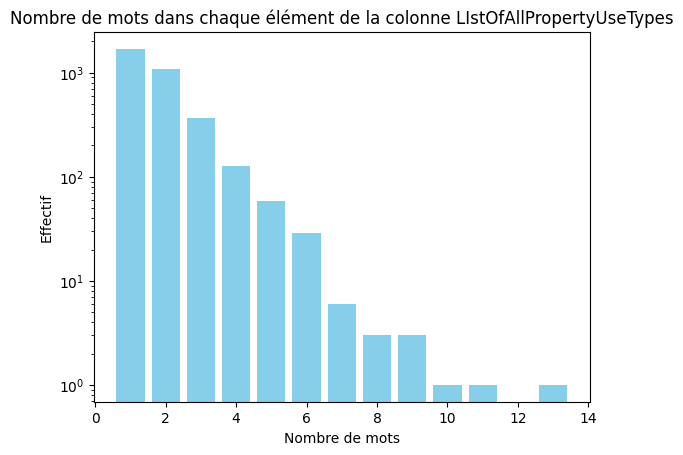

In [226]:

# Obtenir les valeurs et leurs effectifs
valeurs = serie_nb_mots.value_counts().index
effectifs = serie_nb_mots.value_counts().values

# Créer le graphique
plt.bar(valeurs, effectifs, color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Nombre de mots')
plt.ylabel('Effectif')
plt.title('Nombre de mots dans chaque élément de la colonne LIstOfAllPropertyUseTypes')

# Utiliser une échelle logarithmique sur l'axe des ordonnées
plt.yscale('log')

# Afficher le graphique
plt.show()


On songe à ne conserver que les individus qui possèdent 3 types d'usages ou moins

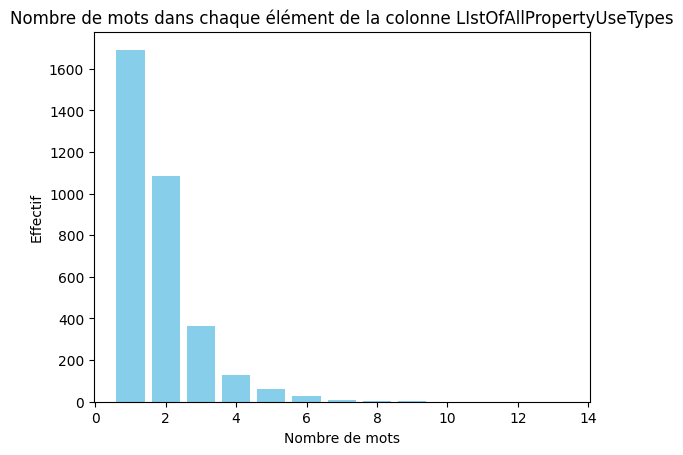

In [227]:

# Obtenir les valeurs et leurs effectifs
valeurs = serie_nb_mots.value_counts().index
effectifs = serie_nb_mots.value_counts().values

# Créer le graphique
plt.bar(valeurs, effectifs, color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Nombre de mots')
plt.ylabel('Effectif')
plt.title('Nombre de mots dans chaque élément de la colonne LIstOfAllPropertyUseTypes')


# Afficher le graphique
plt.show()


In [228]:
pourcentage = round(((serie_nb_mots <= 3).sum())/len(serie_nb_mots)*100)
print(f"Il y a {pourcentage} % de propriétés qui sont utilisés pour 3 usages ou moins ")

Il y a 93 % de propriétés qui sont utilisés pour 3 usages ou moins 


In [229]:
df[df['ListOfAllPropertyUseTypes'].isna()]

OSEBuildingID          BuildingType          PrimaryPropertyType  \
578             773        NonResidential  Small- and Mid-Sized Office   
758           19798  Multifamily LR (1-4)         Low-Rise Multifamily   
1768          23355  Multifamily LR (1-4)         Low-Rise Multifamily   
1792          23437  Multifamily LR (1-4)         Low-Rise Multifamily   
2321          25431  Multifamily LR (1-4)         Low-Rise Multifamily   
2474          25752  Multifamily LR (1-4)         Low-Rise Multifamily   
2480          25763  Multifamily LR (1-4)         Low-Rise Multifamily   
2670          26532        NonResidential           Mixed Use Property   
3348          50082  Multifamily LR (1-4)         Low-Rise Multifamily   

             PropertyName                 Address  ZipCode  \
578      SEATTLE BUILDING         215 COLUMBIA ST  98104.0   
758        SANDHURST APTS  7239 SAND POINT WAY NE  98115.0   
1768          GRAHAM VIEW  6040 CALIFORNIA AVE SW  98136.0   
1792     MERCER CREST APT         500 W MERCER ST  98119.0   
2321        PONDERAY APTS        5625 15TH AVE NE  98105.0   
2474  GRANVIEW APARTMENTS          1120 N 93RD ST  98103.0   
2480         Villa Andora  1520 CALIFORNIA AVE SW  98116.0   
2670     KALBERG BUILDING  4515 UNIVERSITY WAY NE  98105.0   
3348       STREAM FIFTEEN          605 15TH AVE E  98112.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
578                     0939000245                    7   
758                     0225049032                    4   
1768                    7625703280                    1   
1792                    3876900230                    7   
2321                    5226300030                    4   
2474                    9267200155                    6   
2480                    9272201340                    1   
2670                    8816401120                    4   
3348                    3303700030                    3   

               Neighborhood  Latitude  ...  SteamUse(kBtu)  Electricity(kWh)  \
578                DOWNTOWN  47.60380  ...             NaN               NaN   
758               NORTHEAST  47.68149  ...             NaN               NaN   
1768              SOUTHWEST  47.54731  ...             NaN               NaN   
1792  MAGNOLIA / QUEEN ANNE  47.62479  ...             NaN               NaN   
2321              NORTHEAST  47.67025  ...             NaN               NaN   
2474              NORTHWEST  47.69658  ...             NaN               NaN   
2480              SOUTHWEST  47.58968  ...             NaN               NaN   
2670              NORTHEAST  47.66182  ...             NaN               NaN   
3348                   EAST  47.62441  ...             NaN               NaN   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
578                 NaN                 NaN               NaN        False   
758                 NaN                 NaN               NaN        False   
1768                NaN                 NaN               NaN        False   
1792                NaN                 NaN               NaN        False   
2321                NaN                 NaN               NaN        False   
2474                NaN                 NaN               NaN        False   
2480                NaN                 NaN               NaN        False   
2670                NaN                 NaN               NaN        False   
3348                NaN                 NaN               NaN        False   

      ComplianceStatus Outlier TotalGHGEmissions  GHGEmissionsIntensity  
578      Non-Compliant     NaN               NaN                    NaN  
758      Non-Compliant     NaN               NaN                    NaN  
1768         Compliant     NaN               NaN                    NaN  
1792     Non-Compliant     NaN               NaN                    NaN  
2321         Compliant     NaN               NaN                    NaN  
2474     Non-Compliant     

## Creation d'une copie du dataframe originel

In [230]:
df_travail = df.copy()

# Supprimer les lignes avec des valeurs absentes dans la colonne 'ListOfAllPropertyUseTypes'
df_travail = df_travail.dropna(subset=['ListOfAllPropertyUseTypes'])

In [231]:
# Fonction pour compter le nombre de mots dans une chaîne de caractères
def compter_mots(chaine):
    # Vérifier si la valeur est NaN, dans ce cas, retourner 0
    if pd.isna(chaine):
        return 0
    else:
        # Compter le nombre de mots en séparant la chaîne par des virgules
        return len(chaine.split(','))

# Appliquer la fonction à chaque élément de la colonne 'ListOfAllPropertyUseTypes' et créer une nouvelle colonne
df_travail['NombreDeUsages'] = df_travail['ListOfAllPropertyUseTypes'].apply(compter_mots)




In [232]:
df_travail

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
3371          50222  Nonresidential COS              Office   
3372          50223  Nonresidential COS               Other   
3373          50224  Nonresidential COS               Other   
3374          50225  Nonresidential COS  Mixed Use Property   
3375          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   
3374          South Park Community Center    8319 8th Ave S      NaN   
3375          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
3371                    1624049080                    2   
3372                    3558300000                    2   
3373                    1794501150                    7   
3374                    7883603155                    1   
3375                    7857002030                    2   

               Neighborhood  Latitude  ...  Electricity(kWh)  \
0                  DOWNTOWN  47.61220  ...      1.156514e+06   
1                  DOWNTOWN  47.61317  ...      9.504252e+05   
2                  DOWNTOWN  47.61393  ...      1.451544e+07   
3                  DOWNTOWN  47.61412  ...      8.115253e+05   
4                  DOWNTOWN  47.61375  ...      1.573449e+06   
...                     ...       ...  ...               ...   
3371       GREATER DUWAMISH  47.56722  ...      1.536550e+05   
3372               DOWNTOWN  47.59625  ...      1.162210e+05   
3373  MAGNOLIA / QUEEN ANNE  47.63644  ...      5.252517e+05   
3374       GREATER DUWAMISH  47.52832  ...      1.022480e+05   
3375       GREATER DUWAMISH  47.53939  ...      1.267744e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0          3.946027e+06        12764.529300      1.276453e+06        False   
1          3.242851e+06        51450.816410      5.145082e+06        False   
2          4.952666e+07        14938.000000      1.493800e+06        False   
3          2.768924e+06        18112.130860      1.811213e+06        False   
4          5.368607e+06        88039.984380      8.803998e+06        False   
...                 ...                 ...               ...          ...   
3371       5.242709e+05         3254.750244      3.254750e+05         True   
3372       3.965461e+05         5537.299805      5.537300e+05        False   
3373       1.792159e+06        39737.390630      3.973739e+06        False   
3374       3.488702e+05         3706.010010      3.706010e+05        False   
3375       4.325542e+05         7203.419922     

In [233]:
df_travail[['ListOfAllPropertyUseTypes', 'NombreDeUsages']]

ListOfAllPropertyUseTypes  NombreDeUsages
0                                                 Hotel               1
1                            Hotel, Parking, Restaurant               3
2                                                 Hotel               1
3                                                 Hotel               1
4                         Hotel, Parking, Swimming Pool               3
...                                                 ...             ...
3371                                             Office               1
3372                                 Other - Recreation               1
3373  Fitness Center/Health Club/Gym, Other - Recrea...               3
3374  Fitness Center/Health Club/Gym, Food Service, ...               5
3375  Fitness Center/Health Club/Gym, Food Service, ...               5

[3367 rows x 2 columns]

In [234]:
# Supprimer les individus où la valeur dans 'NombreDeUsages' est strictement supérieure à 4
df_travail = df_travail[df_travail['NombreDeUsages'] <= 4]

In [235]:
df_travail

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
3369          50220  Nonresidential COS              Office   
3370          50221  Nonresidential COS               Other   
3371          50222  Nonresidential COS              Office   
3372          50223  Nonresidential COS               Other   
3373          50224  Nonresidential COS               Other   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3369                     Genesee/SC SE HQ    4420 S Genesee      NaN   
3370          High Point Community Center  6920 34th Ave SW      NaN   
3371                Horticulture building  1600 S Dakota St      NaN   
3372  International district/Chinatown CC     719 8th Ave S      NaN   
3373                      Queen Anne Pool    1920 1st Ave W      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
3369                    4154300585                    2   
3370                    2524039059                    1   
3371                    1624049080                    2   
3372                    3558300000                    2   
3373                    1794501150                    7   

                Neighborhood  Latitude  ...  Electricity(kWh)  \
0                   DOWNTOWN  47.61220  ...      1.156514e+06   
1                   DOWNTOWN  47.61317  ...      9.504252e+05   
2                   DOWNTOWN  47.61393  ...      1.451544e+07   
3                   DOWNTOWN  47.61412  ...      8.115253e+05   
4                   DOWNTOWN  47.61375  ...      1.573449e+06   
...                      ...       ...  ...               ...   
3369               SOUTHEAST  47.56440  ...      8.134140e+04   
3370  DELRIDGE NEIGHBORHOODS  47.54067  ...      1.853347e+05   
3371        GREATER DUWAMISH  47.56722  ...      1.536550e+05   
3372                DOWNTOWN  47.59625  ...      1.162210e+05   
3373   MAGNOLIA / QUEEN ANNE  47.63644  ...      5.252517e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0          3.946027e+06        12764.529300      1.276453e+06        False   
1          3.242851e+06        51450.816410      5.145082e+06        False   
2          4.952666e+07        14938.000000      1.493800e+06        False   
3          2.768924e+06        18112.130860      1.811213e+06        False   
4          5.368607e+06        88039.984380      8.803998e+06        False   
...                 ...                 ...               ...          ...   
3369       2.775369e+05         1102.729980      1.102730e+05         True   
3370       6.323620e+05         2997.199951      2.997200e+05        False   
3371       5.242709e+05         3254.750244      3.254750e+05         True   
3372       3.965461e+05         5537.299805      5.537300e+05        False   
3373       1.792159e+06        39737

In [236]:
df_travail.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsInte

In [237]:
df_travail = df_travail[['OSEBuildingID', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'NombreDeUsages', 'SiteEnergyUse(kBtu)']].copy()

In [238]:
df_travail

OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
0                 1             88434                   0   
1                 2            103566               15064   
2                 3            956110              196718   
3                 5             61320                   0   
4                 8            175580               62000   
...             ...               ...                 ...   
3369          50220             15398                   0   
3370          50221             18261                   0   
3371          50222             12294                   0   
3372          50223             16000                   0   
3373          50224             13157                   0   

      PropertyGFABuilding(s)  \
0                      88434   
1                      88502   
2                     759392   
3                      61320   
4                     113580   
...                      ...   
3369                   15398   
3370                   18261   
3371                   12294   
3372                   16000   
3373                   13157   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3369                                             Office   
3370                                 Other - Recreation   
3371                                             Office   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3369                 Office                    15398.0   
3370     Other - Recreation                    18261.0   
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                                NaN                              NaN   
1                            Parking                          15064.0   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                            Parking                          68009.0   
...                              ...                              ...   
3369                             NaN                              NaN   
3370                             NaN                              NaN   
3371                             NaN                              NaN   
3372                             NaN                              NaN   
3373  Fitness Center/Health Club/Gym                           5574.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                            NaN                             NaN   
1                     Restaurant                          4622.0   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                  Swimming Pool                             0.0   
...                          ...                             ...   
3369                         NaN                             NaN   
3370                         NaN                             

In [239]:
df_travail['LargestPropertyUseType'].isna().sum()

10

In [240]:
# Remplacer les NaN dans la colonne par 0
df_travail['LargestPropertyUseTypeGFA'] = df_travail['LargestPropertyUseTypeGFA'].fillna(0)
df_travail['SecondLargestPropertyUseTypeGFA'] = df_travail['SecondLargestPropertyUseTypeGFA'].fillna(0)
df_travail['ThirdLargestPropertyUseTypeGFA'] = df_travail['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [241]:
(df_travail['LargestPropertyUseTypeGFA'] + df_travail['SecondLargestPropertyUseTypeGFA'] + df_travail['ThirdLargestPropertyUseTypeGFA'] - df_travail['PropertyGFATotal']).describe()

count      3264.000000
mean       -235.532569
std       38038.956483
min     -529052.000000
25%        -662.750000
50%           0.000000
75%           0.000000
max      635669.000000
dtype: float64

In [242]:
# Extraction de tous les usages possibles

feat1 = df_travail['LargestPropertyUseType'].value_counts().index
feat2 = df_travail['SecondLargestPropertyUseType'].value_counts().index
feat3 = df_travail['ThirdLargestPropertyUseType'].value_counts().index

liste_usages = []
for feat in feat1:
    liste_usages.append(feat)
for feat in feat2:
    liste_usages.append(feat)
for feat in feat3:
    liste_usages.append(feat)

# Utiliser un ensemble pour supprimer les doublons
liste_usages = list(set(liste_usages))

liste_usages

['Other - Lodging/Residential',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Hotel',
 'Automobile Dealership',
 'Residential Care Facility',
 'Other - Entertainment/Public Assembly',
 'Retail Store',
 'Strip Mall',
 'Medical Office',
 'Wholesale Club/Supercenter',
 'Other - Services',
 'Laboratory',
 'Convention Center',
 'Other - Technology/Science',
 'Supermarket/Grocery Store',
 'Movie Theater',
 'Prison/Incarceration',
 'Social/Meeting Hall',
 'Non-Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Multifamily Housing',
 'Senior Care Community',
 'Self-Storage Facility',
 'Museum',
 'Other - Public Services',
 'Other/Specialty Hospital',
 'Performing Arts',
 'Other - Education',
 'Manufacturing/Industrial Plant',
 'Bank Branch',
 'Vocational School',
 'Parking',
 'Distribution Center',
 'Restaurant',
 'College/University',
 'Other - Restaurant/Bar',
 'Other',
 'Enclosed Mall',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Bar/Nightclub',
 'Other - Mall',


In [243]:
len(liste_usages)

64

## Feature engineering, categorisation des usages

In [244]:
categorie_usage = {
    # Catégorie commerciale
    'Movie Theater': 'Commercial',
    'Automobile Dealership': 'Commercial',
    'Lifestyle Center': 'Commercial',
    'Restaurant': 'Commercial',
    'Retail Store': 'Commercial',
    'Data Center': 'Commercial',
    'Library': 'Commercial',
    'Food Sales': 'Commercial',
    'Convenience Store without Gas Station': 'Commercial',
    'Wholesale Club/Supercenter': 'Commercial',
    'Other - Entertainment/Public Assembly': 'Commercial',
    'Bank Branch': 'Commercial',
    'Food Service': 'Commercial',
    'Other - Technology/Science': 'Commercial',
    'Other - Mall': 'Commercial',
    'Financial Office': 'Commercial',
    'Hotel': 'Commercial',
    'Strip Mall': 'Commercial',
    'Convention Center': 'Commercial',
    'Office': 'Commercial',
    'Other - Restaurant/Bar': 'Commercial',
    'Supermarket/Grocery Store': 'Commercial',
    'Enclosed Mall': 'Commercial',
    'Fast Food Restaurant': 'Commercial',

    # Catégorie éducation
    'College/University': 'Education',
    'Adult Education': 'Education',
    'Other - Education': 'Education',
    'Vocational School': 'Education',
    'K-12 School': 'Education',

    # Catégorie gouvernement
    'Fire Station': 'Government',
    'Courthouse': 'Government',
    'Prison/Incarceration': 'Government',
    'Police Station': 'Government',
    'Other - Public Services': 'Government',

    # Catégorie santé
    'Other/Specialty Hospital': 'Healthcare',
    'Hospital (General Medical & Surgical)': 'Healthcare',
    'Urgent Care/Clinic/Other Outpatient': 'Healthcare',
    'Laboratory': 'Healthcare',
    'Medical Office': 'Healthcare',

    # Catégorie industriel
    'Non-Refrigerated Warehouse': 'Industrial',
    'Manufacturing/Industrial Plant': 'Industrial',
    'Distribution Center': 'Industrial',
    'Refrigerated Warehouse': 'Industrial',
    'Self-Storage Facility': 'Industrial',

    # Autres catégories
    'Pre-school/Daycare': 'Other',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Other',
    'Other - Services': 'Other',
    'Worship Facility': 'Other',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Other',
    'Other': 'Other',
    'Museum': 'Other',
    'Social/Meeting Hall': 'Other',
    'Performing Arts': 'Other',
    'Bar/Nightclub': 'Other',
    'Other - Utility': 'Other',

    # Parkings    
    'Parking': 'Parking',

    # Catégorie loisirs
    'Swimming Pool': 'Recreation',
    'Fitness Center/Health Club/Gym': 'Recreation',
    'Other - Recreation': 'Recreation',

    # Catégorie résidentielle
    'Residence Hall/Dormitory': 'Residential',
    'Other - Lodging/Residential': 'Residential',
    'Multifamily Housing': 'Residential',
    'Senior Care Community': 'Residential',
    'Residential Care Facility': 'Residential'
}


In [245]:
df_travail

OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
0                 1             88434                   0   
1                 2            103566               15064   
2                 3            956110              196718   
3                 5             61320                   0   
4                 8            175580               62000   
...             ...               ...                 ...   
3369          50220             15398                   0   
3370          50221             18261                   0   
3371          50222             12294                   0   
3372          50223             16000                   0   
3373          50224             13157                   0   

      PropertyGFABuilding(s)  \
0                      88434   
1                      88502   
2                     759392   
3                      61320   
4                     113580   
...                      ...   
3369                   15398   
3370                   18261   
3371                   12294   
3372                   16000   
3373                   13157   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3369                                             Office   
3370                                 Other - Recreation   
3371                                             Office   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   756493.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
3369                 Office                    15398.0   
3370     Other - Recreation                    18261.0   
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                                NaN                              0.0   
1                            Parking                          15064.0   
2                                NaN                              0.0   
3                                NaN                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
3369                             NaN                              0.0   
3370                             NaN                              0.0   
3371                             NaN                              0.0   
3372                             NaN                              0.0   
3373  Fitness Center/Health Club/Gym                           5574.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                            NaN                             0.0   
1                     Restaurant                          4622.0   
2                            NaN                             0.0   
3                            NaN                             0.0   
4                  Swimming Pool                             0.0   
...                          ...                             ...   
3369                         NaN                             0.0   
3370                         NaN                             

In [246]:
# Créer une fonction de mapping pour appliquer la catégorisation
def map_categorie(usage):
    return categorie_usage.get(usage, 'Autres') if pd.notnull(usage) else np.nan  

# Appliquer la fonction de mapping aux trois colonnes
df_travail['LargestPropertyUseType'] = df_travail['LargestPropertyUseType'].map(map_categorie)
df_travail['SecondLargestPropertyUseType'] = df_travail['SecondLargestPropertyUseType'].map(map_categorie)
df_travail['ThirdLargestPropertyUseType'] = df_travail['ThirdLargestPropertyUseType'].map(map_categorie)

In [247]:
df_travail.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'NombreDeUsages', 'SiteEnergyUse(kBtu)'],
      dtype='object')

In [248]:
df_travail.drop(['ListOfAllPropertyUseTypes'], axis=1, inplace=True)


In [249]:

# Liste des catégories de propriété
categories = ['Commercial', 'Education', 'Government', 'Healthcare', 'Industrial', 'Other', 'Parking', 'Residential']

# Création des nouvelles fonctionnalités pour chaque catégorie
for category in categories:
    df_travail[category + '_GFA'] = 0

# Calcul des sommes pour chaque catégorie
for index, row in df_travail.iterrows():
    for category in categories:
        total_gfa = (
            row['LargestPropertyUseTypeGFA'] if row['LargestPropertyUseType'] == category else 0
        ) + (
            row['SecondLargestPropertyUseTypeGFA'] if row['SecondLargestPropertyUseType'] == category else 0
        ) + (
            row['ThirdLargestPropertyUseTypeGFA'] if row['ThirdLargestPropertyUseType'] == category else 0
        )
        df_travail.at[index, category + '_GFA'] = int(total_gfa)

df_travail

OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
0                 1             88434                   0   
1                 2            103566               15064   
2                 3            956110              196718   
3                 5             61320                   0   
4                 8            175580               62000   
...             ...               ...                 ...   
3369          50220             15398                   0   
3370          50221             18261                   0   
3371          50222             12294                   0   
3372          50223             16000                   0   
3373          50224             13157                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434             Commercial   
1                      88502             Commercial   
2                     759392             Commercial   
3                      61320             Commercial   
4                     113580             Commercial   
...                      ...                    ...   
3369                   15398             Commercial   
3370                   18261             Recreation   
3371                   12294             Commercial   
3372                   16000             Recreation   
3373                   13157             Recreation   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                       88434.0                          NaN   
1                       83880.0                      Parking   
2                      756493.0                          NaN   
3                       61320.0                          NaN   
4                      123445.0                      Parking   
...                         ...                          ...   
3369                    15398.0                          NaN   
3370                    18261.0                          NaN   
3371                    12294.0                          NaN   
3372                    16000.0                          NaN   
3373                     7583.0                   Recreation   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                                 0.0                         NaN   
1                             15064.0                  Commercial   
2                                 0.0                         NaN   
3                                 0.0                         NaN   
4                             68009.0                  Recreation   
...                               ...                         ...   
3369                              0.0                         NaN   
3370                              0.0                         NaN   
3371                              0.0                         NaN   
3372                              0.0                         NaN   
3373                           5574.0                  Recreation   

      ThirdLargestPropertyUseTypeGFA  NombreDeUsages  SiteEnergyUse(kBtu)  \
0                                0.0               1         7.226362e+06   
1                             4622.0               3         8.387933e+06   
2                                0.0               1         7.258702e+07   
3                                0.0               1         6.794584e+06   
4                                0.0               3         1.417261e+07   
...                              ...             ...                  ...   
3369                             0.0               1         3.878100e+05   
3370                             0.0               1         9.320821e+05   
3371                             0.0               1         8.497457e+05   
3372                             0.0               1         9.502762e+05   
3373                             0.0               3         5.765898e+06   

      Commercial_GFA  Education_GFA  Government_GFA  Healthcare_GFA  \
0              884

In [250]:
df_travail.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'NombreDeUsages',
       'SiteEnergyUse(kBtu)', 'Commercial_GFA', 'Education_GFA',
       'Government_GFA', 'Healthcare_GFA', 'Industrial_GFA', 'Other_GFA',
       'Parking_GFA', 'Residential_GFA'],
      dtype='object')

In [251]:
columns_to_drop = ['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                   'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
                   'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 
                   'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 
                   'NombreDeUsages']

df_travail.drop(columns=columns_to_drop, inplace=True)

In [252]:
df_travail.columns

Index(['OSEBuildingID', 'SiteEnergyUse(kBtu)', 'Commercial_GFA',
       'Education_GFA', 'Government_GFA', 'Healthcare_GFA', 'Industrial_GFA',
       'Other_GFA', 'Parking_GFA', 'Residential_GFA'],
      dtype='object')

In [253]:
# Somme des valeurs de toutes les colonnes pertinentes, à l'exception de Parking_GFA, OSEBuildingID, et SiteEnergyUse(kBtu)
sum_of_columns = df_travail[['Commercial_GFA', 'Education_GFA', 'Government_GFA', 'Healthcare_GFA', 
                             'Industrial_GFA', 'Other_GFA', 'Residential_GFA']].sum(axis=1)

# Calcul du pourcentage représenté par Residential_GFA par rapport à la somme
df_travail['PRCT_Residential'] = (df_travail['Residential_GFA'] / sum_of_columns) * 100


In [254]:
# Suppression des individus avec NaN dans la colonne 'PRCT_Residential'
df_travail.dropna(subset=['PRCT_Residential'], inplace=True)

In [255]:
df_travail

OSEBuildingID  SiteEnergyUse(kBtu)  Commercial_GFA  Education_GFA  \
0                 1         7.226362e+06           88434              0   
1                 2         8.387933e+06           88502              0   
2                 3         7.258702e+07          756493              0   
3                 5         6.794584e+06           61320              0   
4                 8         1.417261e+07          123445              0   
...             ...                  ...             ...            ...   
3365          50208         5.117308e+06             187              0   
3366          50210         5.026677e+05           13661              0   
3368          50219         1.813404e+06            3779              0   
3369          50220         3.878100e+05           15398              0   
3371          50222         8.497457e+05           12294              0   

      Government_GFA  Healthcare_GFA  Industrial_GFA  Other_GFA  Parking_GFA  \
0                  0               0               0          0            0   
1                  0               0               0          0        15064   
2                  0               0               0          0            0   
3                  0               0               0          0            0   
4                  0               0               0          0        68009   
...              ...             ...             ...        ...          ...   
3365               0               0               0          0            0   
3366               0               0               0          0            0   
3368               0               0               0          0            0   
3369               0               0               0          0            0   
3371               0               0               0          0            0   

      Residential_GFA  PRCT_Residential  
0                   0               0.0  
1                   0               0.0  
2                   0               0.0  
3                   0               0.0  
4                   0               0.0  
...               ...               ...  
3365                0               0.0  
3366                0               0.0  
3368                0               0.0  
3369                0               0.0  
3371                0               0.0  

[3237 rows x 11 columns]

In [256]:
# Ajout de la colonne PRCT_nonResidential
df_travail['PRCT_nonResidential'] = 100 - df_travail['PRCT_Residential']

In [257]:
df_travail

OSEBuildingID  SiteEnergyUse(kBtu)  Commercial_GFA  Education_GFA  \
0                 1         7.226362e+06           88434              0   
1                 2         8.387933e+06           88502              0   
2                 3         7.258702e+07          756493              0   
3                 5         6.794584e+06           61320              0   
4                 8         1.417261e+07          123445              0   
...             ...                  ...             ...            ...   
3365          50208         5.117308e+06             187              0   
3366          50210         5.026677e+05           13661              0   
3368          50219         1.813404e+06            3779              0   
3369          50220         3.878100e+05           15398              0   
3371          50222         8.497457e+05           12294              0   

      Government_GFA  Healthcare_GFA  Industrial_GFA  Other_GFA  Parking_GFA  \
0                  0               0               0          0            0   
1                  0               0               0          0        15064   
2                  0               0               0          0            0   
3                  0               0               0          0            0   
4                  0               0               0          0        68009   
...              ...             ...             ...        ...          ...   
3365               0               0               0          0            0   
3366               0               0               0          0            0   
3368               0               0               0          0            0   
3369               0               0               0          0            0   
3371               0               0               0          0            0   

      Residential_GFA  PRCT_Residential  PRCT_nonResidential  
0                   0               0.0                100.0  
1                   0               0.0                100.0  
2                   0               0.0                100.0  
3                   0               0.0                100.0  
4                   0               0.0                100.0  
...               ...               ...                  ...  
3365                0               0.0                100.0  
3366                0               0.0                100.0  
3368                0               0.0                100.0  
3369                0               0.0                100.0  
3371                0               0.0                100.0  

[3237 rows x 12 columns]

In [258]:
# Calcul de l'énergie corrigée en appliquant le pourcentage de PRCT_nonResidential à la colonne SiteEnergyUse(kBtu)
df_travail['EnergyCorrigee'] = df_travail['SiteEnergyUse(kBtu)'] * (df_travail['PRCT_nonResidential'] / 100)


In [259]:
df_travail.columns

Index(['OSEBuildingID', 'SiteEnergyUse(kBtu)', 'Commercial_GFA',
       'Education_GFA', 'Government_GFA', 'Healthcare_GFA', 'Industrial_GFA',
       'Other_GFA', 'Parking_GFA', 'Residential_GFA', 'PRCT_Residential',
       'PRCT_nonResidential', 'EnergyCorrigee'],
      dtype='object')

In [260]:
# Liste des colonnes à supprimer
columns_to_drop = ['SiteEnergyUse(kBtu)', 'PRCT_Residential', 'PRCT_nonResidential']

# Suppression des colonnes
df_travail.drop(columns=columns_to_drop, inplace=True)

In [261]:
df_travail

OSEBuildingID  Commercial_GFA  Education_GFA  Government_GFA  \
0                 1           88434              0               0   
1                 2           88502              0               0   
2                 3          756493              0               0   
3                 5           61320              0               0   
4                 8          123445              0               0   
...             ...             ...            ...             ...   
3365          50208             187              0               0   
3366          50210           13661              0               0   
3368          50219            3779              0               0   
3369          50220           15398              0               0   
3371          50222           12294              0               0   

      Healthcare_GFA  Industrial_GFA  Other_GFA  Parking_GFA  Residential_GFA  \
0                  0               0          0            0                0   
1                  0               0          0        15064                0   
2                  0               0          0            0                0   
3                  0               0          0            0                0   
4                  0               0          0        68009                0   
...              ...             ...        ...          ...              ...   
3365               0               0          0            0                0   
3366               0               0          0            0                0   
3368               0               0          0            0                0   
3369               0               0          0            0                0   
3371               0               0          0            0                0   

      EnergyCorrigee  
0       7.226362e+06  
1       8.387933e+06  
2       7.258702e+07  
3       6.794584e+06  
4       1.417261e+07  
...              ...  
3365    5.117308e+06  
3366    5.026677e+05  
3368    1.813404e+06  
3369    3.878100e+05  
3371    8.497457e+05  

[3237 rows x 10 columns]

In [262]:
# Liste des colonnes à supprimer
columns_to_drop = ['Residential_GFA']

# Suppression des colonnes
df_travail.drop(columns=columns_to_drop, inplace=True)

In [263]:
df_travail.describe()

OSEBuildingID  Commercial_GFA  Education_GFA  Government_GFA  \
count    3237.000000    3.237000e+03   3.237000e+03     3237.000000   
mean    21169.539388    2.714259e+04   7.982007e+03      270.584801   
std     11970.150594    9.650283e+04   1.689459e+05     9772.785625   
min         1.000000    0.000000e+00   0.000000e+00        0.000000   
25%     20017.000000    0.000000e+00   0.000000e+00        0.000000   
50%     23111.000000    0.000000e+00   0.000000e+00        0.000000   
75%     25922.000000    1.695600e+04   0.000000e+00        0.000000   
max     50222.000000    1.680937e+06   9.320156e+06   537150.000000   

       Healthcare_GFA  Industrial_GFA      Other_GFA    Parking_GFA  \
count    3.237000e+03     3237.000000    3237.000000    3237.000000   
mean     4.238920e+03     5300.911647    4089.801668   10484.766141   
std      5.064311e+04    26859.821438   23581.887227   35498.942808   
min      0.000000e+00        0.000000       0.000000       0.000000   
25%      0.000000e+00        0.000000       0.000000       0.000000   
50%      0.000000e+00        0.000000       0.000000       0.000000   
75%      0.000000e+00        0.000000       0.000000    3697.000000   
max      1.639334e+06   892000.000000  535947.000000  686750.000000   

       EnergyCorrigee  
count    3.237000e+03  
mean     3.774788e+06  
std      2.037523e+07  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.457883e+05  
75%      2.227638e+06  
max      8.739237e+08

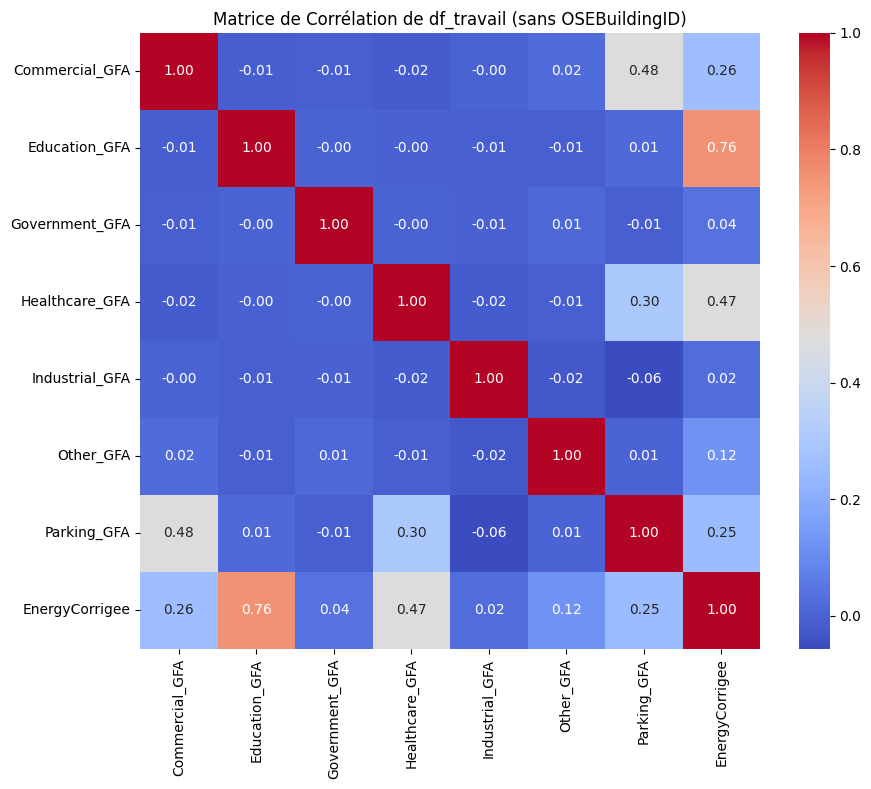

In [264]:

# Suppression de la colonne 'OSEBuildingID' pour la matrice de corrélation
df_corr = df_travail.drop(columns=['OSEBuildingID'])

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Tracé de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matrice de Corrélation de df_travail (sans OSEBuildingID)')
plt.show()


# Premier Modele

In [265]:
df_travail.columns


Index(['OSEBuildingID', 'Commercial_GFA', 'Education_GFA', 'Government_GFA',
       'Healthcare_GFA', 'Industrial_GFA', 'Other_GFA', 'Parking_GFA',
       'EnergyCorrigee'],
      dtype='object')

## Prétraitement des données & Division des données en ensembles d'entraînement et de test.

In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error

# Diviser les données en features et target
X = df_travail[['Commercial_GFA', 'Education_GFA', 'Government_GFA', 'Healthcare_GFA', 'Industrial_GFA', 'Other_GFA', 'Parking_GFA']]
y = df_travail['EnergyCorrigee']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Création de pipelines pour le prétraitement et la modélisation.

In [267]:
# Création des pipelines
linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())
bagging_pipeline = make_pipeline(StandardScaler(), BaggingRegressor(random_state=42))
boosting_pipeline = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))


## Utilisation de la validation croisée pour évaluer la performance des modèles.

In [268]:
# Définition de la métrique (RMSE pour racine carrée de l'erreur quadratique moyenne)
def rmse_cv(model, X, y):
    rmse = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    return -rmse.mean()

# Évaluation des modèles en utilisant la validation croisée
linear_rmse = rmse_cv(linear_pipeline, X_train, y_train)
bagging_rmse = rmse_cv(bagging_pipeline, X_train, y_train)
boosting_rmse = rmse_cv(boosting_pipeline, X_train, y_train)

print("RMSE (Linear Regression):", linear_rmse)
print("RMSE (Bagging):", bagging_rmse)
print("RMSE (Gradient Boosting):", boosting_rmse)


RMSE (Linear Regression): 7187690.405325195
RMSE (Bagging): 12705027.856204705
RMSE (Gradient Boosting): 12207995.229294471


    Régression Linéaire :
        RMSE (Root Mean Squared Error) : 7187690.405325195
        Plus le RMSE est bas, meilleure est la performance du modèle. Dans ce cas, un RMSE de 7187690.41 indique une erreur moyenne d'environ 7,187,690.41 unités sur l'échelle de votre variable cible. Cela peut être interprété comme une performance moyenne à faible du modèle de régression linéaire.

    Bagging :
        RMSE (Root Mean Squared Error) : 12705027.856204705
        Comparé à la régression linéaire, le modèle de Bagging semble moins performant avec un RMSE plus élevé. Un RMSE de 12705027.86 indique une erreur moyenne d'environ 12,705,027.86 unités. Cela suggère que le modèle Bagging a une performance moins bonne que la régression linéaire dans ce contexte.

    Gradient Boosting :
        RMSE (Root Mean Squared Error) : 12207995.229294471
        Le modèle Gradient Boosting semble également moins performant que la régression linéaire avec un RMSE légèrement inférieur à celui du Bagging mais toujours élevé. Un RMSE de 12207995.23 indique une erreur moyenne d'environ 12,207,995.23 unités. Cela suggère que le modèle Gradient Boosting est également moins performant que la régression linéaire dans ce contexte, mais potentiellement légèrement meilleur que le Bagging.

In [269]:
# Entraînement du meilleur modèle sur l'ensemble d'entraînement complet
best_model = linear_pipeline  
best_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de la métrique sur l'ensemble de test (RMSE)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE (Test set):", test_rmse)


RMSE (Test set): 7531393.760763759


/home/alexandre/anaconda3/envs/stabadenvP4/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Reprise base

In [270]:
df2 = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

## Traitement DefaultData, ComplianceStatus, Outlier

In [271]:
df2['DefaultData'].value_counts()

DefaultData
False    3263
True      113
Name: count, dtype: int64

In [272]:
df2 = df2[df2['DefaultData']==False]

In [273]:
df2['DefaultData'].value_counts()

DefaultData
False    3263
Name: count, dtype: int64

In [274]:
df2['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant        3211
Non-Compliant      37
Missing Data       15
Name: count, dtype: int64

In [275]:
df2 = df2[df2['ComplianceStatus']=='Compliant']

In [276]:
df2['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant    3211
Name: count, dtype: int64

In [277]:
df2['Outlier'].value_counts()

Series([], Name: count, dtype: int64)

Après suppression des données remplies par defaut data et Compliance status fausse, il n'y a plus de valeurs outlier low ou high


## Selection Données Non Residential

In [278]:
df2.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [279]:
df2['BuildingType'].value_counts()

BuildingType
NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: count, dtype: int64

In [280]:
for element in df2[df2['BuildingType']=='Nonresidential COS']['ListOfAllPropertyUseTypes']:
    print(element)

Police Station
Data Center, Library, Parking
Other
Other
Other
Other
Other
Other
Other - Entertainment/Public Assembly
Office, Other
Repair Services (Vehicle, Shoe, Locksmith, etc)
Museum
Non-Refrigerated Warehouse, Office, Other - Services, Residence Hall/Dormitory
Data Center, Distribution Center, Office, Other, Parking
Data Center, Distribution Center, Office, Other
Non-Refrigerated Warehouse, Office, Other, Other - Services
Other - Entertainment/Public Assembly
Office, Parking
Data Center, Office, Other
Office, Other, Parking, Restaurant
Office, Other - Services
Data Center, Office, Other, Other - Entertainment/Public Assembly
Non-Refrigerated Warehouse, Office, Other
Office, Other
Office, Other
Fire Station
Other - Recreation
Fitness Center/Health Club/Gym, Office, Other - Recreation, Pre-school/Daycare
Residential Care Facility
Office, Other - Services
Data Center, Office, Other
Other
Other
Museum
Other
Other
Other
Library, Other - Services
Fitness Center/Health Club/Gym, Other -

In [281]:
for element in df2[df2['BuildingType']=='Campus']['ListOfAllPropertyUseTypes']:
    print(element)

Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office
College/University
College/University
Laboratory, Non-Refrigerated Warehouse, Office, Other - Utility
Other
Food Sales, Multifamily Housing, Office, Other - Education, Other - Restaurant/Bar, Pre-school/Daycare, Restaurant, Retail Store, Supermarket/Grocery Store
Data Center, Office, Parking, Restaurant, Retail Store
Other, Parking
Manufacturing/Industrial Plant
K-12 School
Food Sales, Office, Restaurant, Retail Store, Self-Storage Facility, Social/Meeting Hall
Bar/Nightclub, Food Sales, Multifamily Housing, Restaurant, Retail Store, Self-Storage Facility
Food Sales, Office, Restaurant
College/University, Parking
Adult Education
Other
Other
Other, Parking
K-12 School, Parking
College/University
K-12 School
K-12 School
College/University
College/University


In [282]:
for element in df2[df2['BuildingType']=='SPS-District K-12']['ListOfAllPropertyUseTypes']:
    print(element)



K-12 School
K-12 School
K-12 School, Parking
K-12 School
Data Center, Non-Refrigerated Warehouse, Other, Refrigerated Warehouse, Repair Services (Vehicle, Shoe, Locksmith, etc), Restaurant
Other
K-12 School
K-12 School
K-12 School
K-12 School


In [283]:
df2 = df2[df2['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Campus', 'SPS-District K-12', 'Nonresidential WA'])]

## Selection Features

In [284]:
df2.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [285]:
df2 = df2[['OSEBuildingID', 'BuildingType', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']].copy()

## Proratisation Types Energies

In [286]:
# Calculer la somme totale des trois types d'énergie par individu
df2['Total_Energy'] = df2['Electricity(kBtu)'] + df2['SteamUse(kBtu)'] + df2['NaturalGas(kBtu)']

# Calculer les pourcentages pour chaque type d'énergie par rapport à la somme totale
df2['Electricity(%)'] = (df2['Electricity(kBtu)'] / df2['Total_Energy']) * 100
df2['SteamUse(%)'] = (df2['SteamUse(kBtu)'] / df2['Total_Energy']) * 100
df2['NaturalGas(%)'] = (df2['NaturalGas(kBtu)'] / df2['Total_Energy']) * 100




In [287]:
# Supprimer les colonnes en kBtu
df2.drop(columns=['Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)'], inplace=True)


In [288]:
df2.drop(columns=['Total_Energy'], inplace=True)


In [289]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

                Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                   DOWNTOWN       1927                1.0              12   
1                   DOWNTOWN       1996                1.0              11   
2                   DOWNTOWN       1969                1.0              41   
3                   DOWNTOWN       1926                1.0              10   
4                   DOWNTOWN       1980                1.0              18   
...                      ...        ...                ...             ...   
3370  DELRIDGE NEIGHBORHOODS       1982                1.0               1   
3372                DOWNTOWN       2004                1.0               1   
3373   MAGNOLIA / QUEEN ANNE       1974                1.0               1   
3374        GREATER DUWAMISH       1989                1.0               1   
3375        GREATER DUWAMISH       1938                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  \
0                      0                   88434         7.226362e+06   
1                  15064                   88502         8.387933e+06   
2                 196718                  759392         7.258702e+07   
3                      0                   61320         6.794584e+06   
4                  62000                  113580         1.417261e+07   
...                  ...                     ...                  ...   
3370                   0                   18261         9.320821e+05   
3372                   0                   16000         9.502762e+05   
3373                   0                   13157         5.765898e+06   
3374                   0                   14101         7.194712e+05   
3375                   0                   18258         1.152896e+06   

      TotalGHGEmissions  Electricity(%)  SteamUse(%)  NaturalGas(%)  
0                249.98       54.605997    27.730164      17.663840  
1                295.86       38.660907     0.000000      61.339093  
2               2089.28       68.230746    29.711310       2.057944  
3                286.43       40.751933    32.591348      26.656720  
4                505.01       37.880171     0.000000      62.119829  
...                 ...             ...          ...            ...  
3370              20.33       67.844031     0.000000      32.155969  
3372              32.17       41.729565     0.000000      58.270435  
3373             223.54       31.082042     0.000000      68.917958  
3374              22.11       48.489806     0.000000      51.510194  
3375              41.27       37.518923     0.000000      62.481077  

[1548 rows x 14 columns]

## Transformation YearBuilt => Age en Décades

In [290]:
# Calculer l'âge du bâtiment en années
df2['Building_Age'] = 2024 - df2['YearBuilt']

# Calculer l'âge en nombre de décennies en arrondissant à l'entier le plus proche
df2['Building_Age_Decades'] = np.round(df2['Building_Age'] / 10)

# Renommer la colonne appropriée
df2.rename(columns={'Building_Age_Decades': 'Building_Age_Decades_Rounded'}, inplace=True)

# Supprimer les colonnes Building_Age et YearBuilt
df2.drop(columns=['Building_Age', 'YearBuilt'], inplace=True)

In [291]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

                Neighborhood  NumberofBuildings  NumberofFloors  \
0                   DOWNTOWN                1.0              12   
1                   DOWNTOWN                1.0              11   
2                   DOWNTOWN                1.0              41   
3                   DOWNTOWN                1.0              10   
4                   DOWNTOWN                1.0              18   
...                      ...                ...             ...   
3370  DELRIDGE NEIGHBORHOODS                1.0               1   
3372                DOWNTOWN                1.0               1   
3373   MAGNOLIA / QUEEN ANNE                1.0               1   
3374        GREATER DUWAMISH                1.0               1   
3375        GREATER DUWAMISH                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  \
0                      0                   88434         7.226362e+06   
1                  15064                   88502         8.387933e+06   
2                 196718                  759392         7.258702e+07   
3                      0                   61320         6.794584e+06   
4                  62000                  113580         1.417261e+07   
...                  ...                     ...                  ...   
3370                   0                   18261         9.320821e+05   
3372                   0                   16000         9.502762e+05   
3373                   0                   13157         5.765898e+06   
3374                   0                   14101         7.194712e+05   
3375                   0                   18258         1.152896e+06   

      TotalGHGEmissions  Electricity(%)  SteamUse(%)  NaturalGas(%)  \
0                249.98       54.605997    27.730164      17.663840   
1                295.86       38.660907     0.000000      61.339093   
2               2089.28       68.230746    29.711310       2.057944   
3                286.43       40.751933    32.591348      26.656720   
4                505.01       37.880171     0.000000      62.119829   
...                 ...             ...          ...            ...   
3370              20.33       67.844031     0.000000      32.155969   
3372              32.17       41.729565     0.000000      58.270435   
3373             223.54       31.082042     0.000000      68.917958   
3374              22.11       48.489806     0.000000      51.510194   
3375              41.27       37.518923     0.000000      62.481077   

      Building_Age_Decades_Rounded  
0                             10.0  
1                              3.0  
2                              6.0  
3                             10.0  
4                              4.0  
...                            ...  
3370                           4.0  
3372                           2.0  
3373                           5.0  
3374                           4.0  
3375                           9.0  

[1548 rows x 14 columns]

## Traitement CouncilDistrictCode

In [292]:
df2['CouncilDistrictCode'].value_counts()

CouncilDistrictCode
7    513
2    366
3    188
4    159
5    120
6    102
1    100
Name: count, dtype: int64

In [293]:
# Utilisation de get_dummies avec dummy_na=False pour obtenir des 0 et des 1
one_hot_encoded = pd.get_dummies(df2['CouncilDistrictCode'], prefix='CDC')

# Concaténation des colonnes one-hot encodées avec le DataFrame original
df2 = pd.concat([df2, one_hot_encoded], axis=1)

In [294]:
# Parcourir toutes les colonnes commençant par 'CDC'
for column in df2.filter(like='CDC').columns:
    df2[column] = df2[column].astype(int)  # Convertir les valeurs booléennes en entiers (0 et 1)


In [295]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

                Neighborhood  NumberofBuildings  NumberofFloors  \
0                   DOWNTOWN                1.0              12   
1                   DOWNTOWN                1.0              11   
2                   DOWNTOWN                1.0              41   
3                   DOWNTOWN                1.0              10   
4                   DOWNTOWN                1.0              18   
...                      ...                ...             ...   
3370  DELRIDGE NEIGHBORHOODS                1.0               1   
3372                DOWNTOWN                1.0               1   
3373   MAGNOLIA / QUEEN ANNE                1.0               1   
3374        GREATER DUWAMISH                1.0               1   
3375        GREATER DUWAMISH                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  \
0                      0                   88434         7.226362e+06   
1                  15064                   88502         8.387933e+06   
2                 196718                  759392         7.258702e+07   
3                      0                   61320         6.794584e+06   
4                  62000                  113580         1.417261e+07   
...                  ...                     ...                  ...   
3370                   0                   18261         9.320821e+05   
3372                   0                   16000         9.502762e+05   
3373                   0                   13157         5.765898e+06   
3374                   0                   14101         7.194712e+05   
3375                   0                   18258         1.152896e+06   

      TotalGHGEmissions  ...  SteamUse(%)  NaturalGas(%)  \
0                249.98  ...    27.730164      17.663840   
1                295.86  ...     0.000000      61.339093   
2               2089.28  ...    29.711310       2.057944   
3                286.43  ...    32.591348      26.656720   
4                505.01  ...     0.000000      62.119829   
...                 ...  ...          ...            ...   
3370              20.33  ...     0.000000      32.155969   
3372              32.17  ...     0.000000      58.270435   
3373             223.54  ...     0.000000      68.917958   
3374              22.11  ...     0.000000      51.510194   
3375              41.27  ...     0.000000      62.481077   

      Building_Age_Decades_Rounded  CDC_1  CDC_2  CDC_3  CDC_4  CDC_5  CDC_6  \
0                             10.0      0      0      0      0      0      0   
1                              3.0      0      0      0      0      0      0   
2                              6.0      0      0      0      0      0      0   
3                             10.0      0      0      0      0      0      0   
4                              4.0      0      0      0      0      0      0   
...                            ...    ...    ...    ...    ...    ...    ...   
3370                           4.0      1      0      0      0      0      0   
3372                           2.0      0      1      0      0      0      0   
3373                           5.0      0      0      0      0      0      0   
3374                           4.0

In [296]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

                Neighborhood  NumberofBuildings  NumberofFloors  \
0                   DOWNTOWN                1.0              12   
1                   DOWNTOWN                1.0              11   
2                   DOWNTOWN                1.0              41   
3                   DOWNTOWN                1.0              10   
4                   DOWNTOWN                1.0              18   
...                      ...                ...             ...   
3370  DELRIDGE NEIGHBORHOODS                1.0               1   
3372                DOWNTOWN                1.0               1   
3373   MAGNOLIA / QUEEN ANNE                1.0               1   
3374        GREATER DUWAMISH                1.0               1   
3375        GREATER DUWAMISH                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  \
0                      0                   88434         7.226362e+06   
1                  15064                   88502         8.387933e+06   
2                 196718                  759392         7.258702e+07   
3                      0                   61320         6.794584e+06   
4                  62000                  113580         1.417261e+07   
...                  ...                     ...                  ...   
3370                   0                   18261         9.320821e+05   
3372                   0                   16000         9.502762e+05   
3373                   0                   13157         5.765898e+06   
3374                   0                   14101         7.194712e+05   
3375                   0                   18258         1.152896e+06   

      TotalGHGEmissions  ...  SteamUse(%)  NaturalGas(%)  \
0                249.98  ...    27.730164      17.663840   
1                295.86  ...     0.000000      61.339093   
2               2089.28  ...    29.711310       2.057944   
3                286.43  ...    32.591348      26.656720   
4                505.01  ...     0.000000      62.119829   
...                 ...  ...          ...            ...   
3370              20.33  ...     0.000000      32.155969   
3372              32.17  ...     0.000000      58.270435   
3373             223.54  ...     0.000000      68.917958   
3374              22.11  ...     0.000000      51.510194   
3375              41.27  ...     0.000000      62.481077   

      Building_Age_Decades_Rounded  CDC_1  CDC_2  CDC_3  CDC_4  CDC_5  CDC_6  \
0                             10.0      0      0      0      0      0      0   
1                              3.0      0      0      0      0      0      0   
2                              6.0      0      0      0      0      0      0   
3                             10.0      0      0      0      0      0      0   
4                              4.0      0      0      0      0      0      0   
...                            ...    ...    ...    ...    ...    ...    ...   
3370                           4.0      1      0      0      0      0      0   
3372                           2.0      0      1      0      0      0      0   
3373                           5.0      0      0      0      0      0      0   
3374                           4.0

## Traitement Neighborhood

In [297]:
df2['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  351
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     144
LAKE UNION                143
NORTHEAST                 117
EAST                      116
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    42
DELRIDGE                   36
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Delridge                    4
Northwest                   4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [298]:
df2['Neighborhood'] = df2['Neighborhood'].replace({
    'North': 'NORTH',
    'Ballard': 'BALLARD',
    'Northwest': 'NORTHWEST',
    'Central': 'CENTRAL',
    'Delridge': 'DELRIDGE',
    'DELRIDGE NEIGHBORHOODS': 'DELRIDGE'
})

In [299]:
df2['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                 351
GREATER DUWAMISH         328
MAGNOLIA / QUEEN ANNE    144
LAKE UNION               143
NORTHEAST                117
EAST                     116
NORTHWEST                 78
BALLARD                   63
NORTH                     59
CENTRAL                   46
DELRIDGE                  41
SOUTHWEST                 31
SOUTHEAST                 31
Name: count, dtype: int64

In [300]:
df2['Neighborhood'].value_counts().index

Index(['DOWNTOWN', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION',
       'NORTHEAST', 'EAST', 'NORTHWEST', 'BALLARD', 'NORTH', 'CENTRAL',
       'DELRIDGE', 'SOUTHWEST', 'SOUTHEAST'],
      dtype='object', name='Neighborhood')

In [301]:

# Utilisation de get_dummies pour faire one-hot encoding
one_hot_encoded = pd.get_dummies(df2['Neighborhood'], prefix='Nh')

# Concaténation des colonnes one-hot encodées avec le DataFrame original
df2 = pd.concat([df2, one_hot_encoded], axis=1)

In [302]:
df2.columns

Index(['OSEBuildingID', 'BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'Electricity(%)', 'SteamUse(%)', 'NaturalGas(%)',
       'Building_Age_Decades_Rounded', 'CDC_1', 'CDC_2', 'CDC_3', 'CDC_4',
       'CDC_5', 'CDC_6', 'CDC_7', 'Nh_BALLARD', 'Nh_CENTRAL', 'Nh_DELRIDGE',
       'Nh_DOWNTOWN', 'Nh_EAST', 'Nh_GREATER DUWAMISH', 'Nh_LAKE UNION',
       'Nh_MAGNOLIA / QUEEN ANNE', 'Nh_NORTH', 'Nh_NORTHEAST', 'Nh_NORTHWEST',
       'Nh_SOUTHEAST', 'Nh_SOUTHWEST'],
      dtype='object')

In [303]:
# Colonnes à traiter
columns_to_process = ['Nh_BALLARD', 'Nh_CENTRAL', 'Nh_DELRIDGE',
                      'Nh_DOWNTOWN', 'Nh_EAST', 'Nh_GREATER DUWAMISH',
                      'Nh_LAKE UNION', 'Nh_MAGNOLIA / QUEEN ANNE',
                      'Nh_NORTH', 'Nh_NORTHEAST', 'Nh_NORTHWEST',
                      'Nh_SOUTHEAST', 'Nh_SOUTHWEST']

# Remplacement des valeurs
df2[columns_to_process] = df2[columns_to_process].replace({False: 0, True: 1}).infer_objects(copy=False)


/tmp/ipykernel_18765/3135485284.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[columns_to_process] = df2[columns_to_process].replace({False: 0, True: 1}).infer_objects(copy=False)


In [304]:
# Suppression de la colonne originale 'Neighborhood' si nécessaire
df2.drop('Neighborhood', axis=1, inplace=True)

In [305]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
3370                1.0               1                   0   
3372                1.0               1                   0   
3373                1.0               1                   0   
3374                1.0               1                   0   
3375                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0                      88434         7.226362e+06             249.98   
1                      88502         8.387933e+06             295.86   
2                     759392         7.258702e+07            2089.28   
3                      61320         6.794584e+06             286.43   
4                     113580         1.417261e+07             505.01   
...                      ...                  ...                ...   
3370                   18261         9.320821e+05              20.33   
3372                   16000         9.502762e+05              32.17   
3373                   13157         5.765898e+06             223.54   
3374                   14101         7.194712e+05              22.11   
3375                   18258         1.152896e+06              41.27   

      Electricity(%)  ...  Nh_DOWNTOWN  Nh_EAST  Nh_GREATER DUWAMISH  \
0          54.605997  ...            1        0                    0   
1          38.660907  ...            1        0                    0   
2          68.230746  ...            1        0                    0   
3          40.751933  ...            1        0                    0   
4          37.880171  ...            1        0                    0   
...              ...  ...          ...      ...                  ...   
3370       67.844031  ...            0        0                    0   
3372       41.729565  ...            1        0                    0   
3373       31.082042  ...            0        0                    0   
3374       48.489806  ...            0        0                    1   
3375       37.518923  ...            0        0                    1   

      Nh_LAKE UNION  Nh_MAGNOLIA / QUEEN ANNE  Nh_NORTH  Nh_NORTHEAST  \
0                 0                         0         0             0   
1                 0                         0         0             0   
2                 0                         0         0             0   
3                 0                         0         0             0   
4                 0                         0         0             0   
...             ...                       ...       ...           ...   
3370              0                         0         0             0   
3372              0                         0         0             0   
3373              0                         1         0             0   
3374              0 

## Traitement NumberofFloors

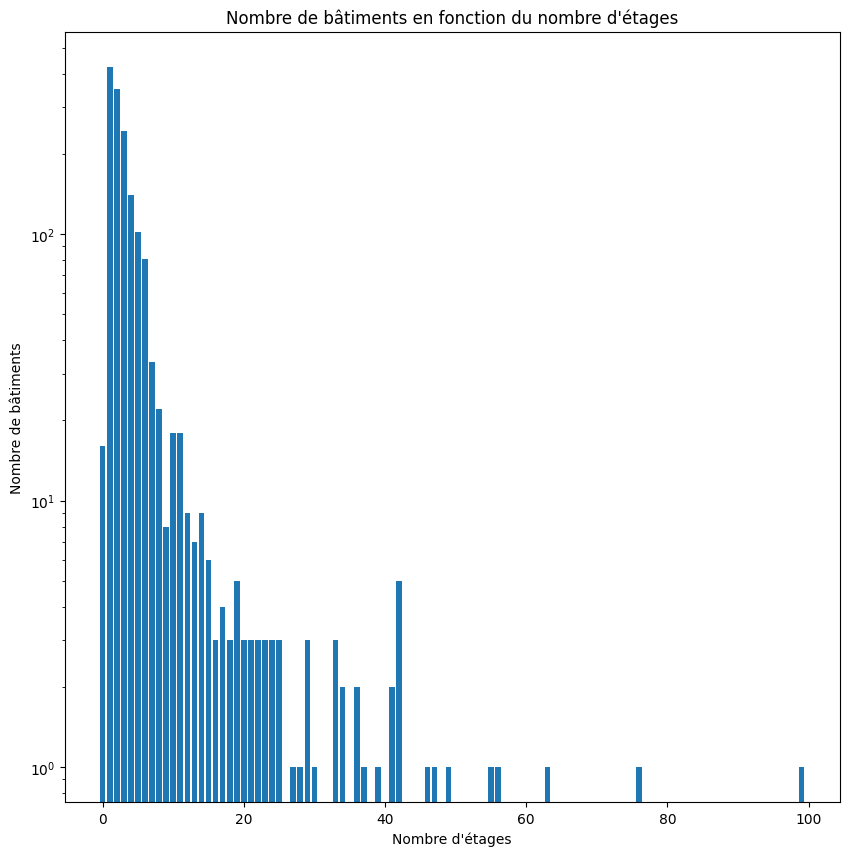

In [306]:
counts = df2['NumberofFloors'].value_counts()

# Définir la taille de la figure
plt.figure(figsize=(10, 10))  # largeur x hauteur

# Créer un histogramme
plt.bar(counts.index, counts.values)

# Définir les labels des axes
plt.xlabel('Nombre d\'étages')
plt.ylabel('Nombre de bâtiments')

# Utiliser une échelle logarithmique sur l'axe y
plt.yscale('log')

# Ajouter un titre
plt.title('Nombre de bâtiments en fonction du nombre d\'étages')

# Afficher le graphique
plt.show()

In [307]:
df2[df2['NumberofFloors']==0]

OSEBuildingID        BuildingType  CouncilDistrictCode  \
166             267      NonResidential                    7   
487             656      NonResidential                    3   
488             657      NonResidential                    7   
564             758      NonResidential                    7   
1754          23311      NonResidential                    3   
1993          24086              Campus                    2   
3130          40028      NonResidential                    4   
3131          40031      NonResidential                    4   
3132          40034      NonResidential                    4   
3168          49705  Nonresidential COS                    4   
3273          49966      NonResidential                    2   
3274          49967              Campus                    4   
3276          49970      NonResidential                    4   
3278          49979      NonResidential                    4   
3279          49980      NonResidential                    4   
3280          49983      NonResidential                    4   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
166                 1.0               0                   0   
487                 1.0               0                   0   
488                 0.0               0                   0   
564                 1.0               0                   0   
1754                1.0               0                   0   
1993               10.0               0                   0   
3130                1.0               0                   0   
3131                1.0               0                   0   
3132                1.0               0                   0   
3168                8.0               0                   0   
3273                1.0               0                   0   
3274              111.0               0                   0   
3276                1.0               0                   0   
3278                1.0               0                   0   
3279                1.0               0                   0   
3280                1.0               0                   0   

      PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
166                   934292         6.504728e+07            1638.46   
487                   225982         2.056062e+07             692.12   
488                   516407         3.940332e+07             734.72   
564                   947987         4.651096e+07             324.25   
1754                  274568         2.531153e+07            1110.07   
1993                  230971         2.102229e+07             405.05   
3130                  384772         1.520676e+07             391.70   
3131                   30287         2.193115e+06              32.72   
3132                   21931         3.947209e+06             145.11   
3168                  502030         1.847034e+07             549.11   
3273                   40265         2.159170e+06              51.39   
3274                 9320156         8.739237e+08           11140.56   
3276                  176225         4.926695e+06             103.65   
3278                  166991         1.596586e+07             437.20   
3279                   89392         6.960904e+06              48.53   
3280                   97040         3.894142e+06              62.41   

      Electricity(%)  ...  Nh_DOWNTOWN  Nh_EAST  Nh_GREATER DUWAMISH  \
166        60.516161  ...            1        0                    0   
487        61.987221  ...            0        1                    0   
488        74.696261  ...            1        0                    0   
564       100.000000  ...            1        0                    0   
1754       47.469583  ...            0        1                    0   
1993       73.349638  ...            0        0                    1   
3130       59.282004  ...            0        0                    0   
3131       82.777465  ...            0      

In [308]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsInte

In [309]:
df2['NumberofFloors'].value_counts()

NumberofFloors
1     423
2     350
3     243
4     140
5     102
6      81
7      33
8      22
10     18
11     18
0      16
14      9
12      9
9       8
13      7
15      6
42      5
19      5
17      4
16      3
21      3
22      3
23      3
29      3
18      3
20      3
24      3
25      3
33      3
36      2
34      2
41      2
46      1
99      1
27      1
76      1
56      1
30      1
28      1
55      1
63      1
37      1
49      1
47      1
39      1
Name: count, dtype: int64

## Traitement GFAs

In [310]:
# Ajouter la colonne PropertyGFATotalSum
df2['PropertyGFATotalSum'] = df2['PropertyGFAParking'] + df2['PropertyGFABuilding(s)']

# Ajouter la colonne PropertyGFAParking(%)
df2['PropertyGFAParking(%)'] = (df2['PropertyGFAParking'] / df2['PropertyGFATotalSum']) * 100

# Ajouter la colonne PropertyGFABuilding(s)(%)
df2['PropertyGFABuilding(s)(%)'] = (df2['PropertyGFABuilding(s)'] / df2['PropertyGFATotalSum']) * 100


In [311]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
3370                1.0               1                   0   
3372                1.0               1                   0   
3373                1.0               1                   0   
3374                1.0               1                   0   
3375                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0                      88434         7.226362e+06             249.98   
1                      88502         8.387933e+06             295.86   
2                     759392         7.258702e+07            2089.28   
3                      61320         6.794584e+06             286.43   
4                     113580         1.417261e+07             505.01   
...                      ...                  ...                ...   
3370                   18261         9.320821e+05              20.33   
3372                   16000         9.502762e+05              32.17   
3373                   13157         5.765898e+06             223.54   
3374                   14101         7.194712e+05              22.11   
3375                   18258         1.152896e+06              41.27   

      Electricity(%)  ...  Nh_LAKE UNION  Nh_MAGNOLIA / QUEEN ANNE  Nh_NORTH  \
0          54.605997  ...              0                         0         0   
1          38.660907  ...              0                         0         0   
2          68.230746  ...              0                         0         0   
3          40.751933  ...              0                         0         0   
4          37.880171  ...              0                         0         0   
...              ...  ...            ...                       ...       ...   
3370       67.844031  ...              0                         0         0   
3372       41.729565  ...              0                         0         0   
3373       31.082042  ...              0                         1         0   
3374       48.489806  ...              0                         0         0   
3375       37.518923  ...              0                         0         0   

      Nh_NORTHEAST  Nh_NORTHWEST  Nh_SOUTHEAST  Nh_SOUTHWEST  \
0                0             0             0             0   
1                0             0             0             0   
2                0             0             0             0   
3                0             0             0             0   
4                0             0             0             0   
...            ...           ...           ...           ...   
3370             0             0             0             0   
3372             0             0             0             0   
3373             0             0             0             0   
3374          

In [312]:
df2.columns

Index(['OSEBuildingID', 'BuildingType', 'CouncilDistrictCode',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'Electricity(%)', 'SteamUse(%)', 'NaturalGas(%)',
       'Building_Age_Decades_Rounded', 'CDC_1', 'CDC_2', 'CDC_3', 'CDC_4',
       'CDC_5', 'CDC_6', 'CDC_7', 'Nh_BALLARD', 'Nh_CENTRAL', 'Nh_DELRIDGE',
       'Nh_DOWNTOWN', 'Nh_EAST', 'Nh_GREATER DUWAMISH', 'Nh_LAKE UNION',
       'Nh_MAGNOLIA / QUEEN ANNE', 'Nh_NORTH', 'Nh_NORTHEAST', 'Nh_NORTHWEST',
       'Nh_SOUTHEAST', 'Nh_SOUTHWEST', 'PropertyGFATotalSum',
       'PropertyGFAParking(%)', 'PropertyGFABuilding(s)(%)'],
      dtype='object')

## Traitement NumberofBuildings

In [313]:
df2['NumberofBuildings'].value_counts()

NumberofBuildings
1.0      1444
0.0        52
2.0        14
3.0        12
5.0         7
4.0         4
6.0         4
14.0        2
8.0         2
27.0        1
11.0        1
9.0         1
7.0         1
23.0        1
10.0        1
111.0       1
Name: count, dtype: int64

In [314]:
df2[df2['NumberofBuildings']==0]

OSEBuildingID        BuildingType  CouncilDistrictCode  \
63               89      NonResidential                    3   
76              113      NonResidential                    7   
160             257      NonResidential                    1   
201             322      NonResidential                    7   
241             366      NonResidential                    4   
264             391      NonResidential                    2   
278             408      NonResidential                    7   
280             410      NonResidential                    7   
291             421      NonResidential                    7   
358             504  Nonresidential COS                    1   
365             517      NonResidential                    5   
417             576      NonResidential                    5   
429             588      NonResidential                    4   
433             594      NonResidential                    2   
477             640      NonResidential                    2   
481             649      NonResidential                    3   
488             657      NonResidential                    7   
494             673      NonResidential                    1   
544             735      NonResidential                    7   
608             812      NonResidential                    2   
809           19900      NonResidential                    7   
952           20323      NonResidential                    3   
985           20427      NonResidential                    1   
1002          20474      NonResidential                    5   
1025          20532  Nonresidential COS                    3   
1177          21180      NonResidential                    6   
1244          21336      NonResidential                    3   
1256          21365      NonResidential                    3   
1317          21508      NonResidential                    7   
1606          22801  Nonresidential COS                    5   
2054          24270      NonResidential                    6   
2115          24514      NonResidential                    5   
2166          24646  Nonresidential COS                    1   
2188          24716      NonResidential                    2   
2214          24822      NonResidential                    2   
2382          25461      NonResidential                    7   
2407          25546      NonResidential                    7   
2441          25661      NonResidential                    7   
2482          25772      NonResidential                    1   
2564          26119      NonResidential                    3   
2631          26331      NonResidential                    4   
2708          26706      NonResidential                    7   
2715          26719      NonResidential                    7   
2747          26833      NonResidential                    2   
2782          26924  Nonresidential COS                    2   
2963          27673      NonResidential                    7   
3108          33289      NonResidential                    7   
3121          36034      NonResidential                    3   
3155          45287  Nonresidential COS                    3   
3205          49783      NonResidential                    7   
3232          49862  Nonresidential COS                    7   
3259          49924      NonResidential                    3   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
63                  0.0               3                   0   
76                  0.0               2                2352   
160                 0.0               4                   0   
201                 0.0               3               26731   
241                 0.0               5                   0   
264                 0.0               1                   0   
278                 0.0              10                   0   
280                 0.0              19               59280   
291                 0.0               4       

In [315]:
df2[df2['NumberofBuildings']==1]['NumberofFloors'].value_counts()

NumberofFloors
1     399
2     316
3     227
4     132
5      96
6      79
7      33
8      20
11     18
10     14
0      12
12      9
9       8
14      8
13      7
15      5
42      5
17      4
19      4
33      3
25      3
20      3
18      3
16      3
23      3
21      3
29      3
22      3
41      2
36      2
34      2
24      2
76      1
28      1
27      1
99      1
30      1
56      1
47      1
46      1
55      1
63      1
37      1
49      1
39      1
Name: count, dtype: int64

In [316]:
df2.columns

Index(['OSEBuildingID', 'BuildingType', 'CouncilDistrictCode',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'Electricity(%)', 'SteamUse(%)', 'NaturalGas(%)',
       'Building_Age_Decades_Rounded', 'CDC_1', 'CDC_2', 'CDC_3', 'CDC_4',
       'CDC_5', 'CDC_6', 'CDC_7', 'Nh_BALLARD', 'Nh_CENTRAL', 'Nh_DELRIDGE',
       'Nh_DOWNTOWN', 'Nh_EAST', 'Nh_GREATER DUWAMISH', 'Nh_LAKE UNION',
       'Nh_MAGNOLIA / QUEEN ANNE', 'Nh_NORTH', 'Nh_NORTHEAST', 'Nh_NORTHWEST',
       'Nh_SOUTHEAST', 'Nh_SOUTHWEST', 'PropertyGFATotalSum',
       'PropertyGFAParking(%)', 'PropertyGFABuilding(s)(%)'],
      dtype='object')

In [317]:
df2[df2.isna().any(axis=1)]

OSEBuildingID    BuildingType  CouncilDistrictCode  NumberofBuildings  \
513            700  NonResidential                    7                1.0   

     NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
513               1                   0                   57176   

     SiteEnergyUse(kBtu)  TotalGHGEmissions  Electricity(%)  ...  \
513           12525174.0                0.0             NaN  ...   

     Nh_LAKE UNION  Nh_MAGNOLIA / QUEEN ANNE  Nh_NORTH  Nh_NORTHEAST  \
513              0                         1         0             0   

     Nh_NORTHWEST  Nh_SOUTHEAST  Nh_SOUTHWEST  PropertyGFATotalSum  \
513             0             0             0                57176   

     PropertyGFAParking(%)  PropertyGFABuilding(s)(%)  
513                    0.0                      100.0  

[1 rows x 36 columns]

In [318]:
# Supprimer l'individu avec 'OSEBuildingID' égale à 700
df2 = df2[df2['OSEBuildingID'] != 700]

In [319]:
# Exporter le DataFrame df2 en tant que fichier CSV nommé data_P4.csv
df2.to_csv('data_P4.csv', index=False)

# Affichage d'un message pour confirmer l'exportation
print("Le fichier data_P4.csv a été créé avec succès.")

Le fichier data_P4.csv a été créé avec succès.


In [320]:
df['SiteEnergyUse(kBtu)'].describe()

count    3.371000e+03
mean     5.403667e+06
std      2.161063e+07
min      0.000000e+00
25%      9.251286e+05
50%      1.803753e+06
75%      4.222455e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

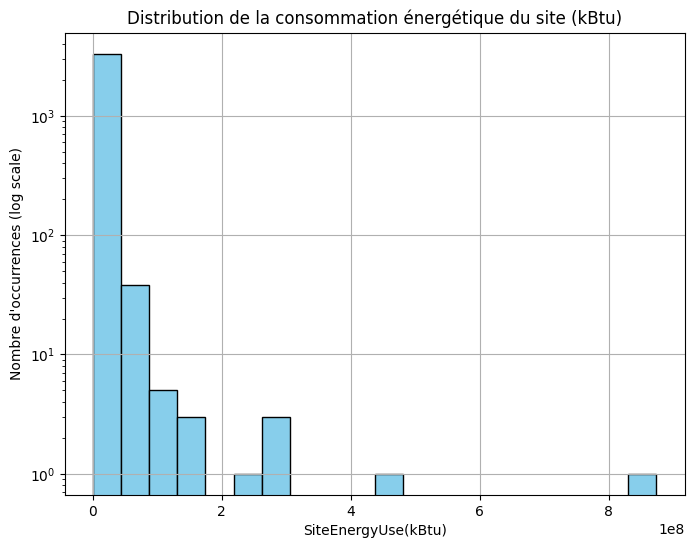

In [321]:

# Tracer l'histogramme avec une échelle logarithmique sur l'axe y
plt.figure(figsize=(8, 6))  # Définir la taille de la figure
plt.hist(df['SiteEnergyUse(kBtu)'], bins=20, color='skyblue', edgecolor='black')  # Tracer l'histogramme
plt.yscale('log')  # Échelle logarithmique sur l'axe y
plt.title('Distribution de la consommation énergétique du site (kBtu)')  # Titre du graphique
plt.xlabel('SiteEnergyUse(kBtu)')  # Étiquette de l'axe des x
plt.ylabel('Nombre d\'occurrences (log scale)')  # Étiquette de l'axe des y en échelle logarithmique
plt.grid(True)  # Activer la grille
plt.show()  # Afficher le graphique


In [322]:
df2

OSEBuildingID        BuildingType  CouncilDistrictCode  \
0                 1      NonResidential                    7   
1                 2      NonResidential                    7   
2                 3      NonResidential                    7   
3                 5      NonResidential                    7   
4                 8      NonResidential                    7   
...             ...                 ...                  ...   
3370          50221  Nonresidential COS                    1   
3372          50223  Nonresidential COS                    2   
3373          50224  Nonresidential COS                    7   
3374          50225  Nonresidential COS                    1   
3375          50226  Nonresidential COS                    2   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
3370                1.0               1                   0   
3372                1.0               1                   0   
3373                1.0               1                   0   
3374                1.0               1                   0   
3375                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0                      88434         7.226362e+06             249.98   
1                      88502         8.387933e+06             295.86   
2                     759392         7.258702e+07            2089.28   
3                      61320         6.794584e+06             286.43   
4                     113580         1.417261e+07             505.01   
...                      ...                  ...                ...   
3370                   18261         9.320821e+05              20.33   
3372                   16000         9.502762e+05              32.17   
3373                   13157         5.765898e+06             223.54   
3374                   14101         7.194712e+05              22.11   
3375                   18258         1.152896e+06              41.27   

      Electricity(%)  ...  Nh_LAKE UNION  Nh_MAGNOLIA / QUEEN ANNE  Nh_NORTH  \
0          54.605997  ...              0                         0         0   
1          38.660907  ...              0                         0         0   
2          68.230746  ...              0                         0         0   
3          40.751933  ...              0                         0         0   
4          37.880171  ...              0                         0         0   
...              ...  ...            ...                       ...       ...   
3370       67.844031  ...              0                         0         0   
3372       41.729565  ...              0                         0         0   
3373       31.082042  ...              0                         1         0   
3374       48.489806  ...              0                         0         0   
3375       37.518923  ...              0                         0         0   

      Nh_NORTHEAST  Nh_NORTHWEST  Nh_SOUTHEAST  Nh_SOUTHWEST  \
0                0             0             0             0   
1                0             0             0             0   
2                0             0             0             0   
3                0             0             0             0   
4                0             0             0             0   
...            ...           ...           ...           ...   
3370             0             0             0             0   
3372             0             0             0             0   
3373             0             0             0             0   
3374          

In [323]:
df2['TotalGHGEmissions'].describe()

count     1547.000000
mean       193.734059
std        779.341647
min         -0.800000
25%         20.710000
50%         49.900000
75%        147.315000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

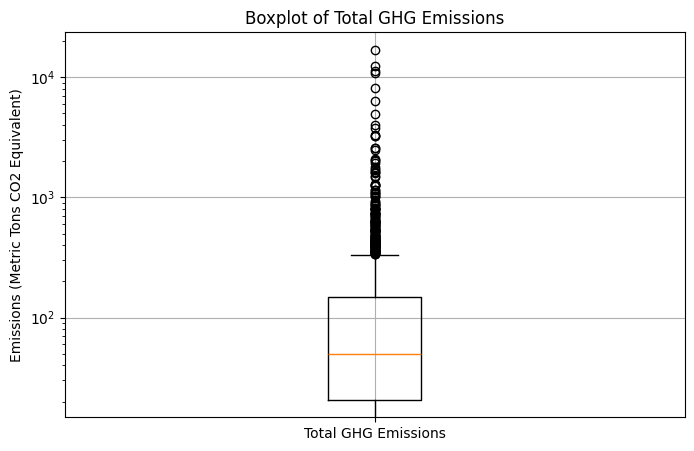

In [324]:

# Tracer le boxplot pour 'TotalGHGEmissions'
plt.figure(figsize=(8, 5))  # Définir la taille de la figure
plt.boxplot(df2['TotalGHGEmissions'])
plt.title('Boxplot of Total GHG Emissions')  # Titre du graphique
plt.ylabel('Emissions (Metric Tons CO2 Equivalent)')  # Étiquette de l'axe des y
plt.xticks([1], ['Total GHG Emissions'])  # Étiquette de l'axe des x
plt.yscale('log')  # Applique une échelle logarithmique à l'axe des y
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.show()  # Affiche le graphique


In [325]:
df[['ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]


ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions
0                60.0         7.226362e+06             249.98
1                61.0         8.387933e+06             295.86
2                43.0         7.258702e+07            2089.28
3                56.0         6.794584e+06             286.43
4                75.0         1.417261e+07             505.01
...               ...                  ...                ...
3371             46.0         8.497457e+05              20.94
3372              NaN         9.502762e+05              32.17
3373              NaN         5.765898e+06             223.54
3374              NaN         7.194712e+05              22.11
3375              NaN         1.152896e+06              41.27

[3376 rows x 3 columns]

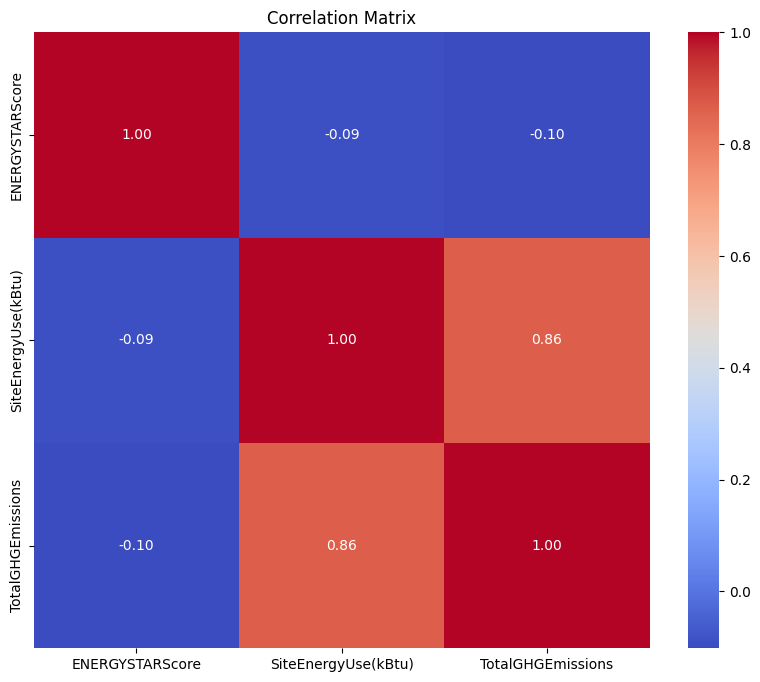

In [326]:

# Sélection des colonnes pour la matrice de corrélation
columns = ['ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
correlation_matrix = df[columns].corr()

# Création de la matrice de corrélation avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


In [327]:
df['ENERGYSTARScore']

0       60.0
1       61.0
2       43.0
3       56.0
4       75.0
        ... 
3371    46.0
3372     NaN
3373     NaN
3374     NaN
3375     NaN
Name: ENERGYSTARScore, Length: 3376, dtype: float64